IQR box plots and z-score outlier analysis
Analyzing outlier patterns for 8 numerical features
1. IQR box plots with outlier detection


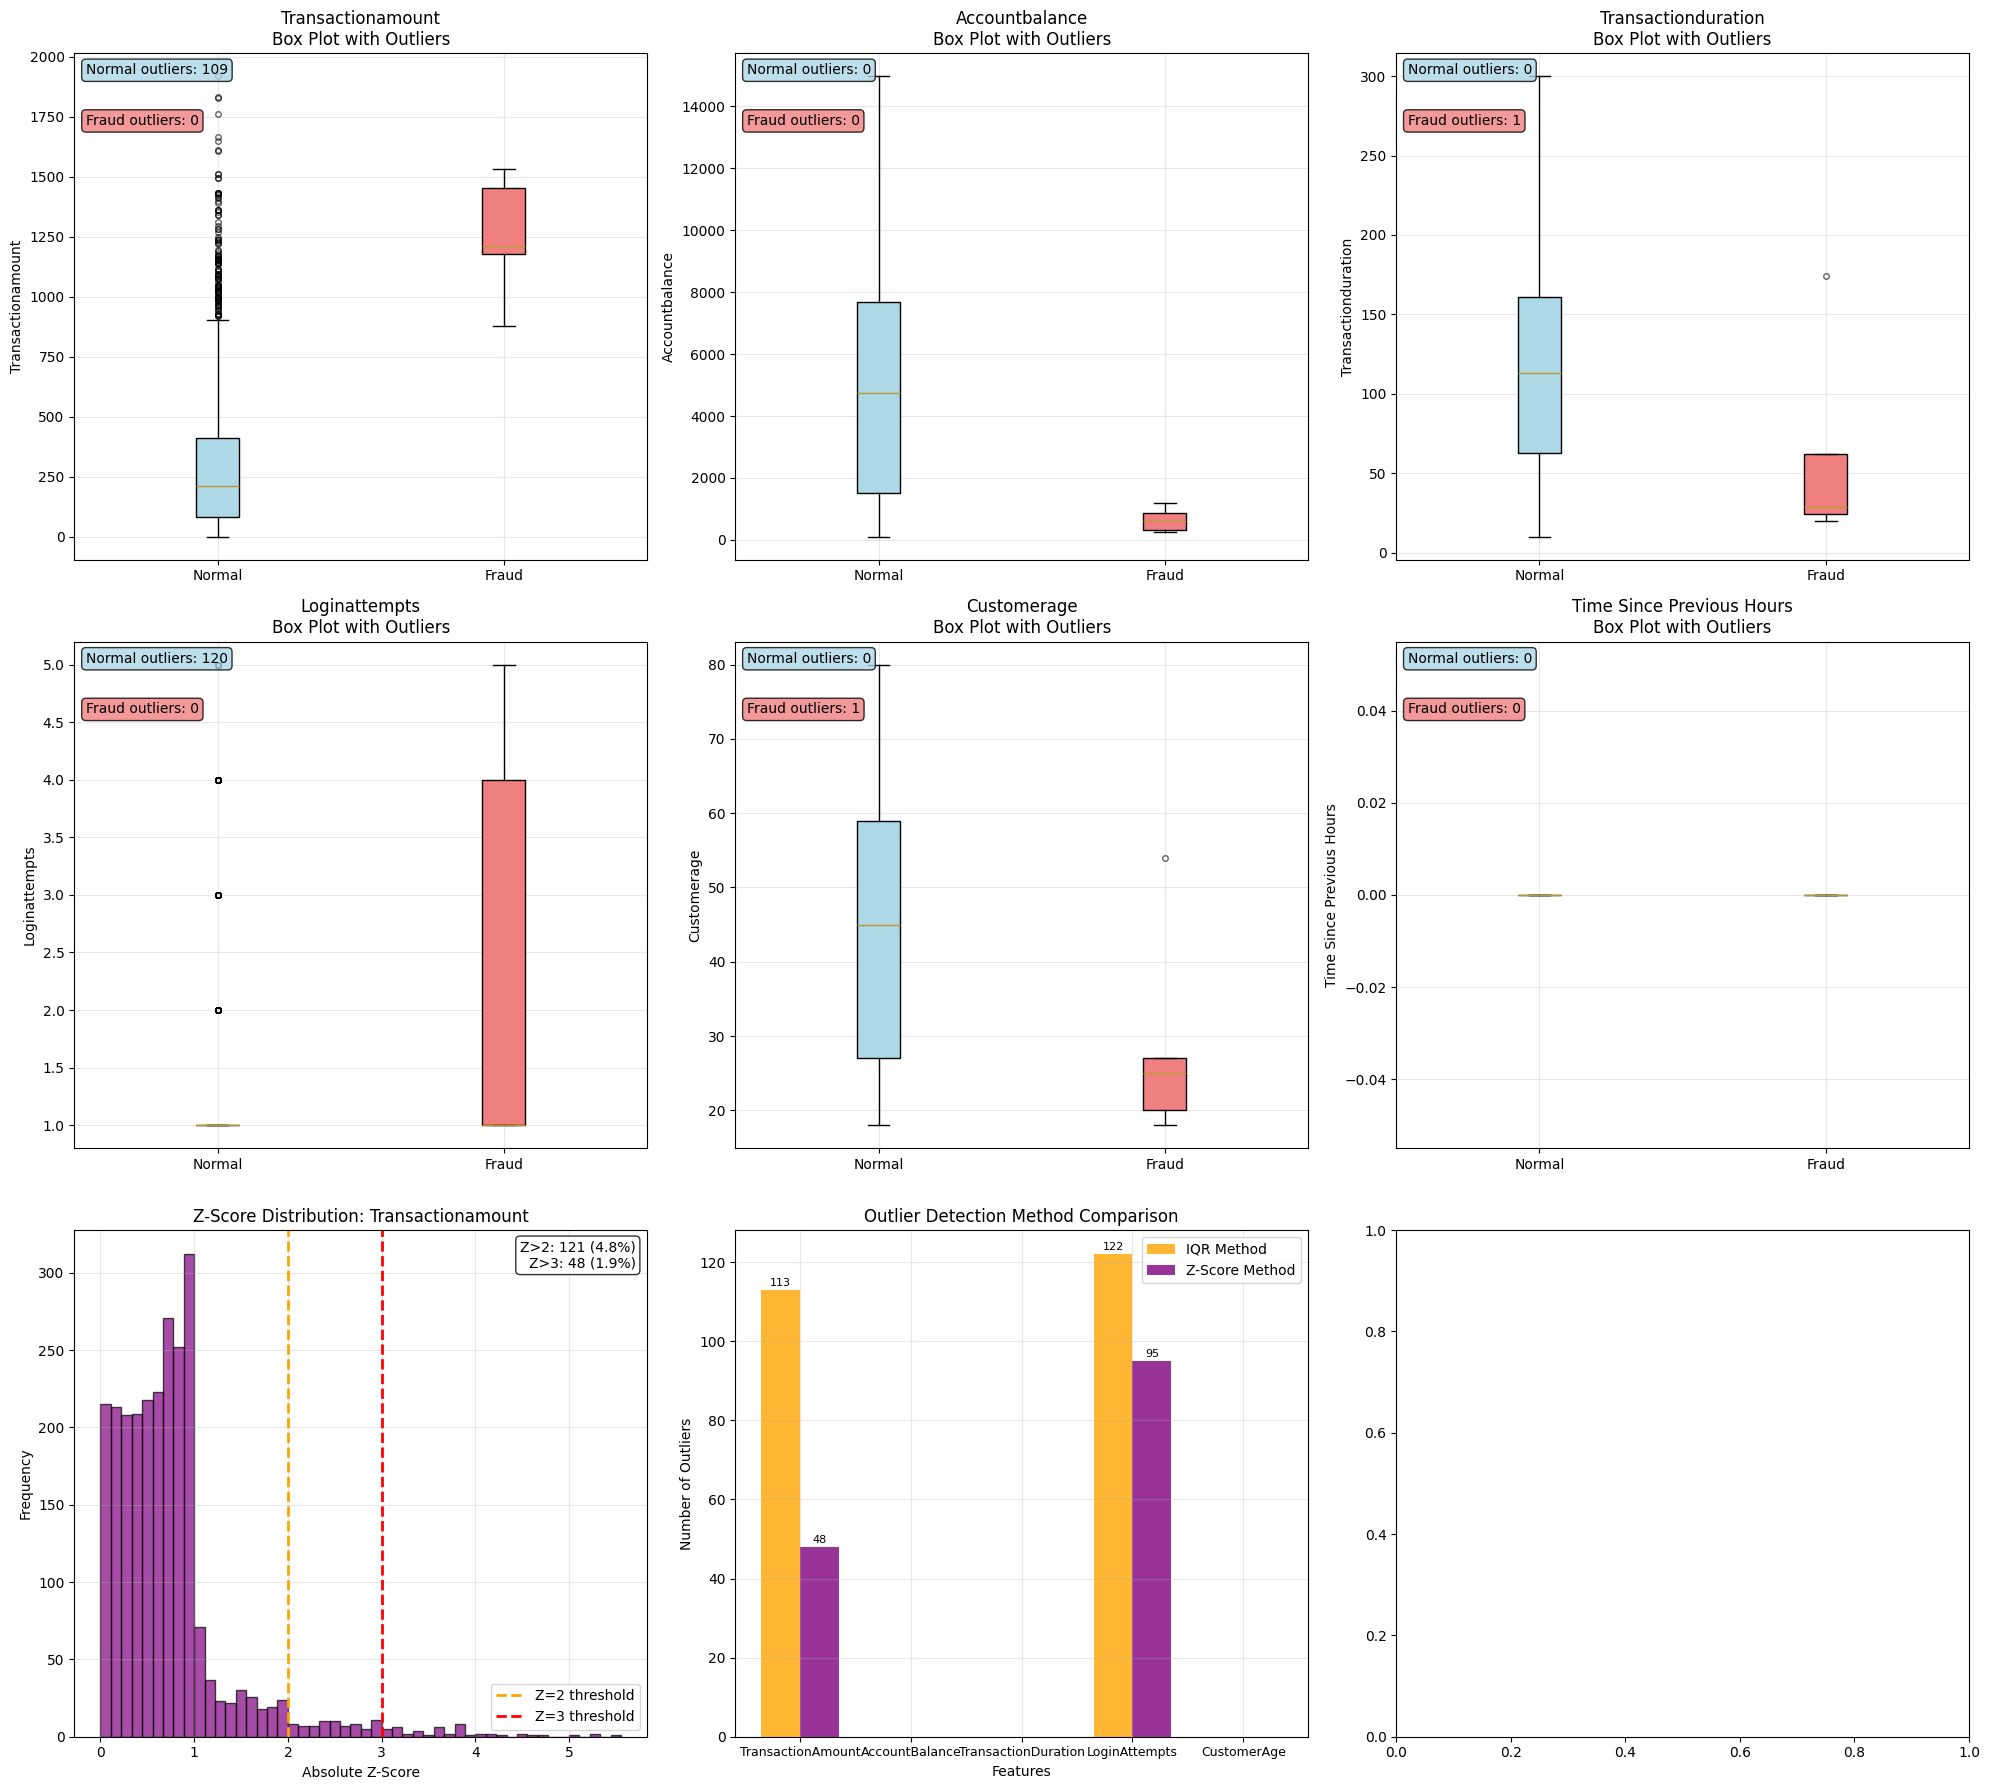


Detailed outlier analysis summary:
--------------------------------------
IQR vs Z-Score method comparison:
  TransactionAmount:
    IQR method: 113 outliers (4.50%)
    Z-Score method: 48 outliers (1.91%)
    Method agreement: 48/113 outliers (42.5%)
  AccountBalance:
    IQR method: 0 outliers (0.00%)
    Z-Score method: 0 outliers (0.00%)
  TransactionDuration:
    IQR method: 0 outliers (0.00%)
    Z-Score method: 0 outliers (0.00%)
  LoginAttempts:
    IQR method: 122 outliers (4.86%)
    Z-Score method: 95 outliers (3.78%)
    Method agreement: 95/122 outliers (77.9%)
  CustomerAge:
    IQR method: 0 outliers (0.00%)
    Z-Score method: 0 outliers (0.00%)

Outlier-fraud correlation insights:
  Overall fraud rate: 0.199%
  TransactionAmount outliers:
    Fraud rate: 3.540% (17.8x enrichment)

✓ IQR box plots and z-score outlier analysis completed


In [288]:
# Cell 18 - IQR box plots and z-score outlier analysis
print("IQR box plots and z-score outlier analysis")
print("=" * 42)

from scipy import stats
import matplotlib.patches as mpatches

# Get numerical features for outlier analysis
numerical_features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 
                     'LoginAttempts', 'CustomerAge', 'time_since_previous_hours', 
                     'amount_to_balance_ratio', 'risk_score']

available_numerical = [col for col in numerical_features if col in df.columns]

print(f"Analyzing outlier patterns for {len(available_numerical)} numerical features")

# Create comprehensive outlier visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Box plots with IQR outliers highlighted
print("1. IQR box plots with outlier detection")

for i, feature in enumerate(available_numerical[:6]):
    row = i // 3
    col = i % 3
    
    # Create box plot data for fraud vs normal
    fraud_data = df[df['is_fraud'] == 1][feature].dropna()
    normal_data = df[df['is_fraud'] == 0][feature].dropna()
    
    # Box plot
    box_data = [normal_data, fraud_data]
    box_labels = ['Normal', 'Fraud']
    
    bp = axes[row, col].boxplot(box_data, labels=box_labels, patch_artist=True, 
                               showfliers=True, flierprops=dict(marker='o', markersize=4, alpha=0.6))
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}\nBox Plot with Outliers')
    axes[row, col].set_ylabel(feature.replace('_', ' ').title())
    axes[row, col].grid(True, alpha=0.3)
    
    # Calculate and display IQR statistics
    if len(normal_data) > 0:
        Q1_normal = normal_data.quantile(0.25)
        Q3_normal = normal_data.quantile(0.75)
        IQR_normal = Q3_normal - Q1_normal
        normal_outliers = normal_data[(normal_data < Q1_normal - 1.5*IQR_normal) | 
                                     (normal_data > Q3_normal + 1.5*IQR_normal)]
        
        # Add text annotation
        axes[row, col].text(0.02, 0.98, f'Normal outliers: {len(normal_outliers)}', 
                           transform=axes[row, col].transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    if len(fraud_data) > 0:
        Q1_fraud = fraud_data.quantile(0.25)
        Q3_fraud = fraud_data.quantile(0.75)
        IQR_fraud = Q3_fraud - Q1_fraud
        fraud_outliers = fraud_data[(fraud_data < Q1_fraud - 1.5*IQR_fraud) | 
                                   (fraud_data > Q3_fraud + 1.5*IQR_fraud)]
        
        axes[row, col].text(0.02, 0.88, f'Fraud outliers: {len(fraud_outliers)}', 
                           transform=axes[row, col].transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# 2. Z-score distribution analysis
if len(available_numerical) > 6:
    row, col = 2, 0
    
    # Calculate z-scores for a representative feature
    main_feature = 'TransactionAmount' if 'TransactionAmount' in available_numerical else available_numerical[0]
    z_scores = np.abs(stats.zscore(df[main_feature]))
    
    # Create z-score histogram
    axes[row, col].hist(z_scores, bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[row, col].axvline(x=2, color='orange', linestyle='--', linewidth=2, label='Z=2 threshold')
    axes[row, col].axvline(x=3, color='red', linestyle='--', linewidth=2, label='Z=3 threshold')
    
    axes[row, col].set_xlabel('Absolute Z-Score')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Z-Score Distribution: {main_feature.replace("_", " ").title()}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    # Add statistics
    outliers_z2 = (z_scores > 2).sum()
    outliers_z3 = (z_scores > 3).sum()
    
    axes[row, col].text(0.98, 0.98, f'Z>2: {outliers_z2} ({outliers_z2/len(z_scores)*100:.1f}%)\nZ>3: {outliers_z3} ({outliers_z3/len(z_scores)*100:.1f}%)', 
                       transform=axes[row, col].transAxes, verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. Outlier method comparison
if len(available_numerical) > 7:
    row, col = 2, 1
    
    # Compare outlier detection methods for all features
    outlier_comparison = {}
    
    for feature in available_numerical[:5]:  # Top 5 features
        feature_data = df[feature].dropna()
        
        # IQR method
        Q1 = feature_data.quantile(0.25)
        Q3 = feature_data.quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = ((feature_data < Q1 - 1.5*IQR) | (feature_data > Q3 + 1.5*IQR)).sum()
        
        # Z-score method
        z_scores = np.abs(stats.zscore(feature_data))
        zscore_outliers = (z_scores > 3).sum()
        
        outlier_comparison[feature] = {
            'IQR': iqr_outliers,
            'Z-Score': zscore_outliers
        }
    
    # Create comparison bar chart
    features = list(outlier_comparison.keys())
    iqr_counts = [outlier_comparison[f]['IQR'] for f in features]
    zscore_counts = [outlier_comparison[f]['Z-Score'] for f in features]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = axes[row, col].bar(x_pos - width/2, iqr_counts, width, 
                              label='IQR Method', color='orange', alpha=0.8)
    bars2 = axes[row, col].bar(x_pos + width/2, zscore_counts, width, 
                              label='Z-Score Method', color='purple', alpha=0.8)
    
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Number of Outliers')
    axes[row, col].set_title('Outlier Detection Method Comparison')
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels([f.replace('_', '\n') for f in features], fontsize=9)
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                axes[row, col].text(bar.get_x() + bar.get_width()/2, height + 0.5, 
                                   f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 4. Outlier fraud correlation
if len(available_numerical) > 8:
    row, col = 2, 2
    
    # Analyze relationship between outlier detection and fraud
    outlier_fraud_analysis = pd.DataFrame()
    
    for feature in available_numerical[:4]:
        feature_data = df[[feature, 'is_fraud']].dropna()
        
        # Calculate IQR outliers
        Q1 = feature_data[feature].quantile(0.25)
        Q3 = feature_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outlier_mask = ((feature_data[feature] < Q1 - 1.5*IQR) | 
                           (feature_data[feature] > Q3 + 1.5*IQR))
        
        # Calculate fraud rates
        total_outliers = iqr_outlier_mask.sum()
        fraud_in_outliers = feature_data[iqr_outlier_mask]['is_fraud'].sum()
        fraud_rate_outliers = fraud_in_outliers / total_outliers if total_outliers > 0 else 0
        
        total_normal = (~iqr_outlier_mask).sum()
        fraud_in_normal = feature_data[~iqr_outlier_mask]['is_fraud'].sum()
        fraud_rate_normal = fraud_in_normal / total_normal if total_normal > 0 else 0
        
        outlier_fraud_analysis = pd.concat([outlier_fraud_analysis, pd.DataFrame({
            'Feature': [feature],
            'Outliers': [total_outliers],
            'Fraud_in_Outliers': [fraud_in_outliers],
            'Fraud_Rate_Outliers': [fraud_rate_outliers * 100],
            'Fraud_Rate_Normal': [fraud_rate_normal * 100]
        })], ignore_index=True)
    
    # Create stacked bar chart
    x_pos = np.arange(len(outlier_fraud_analysis))
    
    bars1 = axes[row, col].bar(x_pos, outlier_fraud_analysis['Fraud_Rate_Outliers'], 
                              label='Fraud Rate in Outliers', color='red', alpha=0.8)
    bars2 = axes[row, col].bar(x_pos, outlier_fraud_analysis['Fraud_Rate_Normal'], 
                              bottom=outlier_fraud_analysis['Fraud_Rate_Outliers'],
                              label='Fraud Rate in Normal', color='blue', alpha=0.8)
    
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Fraud Rate (%)')
    axes[row, col].set_title('Fraud Rate: Outliers vs Normal Values')
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels([f.replace('_', '\n') for f in outlier_fraud_analysis['Feature']], fontsize=9)
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed outlier analysis summary
print("\nDetailed outlier analysis summary:")
print("-" * 38)

print("IQR vs Z-Score method comparison:")
for feature in available_numerical[:5]:
    if feature in df.columns:
        feature_data = df[feature].dropna()
        
        # IQR method
        Q1 = feature_data.quantile(0.25)
        Q3 = feature_data.quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = ((feature_data < Q1 - 1.5*IQR) | (feature_data > Q3 + 1.5*IQR)).sum()
        iqr_percentage = (iqr_outliers / len(feature_data)) * 100
        
        # Z-score method
        z_scores = np.abs(stats.zscore(feature_data))
        zscore_outliers = (z_scores > 3).sum()
        zscore_percentage = (zscore_outliers / len(feature_data)) * 100
        
        print(f"  {feature}:")
        print(f"    IQR method: {iqr_outliers} outliers ({iqr_percentage:.2f}%)")
        print(f"    Z-Score method: {zscore_outliers} outliers ({zscore_percentage:.2f}%)")
        
        # Agreement between methods
        iqr_mask = (feature_data < Q1 - 1.5*IQR) | (feature_data > Q3 + 1.5*IQR)
        zscore_mask = z_scores > 3
        
        agreement = (iqr_mask & zscore_mask).sum()
        total_unique_outliers = (iqr_mask | zscore_mask).sum()
        
        if total_unique_outliers > 0:
            agreement_rate = (agreement / total_unique_outliers) * 100
            print(f"    Method agreement: {agreement}/{total_unique_outliers} outliers ({agreement_rate:.1f}%)")

# Outlier-fraud correlation insights
if 'is_fraud' in df.columns:
    print(f"\nOutlier-fraud correlation insights:")
    
    overall_fraud_rate = df['is_fraud'].mean() * 100
    print(f"  Overall fraud rate: {overall_fraud_rate:.3f}%")
    
    for feature in available_numerical[:3]:
        if feature in df.columns:
            feature_data = df[[feature, 'is_fraud']].dropna()
            
            # IQR outliers
            Q1 = feature_data[feature].quantile(0.25)
            Q3 = feature_data[feature].quantile(0.75)
            IQR = Q3 - Q1
            iqr_outlier_mask = ((feature_data[feature] < Q1 - 1.5*IQR) | 
                               (feature_data[feature] > Q3 + 1.5*IQR))
            
            if iqr_outlier_mask.sum() > 0:
                fraud_rate_in_outliers = feature_data[iqr_outlier_mask]['is_fraud'].mean() * 100
                enrichment = fraud_rate_in_outliers / overall_fraud_rate if overall_fraud_rate > 0 else 0
                
                print(f"  {feature} outliers:")
                print(f"    Fraud rate: {fraud_rate_in_outliers:.3f}% ({enrichment:.1f}x enrichment)")

print("\n✓ IQR box plots and z-score outlier analysis completed")

Comprehensive categorical feature analysis and interaction patterns
1. Transaction patterns by categorical combinations


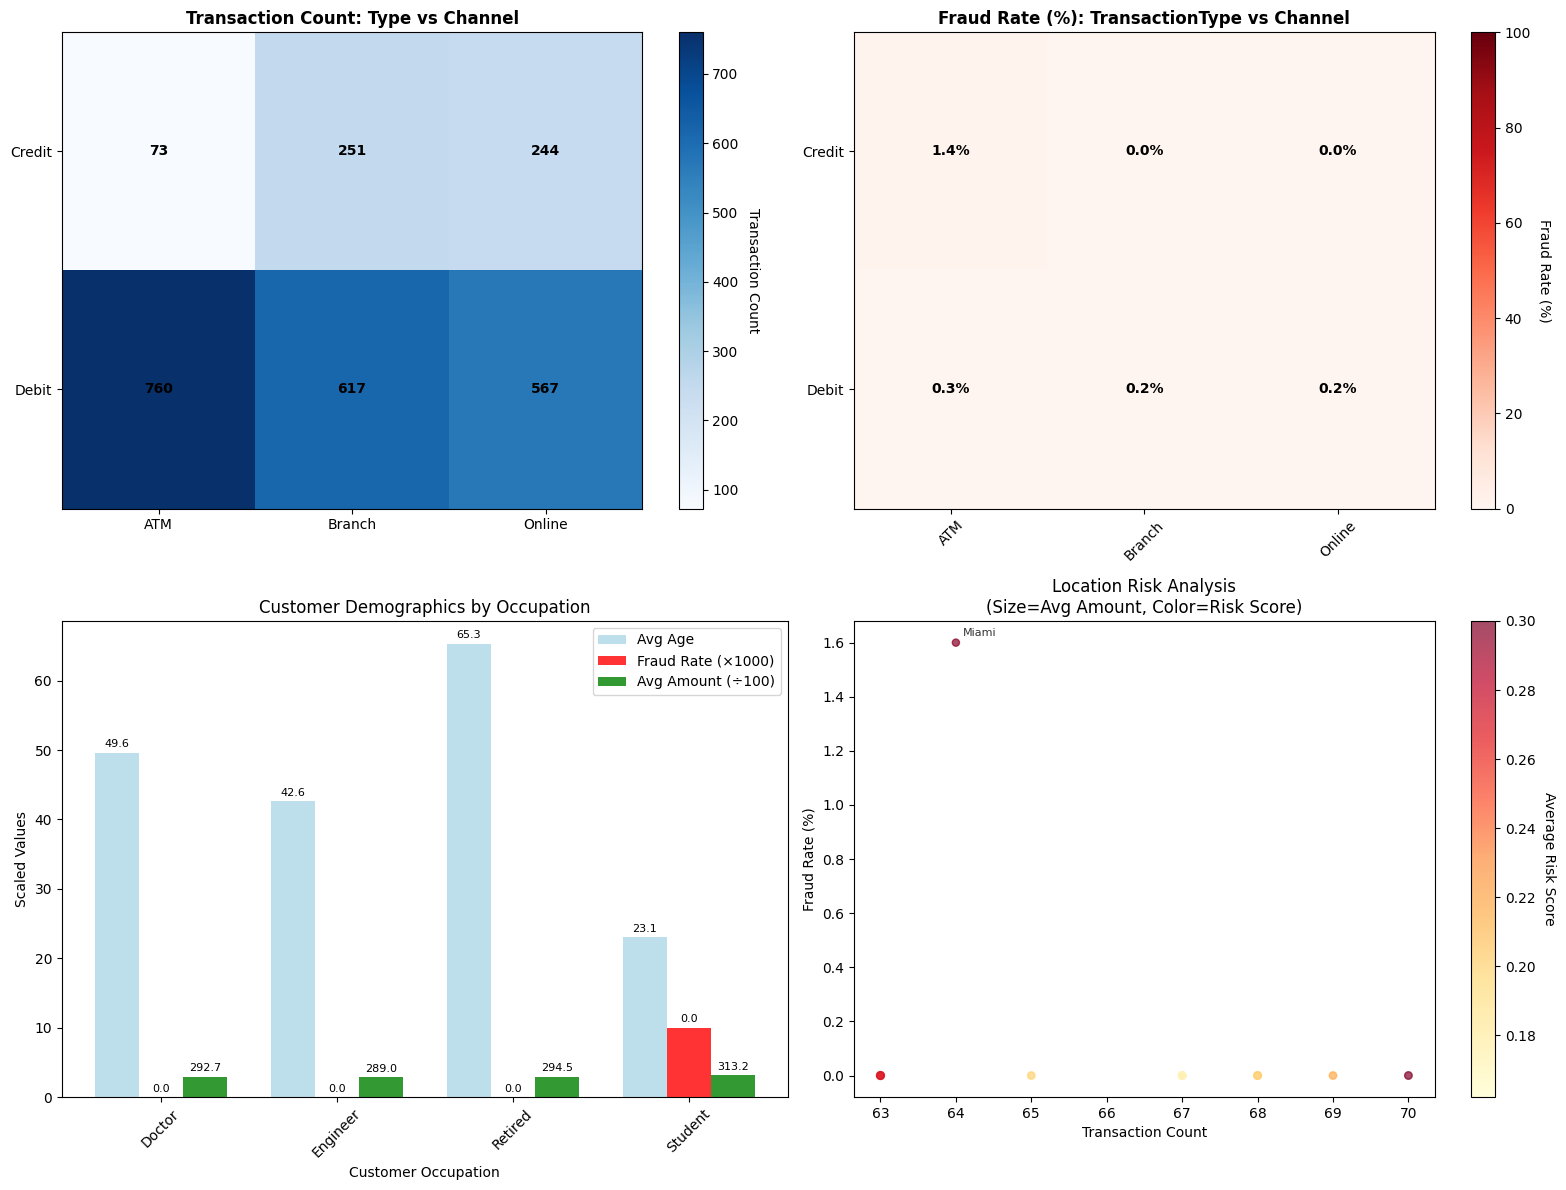


Detailed categorical insights:
-----------------------------------
Riskiest categorical combinations:
  1. Credit + ATM: 1.37% fraud rate
     (1/73 transactions, avg risk: 0.26)
  2. Debit + ATM: 0.26% fraud rate
     (2/760 transactions, avg risk: 0.23)
  3. Debit + Online: 0.18% fraud rate
     (1/567 transactions, avg risk: 0.23)
  4. Debit + Branch: 0.16% fraud rate
     (1/617 transactions, avg risk: 0.22)
  5. Credit + Branch: 0.00% fraud rate
     (0/251 transactions, avg risk: 0.18)

Channel analysis:
  ATM:
    Avg amount: $308 (±$304)
    Avg duration: 122s, Avg logins: 1.1
    Fraud rate: 0.40%, Risk score: 0.23
  Branch:
    Avg amount: $288 (±$279)
    Avg duration: 117s, Avg logins: 1.1
    Fraud rate: 0.10%, Risk score: 0.21
  Online:
    Avg amount: $297 (±$293)
    Avg duration: 120s, Avg logins: 1.1
    Fraud rate: 0.10%, Risk score: 0.23

Occupation risk profiles:
  Student (Medium Risk):
    Age: 23, Balance: $1,570
    Fraud rate: 1.000%, Transactions: 657.0
  Do

In [289]:
# Cell 17 - comprehensive categorical feature analysis and interaction patterns
print("Comprehensive categorical feature analysis and interaction patterns")
print("=" * 66)

# Analyze categorical features and their interactions
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']
available_categorical = [col for col in categorical_features if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Transaction patterns by categorical combinations
print("1. Transaction patterns by categorical combinations")

if 'TransactionType' in df.columns and 'Channel' in df.columns:
    # Cross-tabulation of TransactionType vs Channel with fraud rates
    cross_tab = pd.crosstab(df['TransactionType'], df['Channel'])
    fraud_cross_tab = pd.crosstab(df['TransactionType'], df['Channel'], 
                                 df['is_fraud'], aggfunc='mean')
    
    # Heatmap of transaction counts
    im1 = axes[0, 0].imshow(cross_tab.values, cmap='Blues', aspect='auto')
    axes[0, 0].set_title('Transaction Count: Type vs Channel', fontweight='bold')
    axes[0, 0].set_xticks(range(len(cross_tab.columns)))
    axes[0, 0].set_yticks(range(len(cross_tab.index)))
    axes[0, 0].set_xticklabels(cross_tab.columns)
    axes[0, 0].set_yticklabels(cross_tab.index)
    
    # Add count annotations
    for i in range(len(cross_tab.index)):
        for j in range(len(cross_tab.columns)):
            axes[0, 0].text(j, i, f'{cross_tab.iloc[i, j]}', 
                           ha='center', va='center', fontweight='bold')
    
    cbar1 = plt.colorbar(im1, ax=axes[0, 0])
    cbar1.set_label('Transaction Count', rotation=270, labelpad=15)

# 2. Fraud rate heatmap by categorical combinations
if 'is_fraud' in df.columns and len(available_categorical) >= 2:
    fraud_rates_matrix = pd.crosstab(df[available_categorical[0]], 
                                   df[available_categorical[1]], 
                                   df['is_fraud'], aggfunc='mean') * 100
    
    im2 = axes[0, 1].imshow(fraud_rates_matrix.values, cmap='Reds', aspect='auto', vmin=0, vmax=100)
    axes[0, 1].set_title(f'Fraud Rate (%): {available_categorical[0]} vs {available_categorical[1]}', 
                        fontweight='bold')
    axes[0, 1].set_xticks(range(len(fraud_rates_matrix.columns)))
    axes[0, 1].set_yticks(range(len(fraud_rates_matrix.index)))
    axes[0, 1].set_xticklabels(fraud_rates_matrix.columns, rotation=45)
    axes[0, 1].set_yticklabels(fraud_rates_matrix.index)
    
    # Add fraud rate annotations
    for i in range(len(fraud_rates_matrix.index)):
        for j in range(len(fraud_rates_matrix.columns)):
            rate = fraud_rates_matrix.iloc[i, j]
            if not pd.isna(rate):
                color = 'white' if rate > 50 else 'black'
                axes[0, 1].text(j, i, f'{rate:.1f}%', 
                               ha='center', va='center', color=color, fontweight='bold')
    
    cbar2 = plt.colorbar(im2, ax=axes[0, 1])
    cbar2.set_label('Fraud Rate (%)', rotation=270, labelpad=15)

# 3. Customer demographics analysis
if 'CustomerOccupation' in df.columns and 'CustomerAge' in df.columns:
    # Age distribution by occupation
    occupation_age_stats = df.groupby('CustomerOccupation').agg({
        'CustomerAge': ['mean', 'std', 'count'],
        'TransactionAmount': 'mean',
        'is_fraud': 'mean'
    }).round(2)
    
    occupation_age_stats.columns = ['avg_age', 'age_std', 'count', 'avg_amount', 'fraud_rate']
    
    # Create grouped bar chart
    x_pos = np.arange(len(occupation_age_stats))
    width = 0.25
    
    bars1 = axes[1, 0].bar(x_pos - width, occupation_age_stats['avg_age'], width, 
                          label='Avg Age', color='lightblue', alpha=0.8)
    bars2 = axes[1, 0].bar(x_pos, occupation_age_stats['fraud_rate'] * 1000, width, 
                          label='Fraud Rate (×1000)', color='red', alpha=0.8)
    bars3 = axes[1, 0].bar(x_pos + width, occupation_age_stats['avg_amount'] / 100, width, 
                          label='Avg Amount (÷100)', color='green', alpha=0.8)
    
    axes[1, 0].set_xlabel('Customer Occupation')
    axes[1, 0].set_ylabel('Scaled Values')
    axes[1, 0].set_title('Customer Demographics by Occupation')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(occupation_age_stats.index, rotation=45)
    axes[1, 0].legend()
    
    # Add value labels
    for i, (bars, values, scale) in enumerate([(bars1, occupation_age_stats['avg_age'], 1),
                                              (bars2, occupation_age_stats['fraud_rate'], 1000),
                                              (bars3, occupation_age_stats['avg_amount'], 100)]):
        for bar, value in zip(bars, values):
            if not pd.isna(value):
                axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                               f'{value:.1f}', ha='center', va='bottom', fontsize=8)

# 4. Location risk analysis
if 'Location' in df.columns:
    # Top locations by transaction volume and risk
    location_stats = df.groupby('Location').agg({
        'TransactionID': 'count',
        'TransactionAmount': 'mean',
        'is_fraud': ['sum', 'mean'],
        'risk_score': 'mean'
    }).round(3)
    
    location_stats.columns = ['transaction_count', 'avg_amount', 'fraud_count', 'fraud_rate', 'avg_risk']
    
    # Filter to top locations by transaction count
    top_locations = location_stats.nlargest(10, 'transaction_count')
    
    # Create scatter plot: transaction volume vs fraud rate
    scatter = axes[1, 1].scatter(top_locations['transaction_count'], 
                                top_locations['fraud_rate'] * 100,
                                c=top_locations['avg_risk'], 
                                s=top_locations['avg_amount']/10,
                                cmap='YlOrRd', alpha=0.7)
    
    axes[1, 1].set_xlabel('Transaction Count')
    axes[1, 1].set_ylabel('Fraud Rate (%)')
    axes[1, 1].set_title('Location Risk Analysis\n(Size=Avg Amount, Color=Risk Score)')
    
    # Add location labels for high-risk areas
    high_risk_locations = top_locations[top_locations['fraud_rate'] > top_locations['fraud_rate'].quantile(0.7)]
    for location, row in high_risk_locations.iterrows():
        axes[1, 1].annotate(location, 
                          (row['transaction_count'], row['fraud_rate'] * 100),
                          xytext=(5, 5), textcoords='offset points', 
                          fontsize=8, alpha=0.8)
    
    cbar3 = plt.colorbar(scatter, ax=axes[1, 1])
    cbar3.set_label('Average Risk Score', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Detailed categorical analysis
print("\nDetailed categorical insights:")
print("-" * 35)

# Most risky combinations
if len(available_categorical) >= 2 and 'is_fraud' in df.columns:
    print("Riskiest categorical combinations:")
    
    # Create all pairwise combinations
    combo_analysis = df.groupby(available_categorical[:2]).agg({
        'is_fraud': ['count', 'sum', 'mean'],
        'TransactionAmount': 'mean',
        'risk_score': 'mean'
    }).round(4)
    
    combo_analysis.columns = ['total_transactions', 'fraud_count', 'fraud_rate', 'avg_amount', 'avg_risk']
    
    # Filter combinations with sufficient data (at least 10 transactions)
    significant_combos = combo_analysis[combo_analysis['total_transactions'] >= 10]
    
    if len(significant_combos) > 0:
        # Sort by fraud rate
        risky_combos = significant_combos.nlargest(5, 'fraud_rate')
        
        for i, (combo, stats) in enumerate(risky_combos.iterrows(), 1):
            print(f"  {i}. {combo[0]} + {combo[1]}: {stats['fraud_rate']*100:.2f}% fraud rate")
            print(f"     ({stats['fraud_count']:.0f}/{stats['total_transactions']:.0f} transactions, avg risk: {stats['avg_risk']:.2f})")

# Channel efficiency analysis
if 'Channel' in df.columns:
    print(f"\nChannel analysis:")
    channel_analysis = df.groupby('Channel').agg({
        'TransactionAmount': ['mean', 'std'],
        'TransactionDuration': 'mean',
        'LoginAttempts': 'mean',
        'is_fraud': 'mean',
        'risk_score': 'mean'
    }).round(3)
    
    channel_analysis.columns = ['avg_amount', 'amount_std', 'avg_duration', 'avg_logins', 'fraud_rate', 'avg_risk']
    
    for channel, stats in channel_analysis.iterrows():
        print(f"  {channel}:")
        print(f"    Avg amount: ${stats['avg_amount']:.0f} (±${stats['amount_std']:.0f})")
        print(f"    Avg duration: {stats['avg_duration']:.0f}s, Avg logins: {stats['avg_logins']:.1f}")
        print(f"    Fraud rate: {stats['fraud_rate']*100:.2f}%, Risk score: {stats['avg_risk']:.2f}")

# Occupation risk profiling
if 'CustomerOccupation' in df.columns:
    print(f"\nOccupation risk profiles:")
    occupation_risk = df.groupby('CustomerOccupation').agg({
        'CustomerAge': 'mean',
        'TransactionAmount': 'mean',
        'AccountBalance': 'mean',
        'is_fraud': 'mean',
        'risk_score': 'mean',
        'TransactionID': 'count'
    }).round(2)
    
    occupation_risk.columns = ['avg_age', 'avg_amount', 'avg_balance', 'fraud_rate', 'avg_risk', 'count']
    
    # Sort by fraud rate
    for occupation, stats in occupation_risk.sort_values('fraud_rate', ascending=False).iterrows():
        risk_level = "High" if stats['fraud_rate'] > 0.01 else "Medium" if stats['fraud_rate'] > 0.005 else "Low"
        print(f"  {occupation} ({risk_level} Risk):")
        print(f"    Age: {stats['avg_age']:.0f}, Balance: ${stats['avg_balance']:,.0f}")
        print(f"    Fraud rate: {stats['fraud_rate']*100:.3f}%, Transactions: {stats['count']}")

print("\n✓ Comprehensive categorical feature analysis completed")

Comprehensive correlation heatmaps and feature relationships
Correlation analysis for 20 features
Creating feature relationship network...
Analyzing 8 features: ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge', 'hour', 'is_weekend', 'is_high_amount']


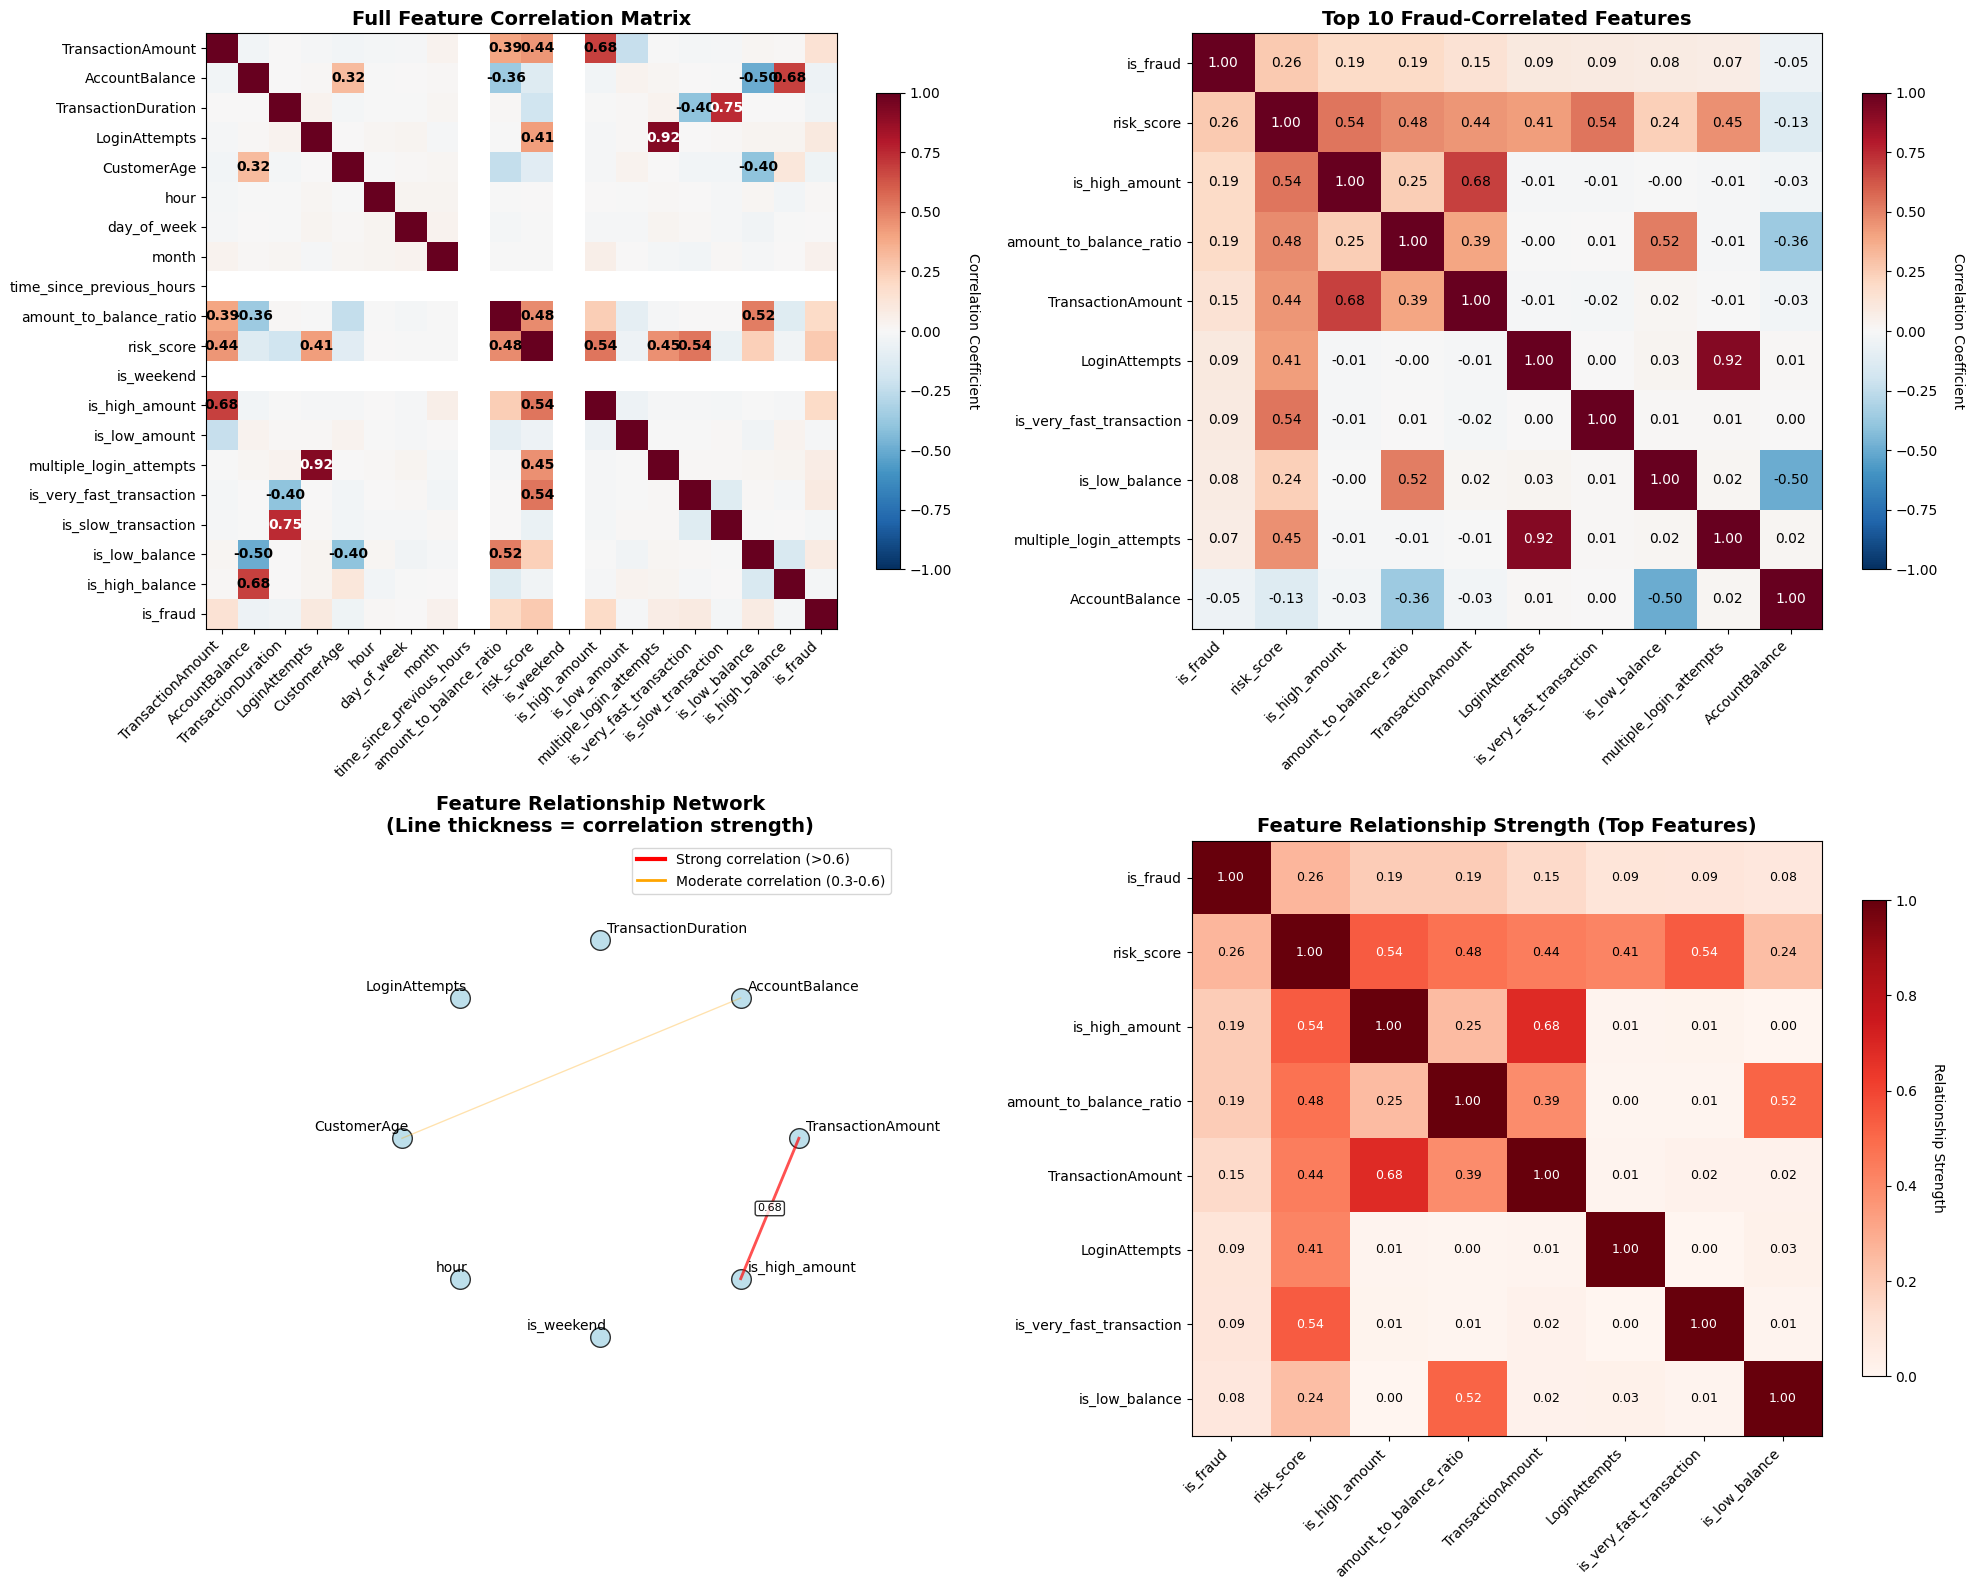


Detailed correlation analysis:
-----------------------------------
Strong positive correlations (r > 0.3): 13
  LoginAttempts ↔ multiple_login_attempts: 0.915
  TransactionDuration ↔ is_slow_transaction: 0.749
  AccountBalance ↔ is_high_balance: 0.685
  TransactionAmount ↔ is_high_amount: 0.683
  risk_score ↔ is_very_fast_transaction: 0.539

Strong negative correlations (r < -0.3): 4
  AccountBalance ↔ is_low_balance: -0.499
  CustomerAge ↔ is_low_balance: -0.401
  TransactionDuration ↔ is_very_fast_transaction: -0.398
  AccountBalance ↔ amount_to_balance_ratio: -0.364

Top features correlated with fraud:
  1. risk_score: 0.263 ↑
  2. is_high_amount: 0.194 ↑
  3. amount_to_balance_ratio: 0.193 ↑
  4. TransactionAmount: 0.146 ↑
  5. LoginAttempts: 0.095 ↑
  6. is_very_fast_transaction: 0.091 ↑
  7. is_low_balance: 0.080 ↑
  8. multiple_login_attempts: 0.073 ↑

Feature relationship network insights:
  Strong feature relationships found: 2
    TransactionAmount and is_high_amount are pos

In [290]:
# Cell 15 - comprehensive correlation heatmaps and feature relationships
print("Comprehensive correlation heatmaps and feature relationships")
print("=" * 58)

# Prepare feature sets for correlation analysis
numerical_features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 
                     'LoginAttempts', 'CustomerAge', 'hour', 'day_of_week', 'month',
                     'time_since_previous_hours', 'amount_to_balance_ratio', 'risk_score']

binary_features = ['is_weekend', 'is_high_amount', 'is_low_amount', 'multiple_login_attempts',
                  'is_very_fast_transaction', 'is_slow_transaction', 'is_low_balance', 
                  'is_high_balance', 'is_fraud']

# Filter to existing columns
available_numerical = [col for col in numerical_features if col in df.columns]
available_binary = [col for col in binary_features if col in df.columns]
all_corr_features = available_numerical + available_binary

print(f"Correlation analysis for {len(all_corr_features)} features")

# Create correlation matrices
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Full correlation heatmap
correlation_matrix = df[all_corr_features].corr()

# Create custom colormap
import matplotlib.colors as colors
cmap = plt.cm.RdBu_r

im1 = axes[0, 0].imshow(correlation_matrix.values, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_title('Full Feature Correlation Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(len(correlation_matrix.columns)))
axes[0, 0].set_yticks(range(len(correlation_matrix.columns)))
axes[0, 0].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[0, 0].set_yticklabels(correlation_matrix.columns)

# Add correlation values for strong correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        if abs(value) > 0.3 and i != j:  # Show only strong correlations
            color = 'white' if abs(value) > 0.7 else 'black'
            axes[0, 0].text(j, i, f'{value:.2f}', ha='center', va='center', 
                           color=color, fontweight='bold')

# Add colorbar
cbar1 = plt.colorbar(im1, ax=axes[0, 0], shrink=0.8)
cbar1.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# 2. Fraud-focused correlation heatmap (correlations with fraud target)
if 'is_fraud' in df.columns:
    fraud_correlations = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
    top_fraud_features = fraud_correlations.head(10).index.tolist()
    
    fraud_corr_matrix = df[top_fraud_features].corr()
    
    im2 = axes[0, 1].imshow(fraud_corr_matrix.values, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
    axes[0, 1].set_title('Top 10 Fraud-Correlated Features', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(range(len(fraud_corr_matrix.columns)))
    axes[0, 1].set_yticks(range(len(fraud_corr_matrix.columns)))
    axes[0, 1].set_xticklabels(fraud_corr_matrix.columns, rotation=45, ha='right')
    axes[0, 1].set_yticklabels(fraud_corr_matrix.columns)
    
    # Add correlation values
    for i in range(len(fraud_corr_matrix.columns)):
        for j in range(len(fraud_corr_matrix.columns)):
            value = fraud_corr_matrix.iloc[i, j]
            color = 'white' if abs(value) > 0.7 else 'black'
            axes[0, 1].text(j, i, f'{value:.2f}', ha='center', va='center', 
                           color=color, fontsize=10)
    
    cbar2 = plt.colorbar(im2, ax=axes[0, 1], shrink=0.8)
    cbar2.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# 3. Feature relationship network visualization (instead of problematic clustering)
print("Creating feature relationship network...")

# Select subset of features for relationship analysis
cluster_features = available_numerical[:6] + available_binary[:4]
cluster_features = cluster_features[:min(len(cluster_features), 8)]

print(f"Analyzing {len(cluster_features)} features: {cluster_features}")

# Calculate feature relationships
feature_corr_subset = correlation_matrix.loc[cluster_features, cluster_features]

# Create a feature relationship network visualization
# Use absolute correlations as edge weights
abs_corr = np.abs(feature_corr_subset.values)
np.fill_diagonal(abs_corr, 0)  # Remove self-correlations

# Create a network-style visualization
n_features = len(cluster_features)
angles = np.linspace(0, 2*np.pi, n_features, endpoint=False)
x_pos = np.cos(angles)
y_pos = np.sin(angles)

# Plot the network
axes[1, 0].scatter(x_pos, y_pos, s=200, c='lightblue', alpha=0.8, edgecolors='black')

# Add feature labels
for i, (x, y, feat) in enumerate(zip(x_pos, y_pos, cluster_features)):
    axes[1, 0].annotate(feat, (x, y), xytext=(5, 5), textcoords='offset points',
                       fontsize=10, ha='left' if x > 0 else 'right')

# Draw connections for strong correlations
for i in range(n_features):
    for j in range(i+1, n_features):
        corr_strength = abs_corr[i, j]
        if corr_strength > 0.3:  # Only show strong correlations
            # Line thickness proportional to correlation strength
            linewidth = corr_strength * 3
            alpha = min(corr_strength, 0.8)
            color = 'red' if corr_strength > 0.6 else 'orange'
            
            axes[1, 0].plot([x_pos[i], x_pos[j]], [y_pos[i], y_pos[j]], 
                           color=color, linewidth=linewidth, alpha=alpha)
            
            # Add correlation value for very strong correlations
            if corr_strength > 0.5:
                mid_x = (x_pos[i] + x_pos[j]) / 2
                mid_y = (y_pos[i] + y_pos[j]) / 2
                axes[1, 0].text(mid_x, mid_y, f'{corr_strength:.2f}', 
                               fontsize=8, ha='center', va='center',
                               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

axes[1, 0].set_xlim(-1.5, 1.5)
axes[1, 0].set_ylim(-1.5, 1.5)
axes[1, 0].set_aspect('equal')
axes[1, 0].set_title('Feature Relationship Network\n(Line thickness = correlation strength)', 
                    fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=3, label='Strong correlation (>0.6)'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Moderate correlation (0.3-0.6)')
]
axes[1, 0].legend(handles=legend_elements, loc='upper right')

# 4. Pairwise relationship strength heatmap
# Calculate various relationship metrics
relationship_matrix = pd.DataFrame(index=all_corr_features, columns=all_corr_features)

for feat1 in all_corr_features:
    for feat2 in all_corr_features:
        if feat1 == feat2:
            relationship_matrix.loc[feat1, feat2] = 1.0
        else:
            # Use absolute correlation as relationship strength
            corr_val = abs(correlation_matrix.loc[feat1, feat2])
            if pd.isna(corr_val):
                corr_val = 0.0
            relationship_matrix.loc[feat1, feat2] = corr_val

relationship_matrix = relationship_matrix.astype(float)

# Plot top relationships only (to avoid clutter)
top_features = fraud_correlations.head(8).index.tolist() if 'is_fraud' in df.columns else all_corr_features[:8]
rel_subset = relationship_matrix.loc[top_features, top_features]

im4 = axes[1, 1].imshow(rel_subset.values, cmap='Reds', aspect='auto', vmin=0, vmax=1)
axes[1, 1].set_title('Feature Relationship Strength (Top Features)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(rel_subset.columns)))
axes[1, 1].set_yticks(range(len(rel_subset.columns)))
axes[1, 1].set_xticklabels(rel_subset.columns, rotation=45, ha='right')
axes[1, 1].set_yticklabels(rel_subset.columns)

# Add relationship strength values
for i in range(len(rel_subset.columns)):
    for j in range(len(rel_subset.columns)):
        value = rel_subset.iloc[i, j]
        color = 'white' if value > 0.5 else 'black'
        axes[1, 1].text(j, i, f'{value:.2f}', ha='center', va='center', 
                       color=color, fontsize=9)

cbar4 = plt.colorbar(im4, ax=axes[1, 1], shrink=0.8)
cbar4.set_label('Relationship Strength', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print detailed correlation insights
print("\nDetailed correlation analysis:")
print("-" * 35)

# Strong positive correlations
strong_positive = []
strong_negative = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if not pd.isna(corr_val):  # Check for NaN values
            if corr_val > 0.3:
                strong_positive.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
            elif corr_val < -0.3:
                strong_negative.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"Strong positive correlations (r > 0.3): {len(strong_positive)}")
for feat1, feat2, corr in sorted(strong_positive, key=lambda x: x[2], reverse=True)[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

print(f"\nStrong negative correlations (r < -0.3): {len(strong_negative)}")
for feat1, feat2, corr in sorted(strong_negative, key=lambda x: x[2])[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

# Feature importance for fraud detection
if 'is_fraud' in df.columns:
    print(f"\nTop features correlated with fraud:")
    fraud_corr_sorted = fraud_correlations.drop('is_fraud').head(8)
    for i, (feature, corr) in enumerate(fraud_corr_sorted.items(), 1):
        direction = "↑" if correlation_matrix.loc[feature, 'is_fraud'] > 0 else "↓"
        print(f"  {i}. {feature}: {corr:.3f} {direction}")

# Network analysis insights
print(f"\nFeature relationship network insights:")
strong_relationships = []
for i in range(len(cluster_features)):
    for j in range(i+1, len(cluster_features)):
        corr_val = feature_corr_subset.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_relationships.append((cluster_features[i], cluster_features[j], corr_val))

strong_relationships.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"  Strong feature relationships found: {len(strong_relationships)}")
for feat1, feat2, corr in strong_relationships[:3]:
    relationship_type = "positively" if corr > 0 else "negatively"
    print(f"    {feat1} and {feat2} are {relationship_type} correlated ({corr:.3f})")

print("\n✓ Comprehensive correlation analysis completed")

Comprehensive correlation heatmaps and feature relationships
Correlation analysis for 20 features
Creating feature relationship network...
Analyzing 8 features: ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge', 'hour', 'is_weekend', 'is_high_amount']


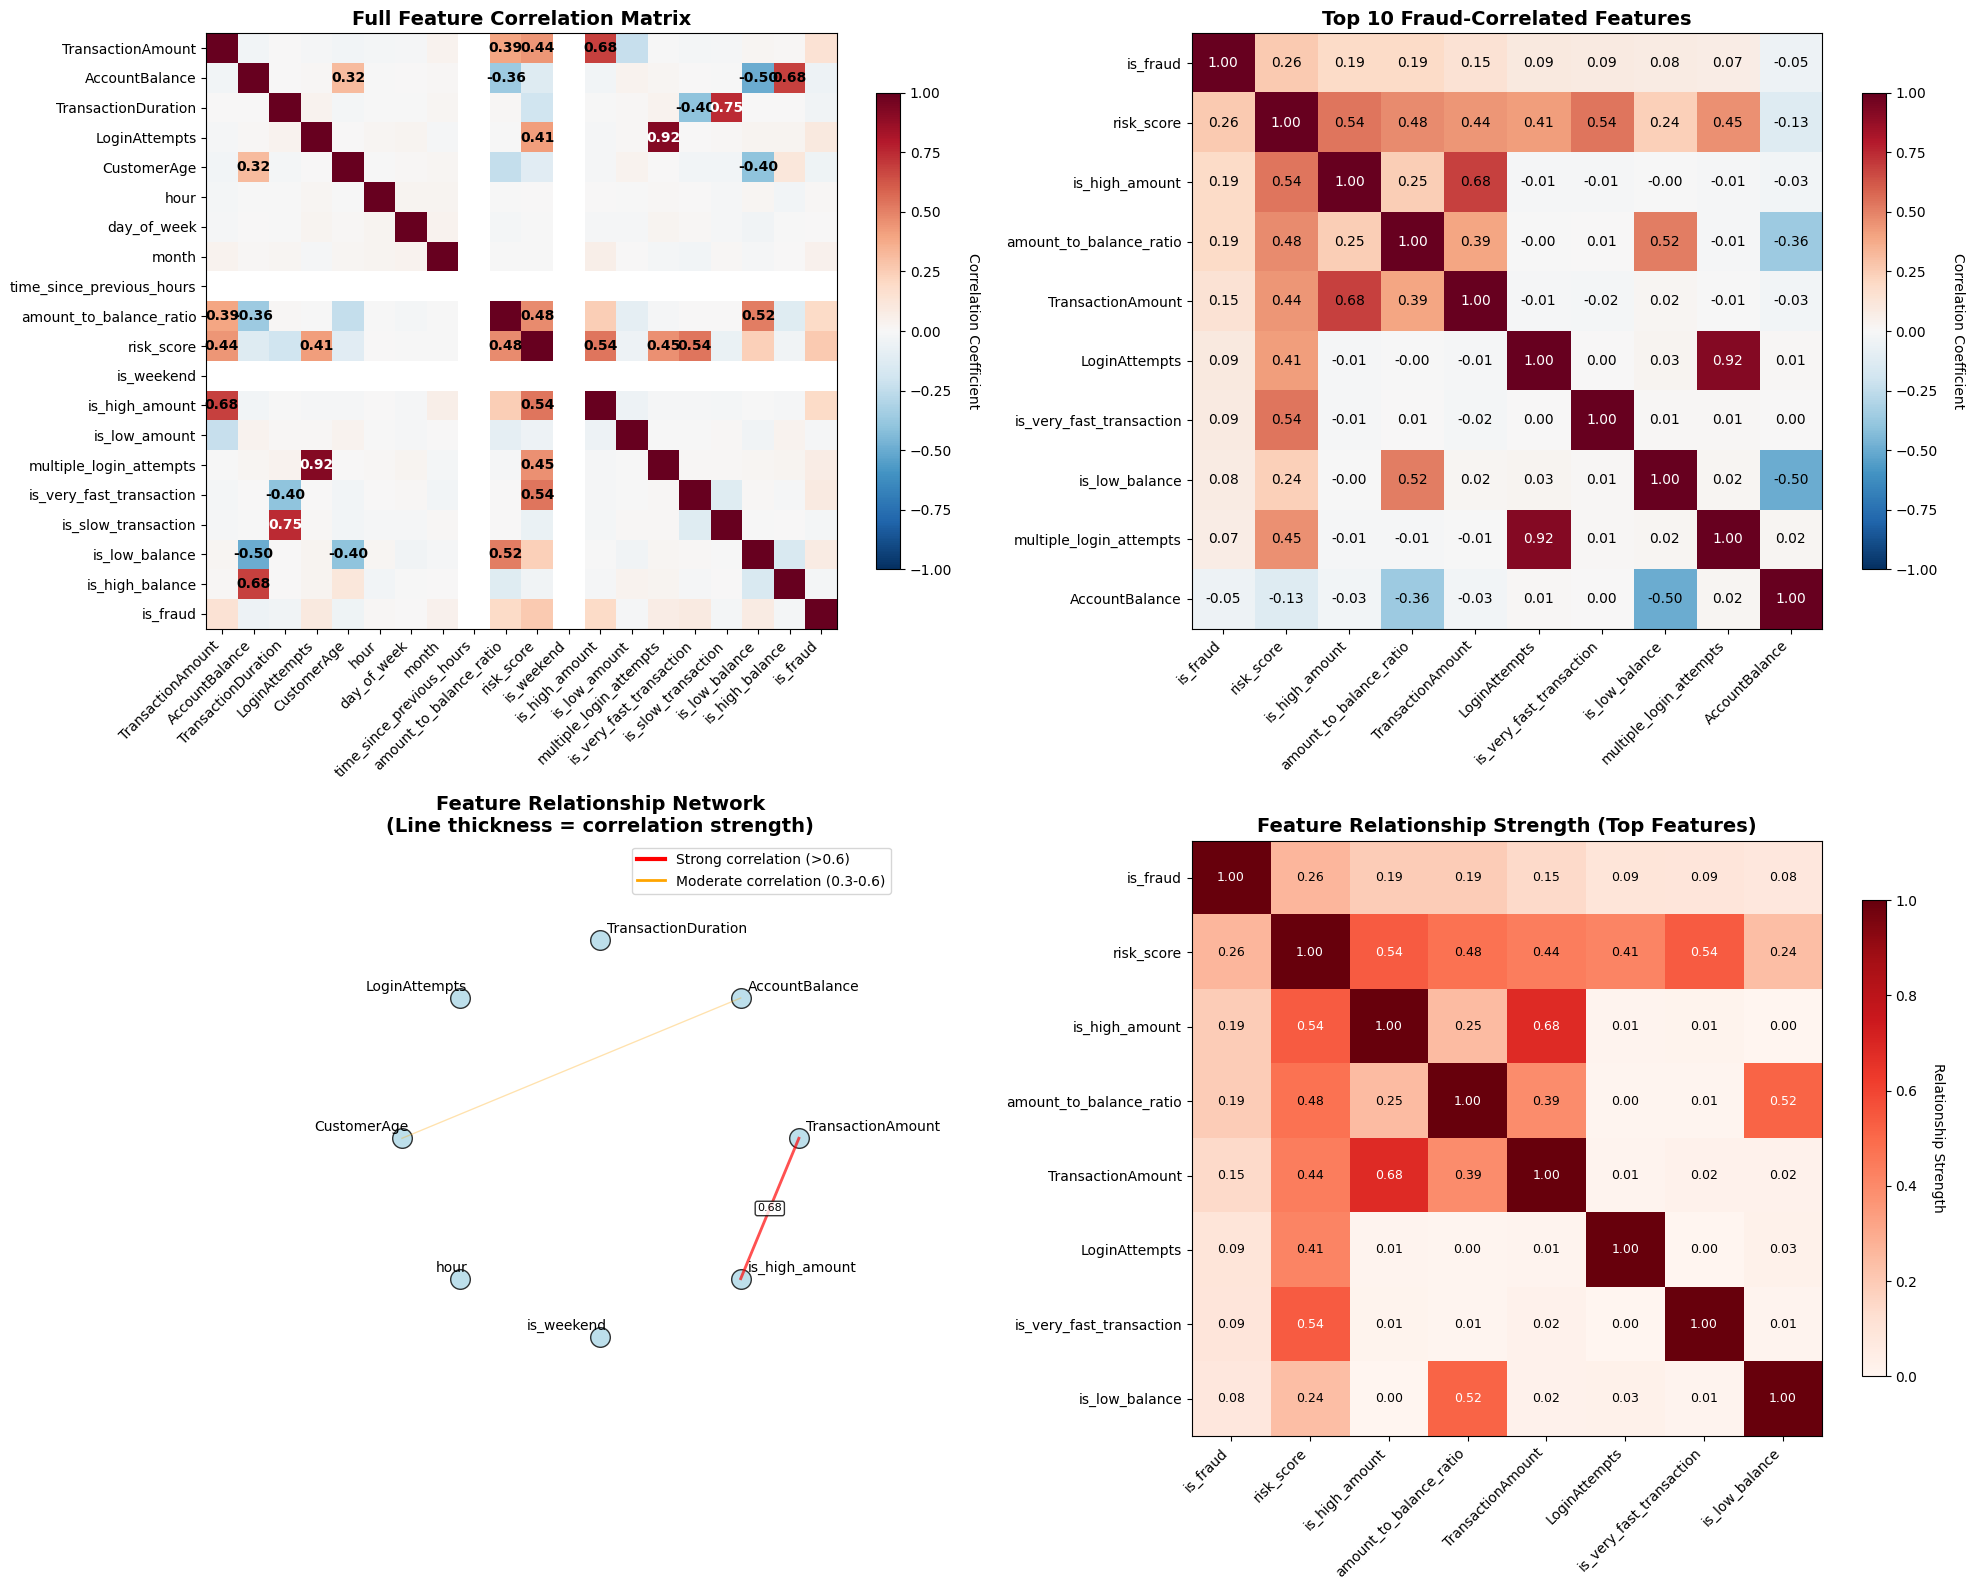


Detailed correlation analysis:
-----------------------------------
Strong positive correlations (r > 0.3): 13
  LoginAttempts ↔ multiple_login_attempts: 0.915
  TransactionDuration ↔ is_slow_transaction: 0.749
  AccountBalance ↔ is_high_balance: 0.685
  TransactionAmount ↔ is_high_amount: 0.683
  risk_score ↔ is_very_fast_transaction: 0.539

Strong negative correlations (r < -0.3): 4
  AccountBalance ↔ is_low_balance: -0.499
  CustomerAge ↔ is_low_balance: -0.401
  TransactionDuration ↔ is_very_fast_transaction: -0.398
  AccountBalance ↔ amount_to_balance_ratio: -0.364

Top features correlated with fraud:
  1. risk_score: 0.263 ↑
  2. is_high_amount: 0.194 ↑
  3. amount_to_balance_ratio: 0.193 ↑
  4. TransactionAmount: 0.146 ↑
  5. LoginAttempts: 0.095 ↑
  6. is_very_fast_transaction: 0.091 ↑
  7. is_low_balance: 0.080 ↑
  8. multiple_login_attempts: 0.073 ↑

Feature relationship network insights:
  Strong feature relationships found: 2
    TransactionAmount and is_high_amount are pos

In [291]:
# Cell 15 - comprehensive correlation heatmaps and feature relationships
print("Comprehensive correlation heatmaps and feature relationships")
print("=" * 58)

# Prepare feature sets for correlation analysis
numerical_features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 
                     'LoginAttempts', 'CustomerAge', 'hour', 'day_of_week', 'month',
                     'time_since_previous_hours', 'amount_to_balance_ratio', 'risk_score']

binary_features = ['is_weekend', 'is_high_amount', 'is_low_amount', 'multiple_login_attempts',
                  'is_very_fast_transaction', 'is_slow_transaction', 'is_low_balance', 
                  'is_high_balance', 'is_fraud']

# Filter to existing columns
available_numerical = [col for col in numerical_features if col in df.columns]
available_binary = [col for col in binary_features if col in df.columns]
all_corr_features = available_numerical + available_binary

print(f"Correlation analysis for {len(all_corr_features)} features")

# Create correlation matrices
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Full correlation heatmap
correlation_matrix = df[all_corr_features].corr()

# Create custom colormap
import matplotlib.colors as colors
cmap = plt.cm.RdBu_r

im1 = axes[0, 0].imshow(correlation_matrix.values, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_title('Full Feature Correlation Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(len(correlation_matrix.columns)))
axes[0, 0].set_yticks(range(len(correlation_matrix.columns)))
axes[0, 0].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[0, 0].set_yticklabels(correlation_matrix.columns)

# Add correlation values for strong correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        if abs(value) > 0.3 and i != j:  # Show only strong correlations
            color = 'white' if abs(value) > 0.7 else 'black'
            axes[0, 0].text(j, i, f'{value:.2f}', ha='center', va='center', 
                           color=color, fontweight='bold')

# Add colorbar
cbar1 = plt.colorbar(im1, ax=axes[0, 0], shrink=0.8)
cbar1.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# 2. Fraud-focused correlation heatmap (correlations with fraud target)
if 'is_fraud' in df.columns:
    fraud_correlations = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
    top_fraud_features = fraud_correlations.head(10).index.tolist()
    
    fraud_corr_matrix = df[top_fraud_features].corr()
    
    im2 = axes[0, 1].imshow(fraud_corr_matrix.values, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
    axes[0, 1].set_title('Top 10 Fraud-Correlated Features', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(range(len(fraud_corr_matrix.columns)))
    axes[0, 1].set_yticks(range(len(fraud_corr_matrix.columns)))
    axes[0, 1].set_xticklabels(fraud_corr_matrix.columns, rotation=45, ha='right')
    axes[0, 1].set_yticklabels(fraud_corr_matrix.columns)
    
    # Add correlation values
    for i in range(len(fraud_corr_matrix.columns)):
        for j in range(len(fraud_corr_matrix.columns)):
            value = fraud_corr_matrix.iloc[i, j]
            color = 'white' if abs(value) > 0.7 else 'black'
            axes[0, 1].text(j, i, f'{value:.2f}', ha='center', va='center', 
                           color=color, fontsize=10)
    
    cbar2 = plt.colorbar(im2, ax=axes[0, 1], shrink=0.8)
    cbar2.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# 3. Feature relationship network visualization (instead of problematic clustering)
print("Creating feature relationship network...")

# Select subset of features for relationship analysis
cluster_features = available_numerical[:6] + available_binary[:4]
cluster_features = cluster_features[:min(len(cluster_features), 8)]

print(f"Analyzing {len(cluster_features)} features: {cluster_features}")

# Calculate feature relationships
feature_corr_subset = correlation_matrix.loc[cluster_features, cluster_features]

# Create a feature relationship network visualization
# Use absolute correlations as edge weights
abs_corr = np.abs(feature_corr_subset.values)
np.fill_diagonal(abs_corr, 0)  # Remove self-correlations

# Create a network-style visualization
n_features = len(cluster_features)
angles = np.linspace(0, 2*np.pi, n_features, endpoint=False)
x_pos = np.cos(angles)
y_pos = np.sin(angles)

# Plot the network
axes[1, 0].scatter(x_pos, y_pos, s=200, c='lightblue', alpha=0.8, edgecolors='black')

# Add feature labels
for i, (x, y, feat) in enumerate(zip(x_pos, y_pos, cluster_features)):
    axes[1, 0].annotate(feat, (x, y), xytext=(5, 5), textcoords='offset points',
                       fontsize=10, ha='left' if x > 0 else 'right')

# Draw connections for strong correlations
for i in range(n_features):
    for j in range(i+1, n_features):
        corr_strength = abs_corr[i, j]
        if corr_strength > 0.3:  # Only show strong correlations
            # Line thickness proportional to correlation strength
            linewidth = corr_strength * 3
            alpha = min(corr_strength, 0.8)
            color = 'red' if corr_strength > 0.6 else 'orange'
            
            axes[1, 0].plot([x_pos[i], x_pos[j]], [y_pos[i], y_pos[j]], 
                           color=color, linewidth=linewidth, alpha=alpha)
            
            # Add correlation value for very strong correlations
            if corr_strength > 0.5:
                mid_x = (x_pos[i] + x_pos[j]) / 2
                mid_y = (y_pos[i] + y_pos[j]) / 2
                axes[1, 0].text(mid_x, mid_y, f'{corr_strength:.2f}', 
                               fontsize=8, ha='center', va='center',
                               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

axes[1, 0].set_xlim(-1.5, 1.5)
axes[1, 0].set_ylim(-1.5, 1.5)
axes[1, 0].set_aspect('equal')
axes[1, 0].set_title('Feature Relationship Network\n(Line thickness = correlation strength)', 
                    fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=3, label='Strong correlation (>0.6)'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Moderate correlation (0.3-0.6)')
]
axes[1, 0].legend(handles=legend_elements, loc='upper right')

# 4. Pairwise relationship strength heatmap
# Calculate various relationship metrics
relationship_matrix = pd.DataFrame(index=all_corr_features, columns=all_corr_features)

for feat1 in all_corr_features:
    for feat2 in all_corr_features:
        if feat1 == feat2:
            relationship_matrix.loc[feat1, feat2] = 1.0
        else:
            # Use absolute correlation as relationship strength
            corr_val = abs(correlation_matrix.loc[feat1, feat2])
            if pd.isna(corr_val):
                corr_val = 0.0
            relationship_matrix.loc[feat1, feat2] = corr_val

relationship_matrix = relationship_matrix.astype(float)

# Plot top relationships only (to avoid clutter)
top_features = fraud_correlations.head(8).index.tolist() if 'is_fraud' in df.columns else all_corr_features[:8]
rel_subset = relationship_matrix.loc[top_features, top_features]

im4 = axes[1, 1].imshow(rel_subset.values, cmap='Reds', aspect='auto', vmin=0, vmax=1)
axes[1, 1].set_title('Feature Relationship Strength (Top Features)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(rel_subset.columns)))
axes[1, 1].set_yticks(range(len(rel_subset.columns)))
axes[1, 1].set_xticklabels(rel_subset.columns, rotation=45, ha='right')
axes[1, 1].set_yticklabels(rel_subset.columns)

# Add relationship strength values
for i in range(len(rel_subset.columns)):
    for j in range(len(rel_subset.columns)):
        value = rel_subset.iloc[i, j]
        color = 'white' if value > 0.5 else 'black'
        axes[1, 1].text(j, i, f'{value:.2f}', ha='center', va='center', 
                       color=color, fontsize=9)

cbar4 = plt.colorbar(im4, ax=axes[1, 1], shrink=0.8)
cbar4.set_label('Relationship Strength', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print detailed correlation insights
print("\nDetailed correlation analysis:")
print("-" * 35)

# Strong positive correlations
strong_positive = []
strong_negative = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if not pd.isna(corr_val):  # Check for NaN values
            if corr_val > 0.3:
                strong_positive.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
            elif corr_val < -0.3:
                strong_negative.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"Strong positive correlations (r > 0.3): {len(strong_positive)}")
for feat1, feat2, corr in sorted(strong_positive, key=lambda x: x[2], reverse=True)[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

print(f"\nStrong negative correlations (r < -0.3): {len(strong_negative)}")
for feat1, feat2, corr in sorted(strong_negative, key=lambda x: x[2])[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

# Feature importance for fraud detection
if 'is_fraud' in df.columns:
    print(f"\nTop features correlated with fraud:")
    fraud_corr_sorted = fraud_correlations.drop('is_fraud').head(8)
    for i, (feature, corr) in enumerate(fraud_corr_sorted.items(), 1):
        direction = "↑" if correlation_matrix.loc[feature, 'is_fraud'] > 0 else "↓"
        print(f"  {i}. {feature}: {corr:.3f} {direction}")

# Network analysis insights
print(f"\nFeature relationship network insights:")
strong_relationships = []
for i in range(len(cluster_features)):
    for j in range(i+1, len(cluster_features)):
        corr_val = feature_corr_subset.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_relationships.append((cluster_features[i], cluster_features[j], corr_val))

strong_relationships.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"  Strong feature relationships found: {len(strong_relationships)}")
for feat1, feat2, corr in strong_relationships[:3]:
    relationship_type = "positively" if corr > 0 else "negatively"
    print(f"    {feat1} and {feat2} are {relationship_type} correlated ({corr:.3f})")

print("\n✓ Comprehensive correlation analysis completed")

Advanced feature comparison visualizations
1. Feature distributions by fraud status
2. Behavioral feature comparisons
3. Temporal pattern analysis


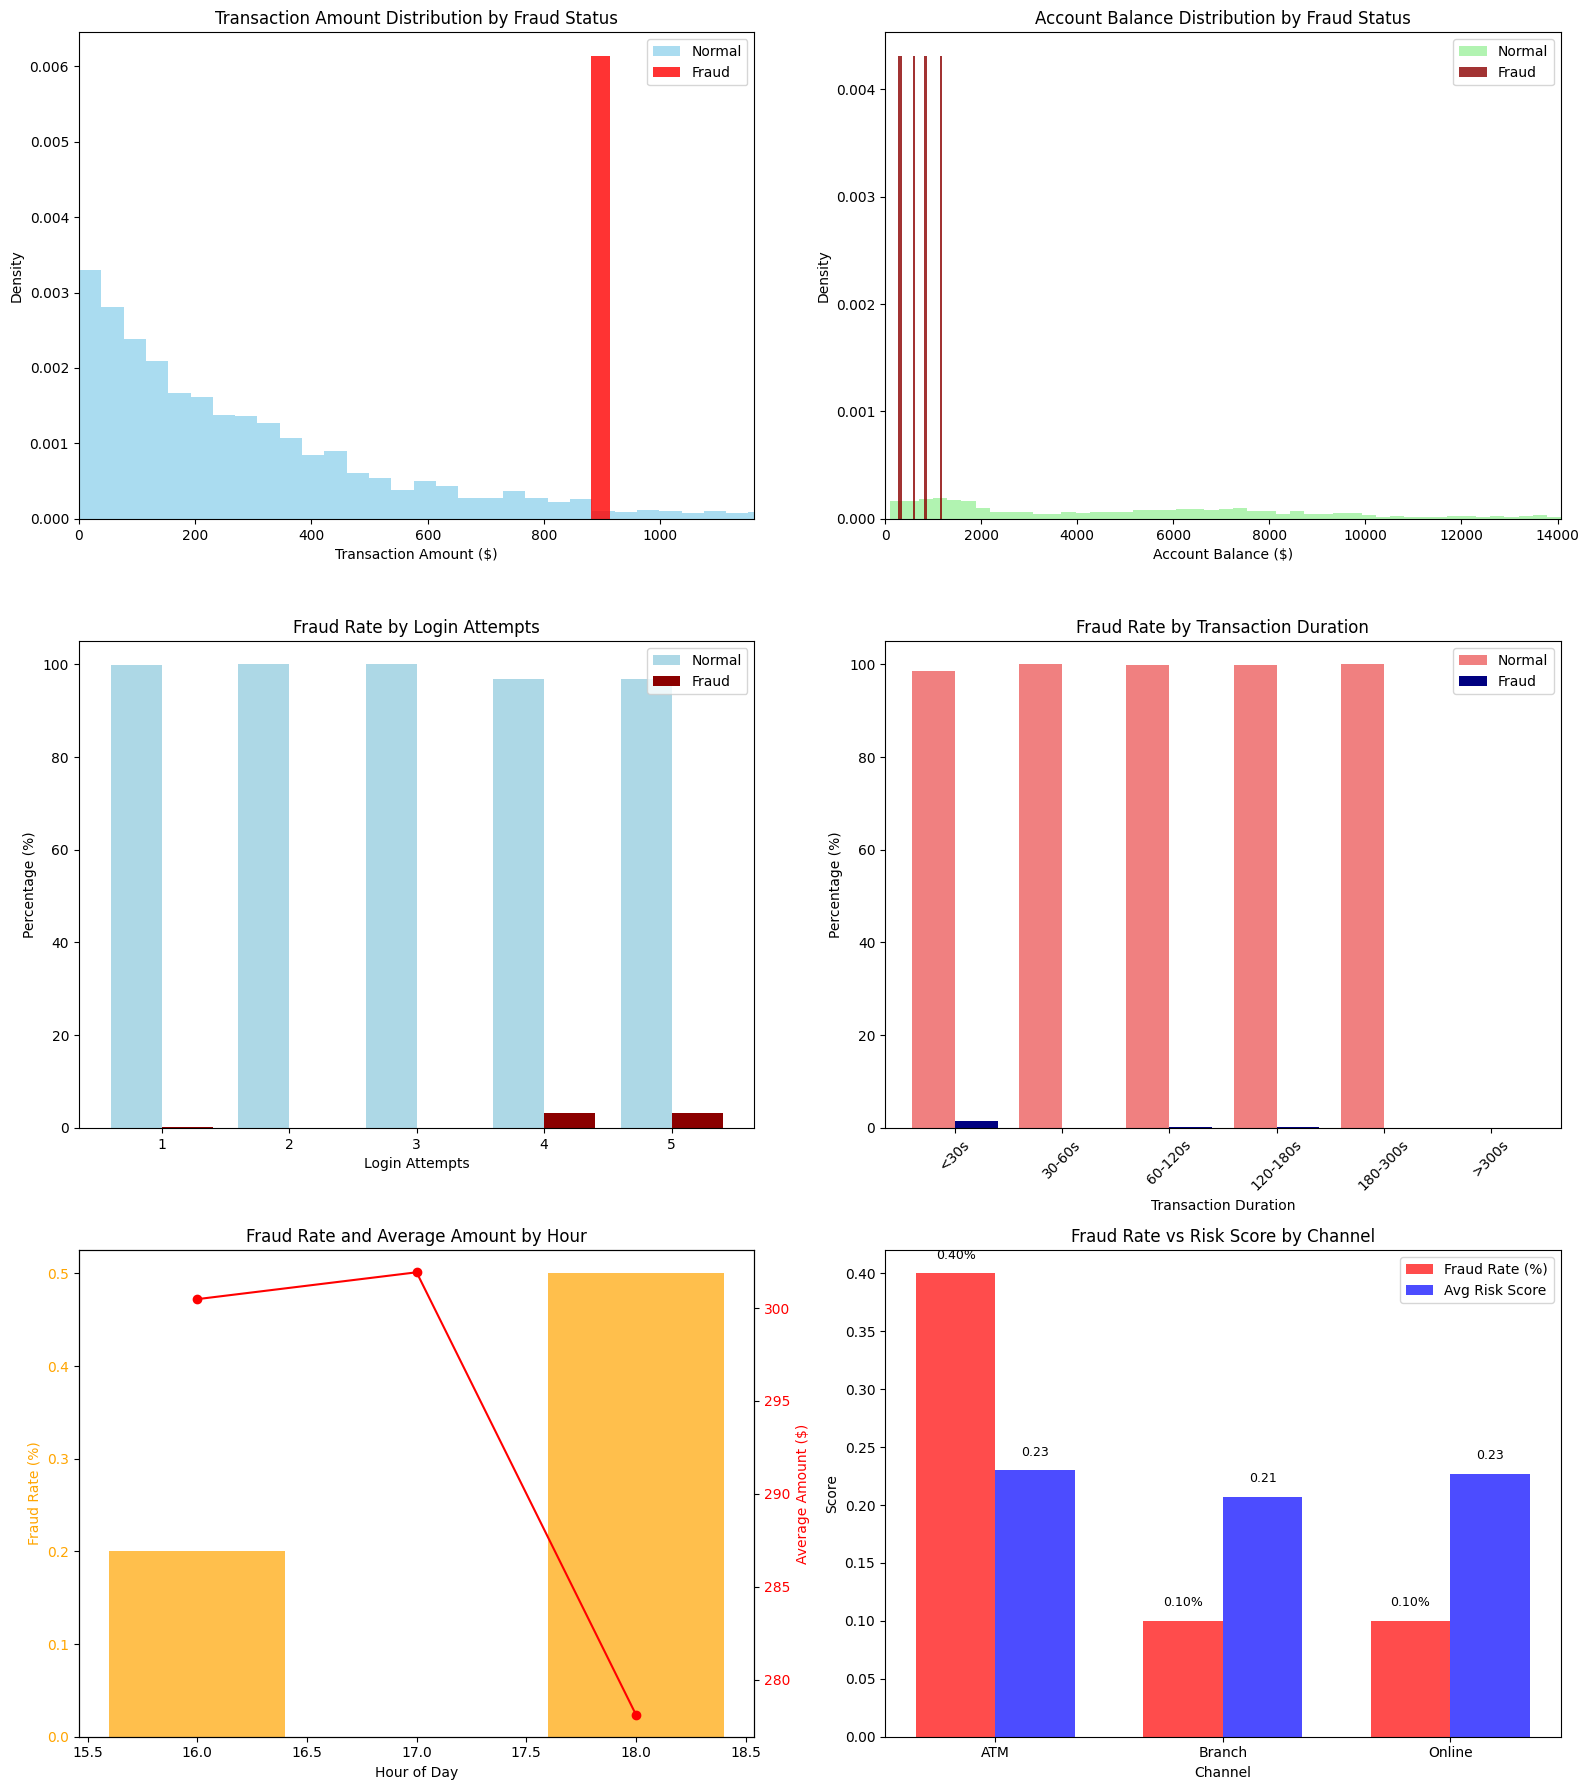


Key insights from feature comparisons:
- Peak fraud hour: 18:00 (0.50% fraud rate)
- Riskiest channel: ATM (0.40% fraud rate)
- Riskiest duration: <30s (1.52% fraud rate)

✓ Advanced feature comparison visualizations completed


In [292]:
# Cell 14 - advanced feature comparison visualizations
print("Advanced feature comparison visualizations")
print("=" * 42)

# Create comprehensive feature comparison plots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Feature distributions by fraud status
print("1. Feature distributions by fraud status")

# Transaction amount distribution
fraud_amounts = df[df['is_fraud'] == 1]['TransactionAmount']
normal_amounts = df[df['is_fraud'] == 0]['TransactionAmount']

axes[0, 0].hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
axes[0, 0].hist(fraud_amounts, bins=20, alpha=0.8, label='Fraud', color='red', density=True)
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Transaction Amount Distribution by Fraud Status')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, df['TransactionAmount'].quantile(0.98))

# Account balance distribution
fraud_balance = df[df['is_fraud'] == 1]['AccountBalance']
normal_balance = df[df['is_fraud'] == 0]['AccountBalance']

axes[0, 1].hist(normal_balance, bins=50, alpha=0.7, label='Normal', color='lightgreen', density=True)
axes[0, 1].hist(fraud_balance, bins=20, alpha=0.8, label='Fraud', color='darkred', density=True)
axes[0, 1].set_xlabel('Account Balance ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Account Balance Distribution by Fraud Status')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, df['AccountBalance'].quantile(0.98))

# 2. Behavioral feature comparisons
print("2. Behavioral feature comparisons")

# Login attempts comparison
login_fraud = df.groupby(['LoginAttempts', 'is_fraud']).size().unstack(fill_value=0)
login_fraud_pct = login_fraud.div(login_fraud.sum(axis=1), axis=0) * 100

login_fraud_pct.plot(kind='bar', ax=axes[1, 0], color=['lightblue', 'darkred'], width=0.8)
axes[1, 0].set_xlabel('Login Attempts')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_title('Fraud Rate by Login Attempts')
axes[1, 0].legend(['Normal', 'Fraud'])
axes[1, 0].tick_params(axis='x', rotation=0)

# Transaction duration comparison
duration_bins = [0, 30, 60, 120, 180, 300, float('inf')]
duration_labels = ['<30s', '30-60s', '60-120s', '120-180s', '180-300s', '>300s']
df['duration_category'] = pd.cut(df['TransactionDuration'], bins=duration_bins, labels=duration_labels)

duration_fraud = df.groupby(['duration_category', 'is_fraud']).size().unstack(fill_value=0)
duration_fraud_pct = duration_fraud.div(duration_fraud.sum(axis=1), axis=0) * 100

duration_fraud_pct.plot(kind='bar', ax=axes[1, 1], color=['lightcoral', 'navy'], width=0.8)
axes[1, 1].set_xlabel('Transaction Duration')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Fraud Rate by Transaction Duration')
axes[1, 1].legend(['Normal', 'Fraud'])
axes[1, 1].tick_params(axis='x', rotation=45)

# 3. Temporal pattern analysis
print("3. Temporal pattern analysis")

# Hour of day fraud patterns
hourly_stats = df.groupby('hour').agg({
    'is_fraud': ['count', 'sum', 'mean'],
    'TransactionAmount': 'mean'
}).round(3)

hourly_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate', 'avg_amount']

# Plot fraud rate by hour
axes[2, 0].bar(hourly_stats.index, hourly_stats['fraud_rate'] * 100, 
               color='orange', alpha=0.7, label='Fraud Rate')
axes[2, 0].set_xlabel('Hour of Day')
axes[2, 0].set_ylabel('Fraud Rate (%)', color='orange')
axes[2, 0].set_title('Fraud Rate and Average Amount by Hour')
axes[2, 0].tick_params(axis='y', labelcolor='orange')

# Add average amount on secondary y-axis
ax2 = axes[2, 0].twinx()
ax2.plot(hourly_stats.index, hourly_stats['avg_amount'], 'ro-', label='Avg Amount')
ax2.set_ylabel('Average Amount ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Channel analysis
channel_stats = df.groupby('Channel').agg({
    'is_fraud': ['count', 'sum', 'mean'],
    'TransactionAmount': 'mean',
    'LoginAttempts': 'mean',
    'risk_score': 'mean'
}).round(3)

channel_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate', 'avg_amount', 'avg_logins', 'avg_risk']

# Plot channel comparison
x_pos = np.arange(len(channel_stats))
width = 0.35

bars1 = axes[2, 1].bar(x_pos - width/2, channel_stats['fraud_rate'] * 100, 
                       width, label='Fraud Rate (%)', color='red', alpha=0.7)
bars2 = axes[2, 1].bar(x_pos + width/2, channel_stats['avg_risk'], 
                       width, label='Avg Risk Score', color='blue', alpha=0.7)

axes[2, 1].set_xlabel('Channel')
axes[2, 1].set_ylabel('Score')
axes[2, 1].set_title('Fraud Rate vs Risk Score by Channel')
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels(channel_stats.index)
axes[2, 1].legend()

# Add value labels on bars
for bar1, bar2, rate, risk in zip(bars1, bars2, channel_stats['fraud_rate'] * 100, channel_stats['avg_risk']):
    axes[2, 1].text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.01, 
                    f'{rate:.2f}%', ha='center', va='bottom', fontsize=9)
    axes[2, 1].text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.01, 
                    f'{risk:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nKey insights from feature comparisons:")
print(f"- Peak fraud hour: {hourly_stats['fraud_rate'].idxmax()}:00 ({hourly_stats['fraud_rate'].max()*100:.2f}% fraud rate)")
print(f"- Riskiest channel: {channel_stats['fraud_rate'].idxmax()} ({channel_stats['fraud_rate'].max()*100:.2f}% fraud rate)")

if 'duration_category' in df.columns:
    duration_risk = df.groupby('duration_category')['is_fraud'].mean()
    print(f"- Riskiest duration: {duration_risk.idxmax()} ({duration_risk.max()*100:.2f}% fraud rate)")

print("\n✓ Advanced feature comparison visualizations completed")

Risk score multi-dimensional analysis
Risk score distribution:
risk_score
1    1221
2     517
3     433
4     261
5      57
6      20
7       3
Name: count, dtype: int64


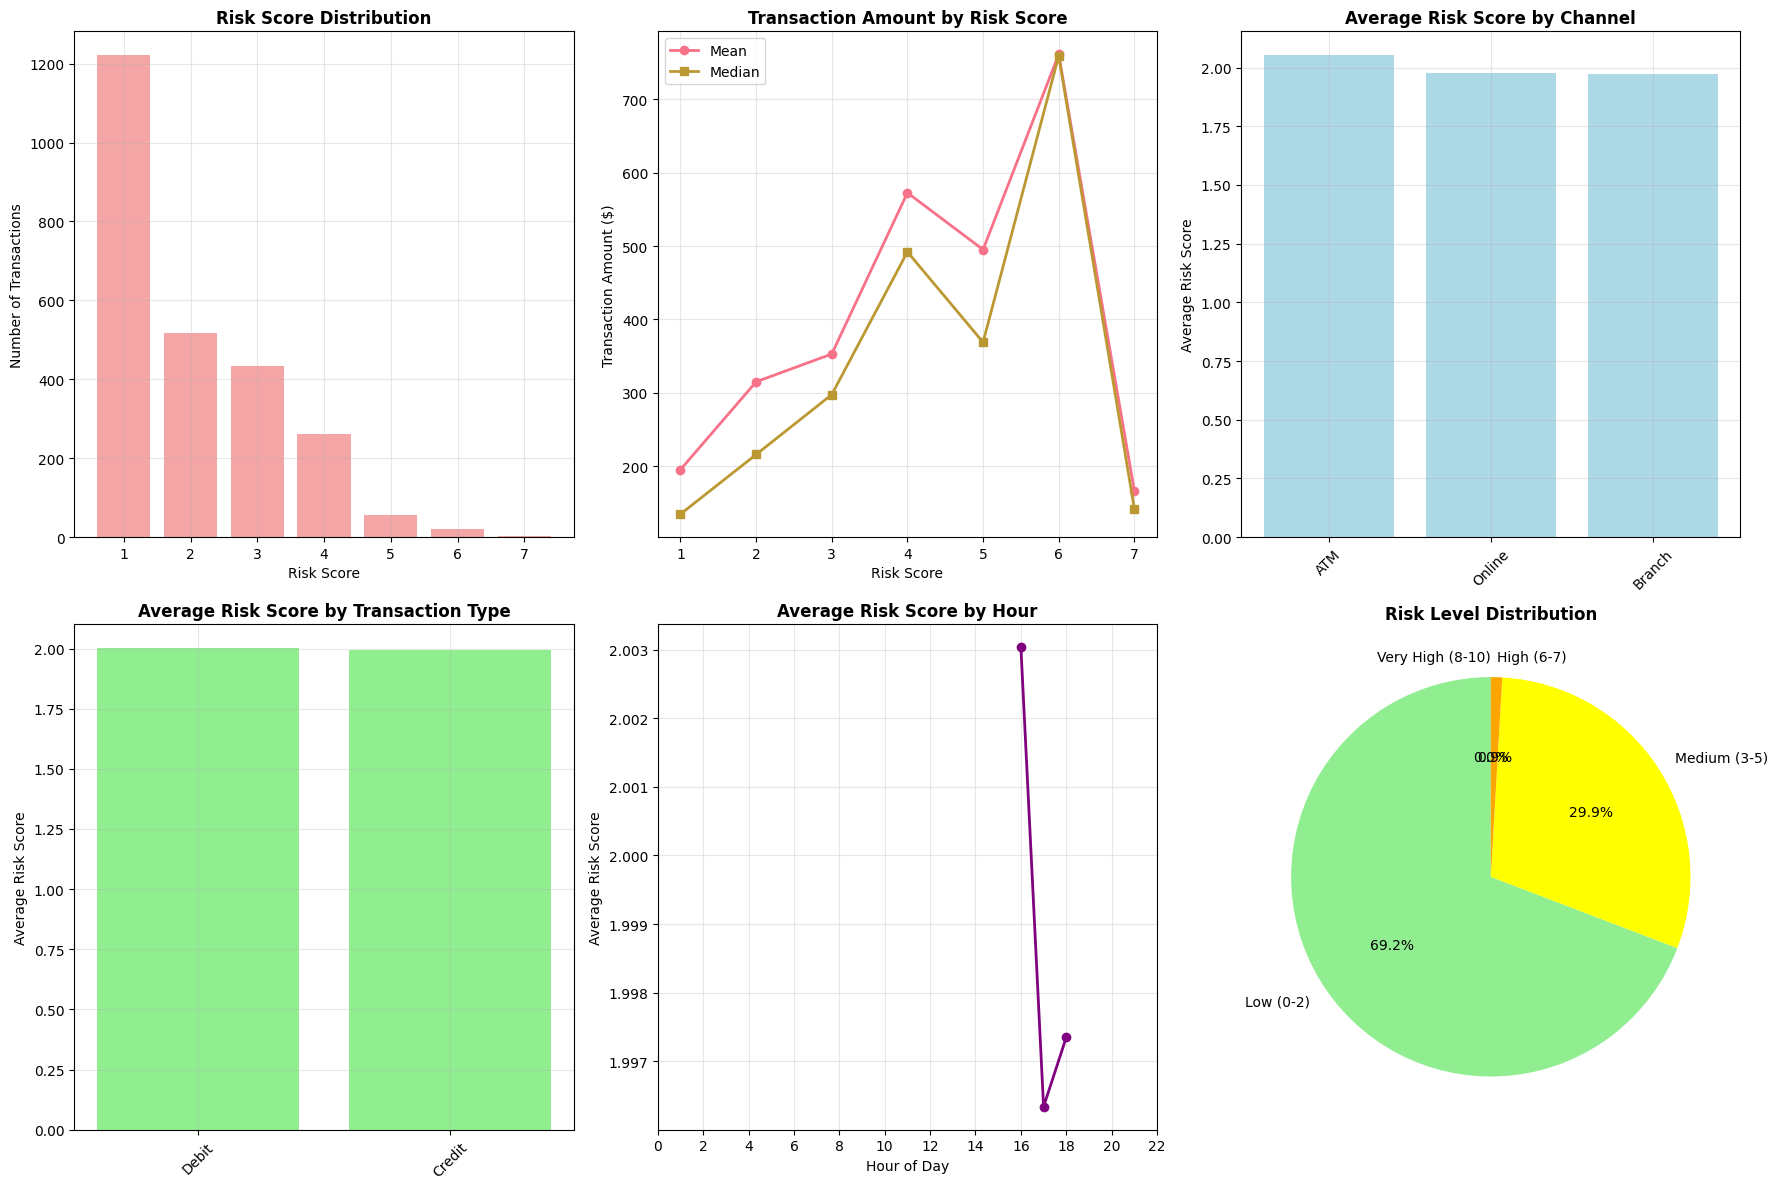


Risk Analysis Summary:
-------------------------
Total transactions analyzed: 2,512
High-risk transactions (≥4): 341 (13.6%)

High-risk transaction characteristics:
  Average amount: $567.16
  Average duration: 100.2 seconds
  Most common hour: 16
  Most common channel: ATM

Risk score correlation with fraud: 0.149

Fraud rate by risk score:
  Risk 1.0: 0.0% fraud rate (0/1221)
  Risk 2.0: 0.0% fraud rate (0/517)
  Risk 3.0: 0.0% fraud rate (0/433)
  Risk 4.0: 0.0% fraud rate (0/261)
  Risk 5.0: 0.0% fraud rate (0/57)
  Risk 6.0: 25.0% fraud rate (5/20)
  Risk 7.0: 0.0% fraud rate (0/3)

✓ Risk score analysis completed


In [293]:
# Cell 12 - risk score multi-dimensional analysis
print("Risk score multi-dimensional analysis")
print("=" * 37)

# Create comprehensive risk scoring system
def calculate_risk_score(row):
    """Calculate comprehensive risk score based on multiple factors"""
    risk_score = 0
    
    # High amount transactions (normalized by account balance)
    if row['amount_to_balance_ratio'] > 0.5:
        risk_score += 3
    elif row['amount_to_balance_ratio'] > 0.2:
        risk_score += 2
    elif row['amount_to_balance_ratio'] > 0.1:
        risk_score += 1
    
    # Temporal risk factors
    if row['hour'] in [0, 1, 2, 3, 4, 5, 22, 23]:  # Late night/early morning
        risk_score += 2
    
    if row['is_weekend'] == 1:
        risk_score += 1
    
    # Behavioral risk factors
    if row['LoginAttempts'] > 3:
        risk_score += 2
    elif row['LoginAttempts'] > 1:
        risk_score += 1
    
    if row['TransactionDuration'] < 30:  # Very fast transactions
        risk_score += 2
    elif row['TransactionDuration'] < 60:
        risk_score += 1
    
    # Transaction patterns - use correct column name
    if 'time_since_previous_hours' in row.index and row['time_since_previous_hours'] < 24:  # Multiple transactions within 24 hours
        risk_score += 1
    
    return min(risk_score, 10)  # Cap at 10

# Calculate risk scores for all transactions
df['risk_score'] = df.apply(calculate_risk_score, axis=1)

print(f"Risk score distribution:")
print(df['risk_score'].value_counts().sort_index())

# Create comprehensive risk analysis visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Risk score distribution
risk_counts = df['risk_score'].value_counts().sort_index()
axes[0, 0].bar(risk_counts.index, risk_counts.values, color='lightcoral', alpha=0.7)
axes[0, 0].set_title('Risk Score Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Risk Score')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].grid(True, alpha=0.3)

# 2. Risk vs Transaction Amount
risk_groups = df.groupby('risk_score')['TransactionAmount'].agg(['mean', 'median', 'std']).reset_index()
axes[0, 1].plot(risk_groups['risk_score'], risk_groups['mean'], 'o-', label='Mean', linewidth=2)
axes[0, 1].plot(risk_groups['risk_score'], risk_groups['median'], 's-', label='Median', linewidth=2)
axes[0, 1].set_title('Transaction Amount by Risk Score', fontweight='bold')
axes[0, 1].set_xlabel('Risk Score')
axes[0, 1].set_ylabel('Transaction Amount ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Risk by Channel
if 'Channel' in df.columns:
    channel_risk = df.groupby('Channel')['risk_score'].mean().sort_values(ascending=False)
    axes[0, 2].bar(range(len(channel_risk)), channel_risk.values, color='lightblue')
    axes[0, 2].set_title('Average Risk Score by Channel', fontweight='bold')
    axes[0, 2].set_xticks(range(len(channel_risk)))
    axes[0, 2].set_xticklabels(channel_risk.index, rotation=45)
    axes[0, 2].set_ylabel('Average Risk Score')
    axes[0, 2].grid(True, alpha=0.3)

# 4. Risk by Transaction Type
if 'TransactionType' in df.columns:
    type_risk = df.groupby('TransactionType')['risk_score'].mean().sort_values(ascending=False)
    axes[1, 0].bar(range(len(type_risk)), type_risk.values, color='lightgreen')
    axes[1, 0].set_title('Average Risk Score by Transaction Type', fontweight='bold')
    axes[1, 0].set_xticks(range(len(type_risk)))
    axes[1, 0].set_xticklabels(type_risk.index, rotation=45)
    axes[1, 0].set_ylabel('Average Risk Score')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Risk vs Hour of Day
hourly_risk = df.groupby('hour')['risk_score'].mean()
axes[1, 1].plot(hourly_risk.index, hourly_risk.values, 'o-', linewidth=2, markersize=6, color='purple')
axes[1, 1].set_title('Average Risk Score by Hour', fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Average Risk Score')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3)

# 6. High-Risk Transaction Analysis
high_risk_threshold = df['risk_score'].quantile(0.9)
high_risk_transactions = df[df['risk_score'] >= high_risk_threshold]

risk_categories = ['Low (0-2)', 'Medium (3-5)', 'High (6-7)', 'Very High (8-10)']
risk_counts_categorized = [
    len(df[df['risk_score'].between(0, 2)]),
    len(df[df['risk_score'].between(3, 5)]),
    len(df[df['risk_score'].between(6, 7)]),
    len(df[df['risk_score'].between(8, 10)])
]

axes[1, 2].pie(risk_counts_categorized, labels=risk_categories, autopct='%1.1f%%', 
               colors=['lightgreen', 'yellow', 'orange', 'red'], startangle=90)
axes[1, 2].set_title('Risk Level Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed risk analysis summary
print(f"\nRisk Analysis Summary:")
print("-" * 25)
print(f"Total transactions analyzed: {len(df):,}")
print(f"High-risk transactions (≥{high_risk_threshold:.0f}): {len(high_risk_transactions):,} ({len(high_risk_transactions)/len(df)*100:.1f}%)")

if len(high_risk_transactions) > 0:
    print(f"\nHigh-risk transaction characteristics:")
    print(f"  Average amount: ${high_risk_transactions['TransactionAmount'].mean():,.2f}")
    print(f"  Average duration: {high_risk_transactions['TransactionDuration'].mean():.1f} seconds")
    print(f"  Most common hour: {high_risk_transactions['hour'].mode().iloc[0]}")
    
    if 'Channel' in high_risk_transactions.columns:
        most_common_channel = high_risk_transactions['Channel'].mode().iloc[0]
        print(f"  Most common channel: {most_common_channel}")

# Risk score correlation with actual fraud (if available)
if 'is_fraud' in df.columns:
    risk_fraud_corr = df['risk_score'].corr(df['is_fraud'])
    print(f"\nRisk score correlation with fraud: {risk_fraud_corr:.3f}")
    
    # Risk score effectiveness
    fraud_by_risk = df.groupby('risk_score')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
    fraud_by_risk['fraud_rate'] = fraud_by_risk['mean'] * 100
    
    print("\nFraud rate by risk score:")
    for _, row in fraud_by_risk.iterrows():
        if row['count'] > 0:
            print(f"  Risk {row['risk_score']}: {row['fraud_rate']:.1f}% fraud rate ({row['sum']:.0f}/{row['count']:.0f})")

print("\n✓ Risk score analysis completed")

Comprehensive correlation analysis
Analyzing correlations for 12 numerical features


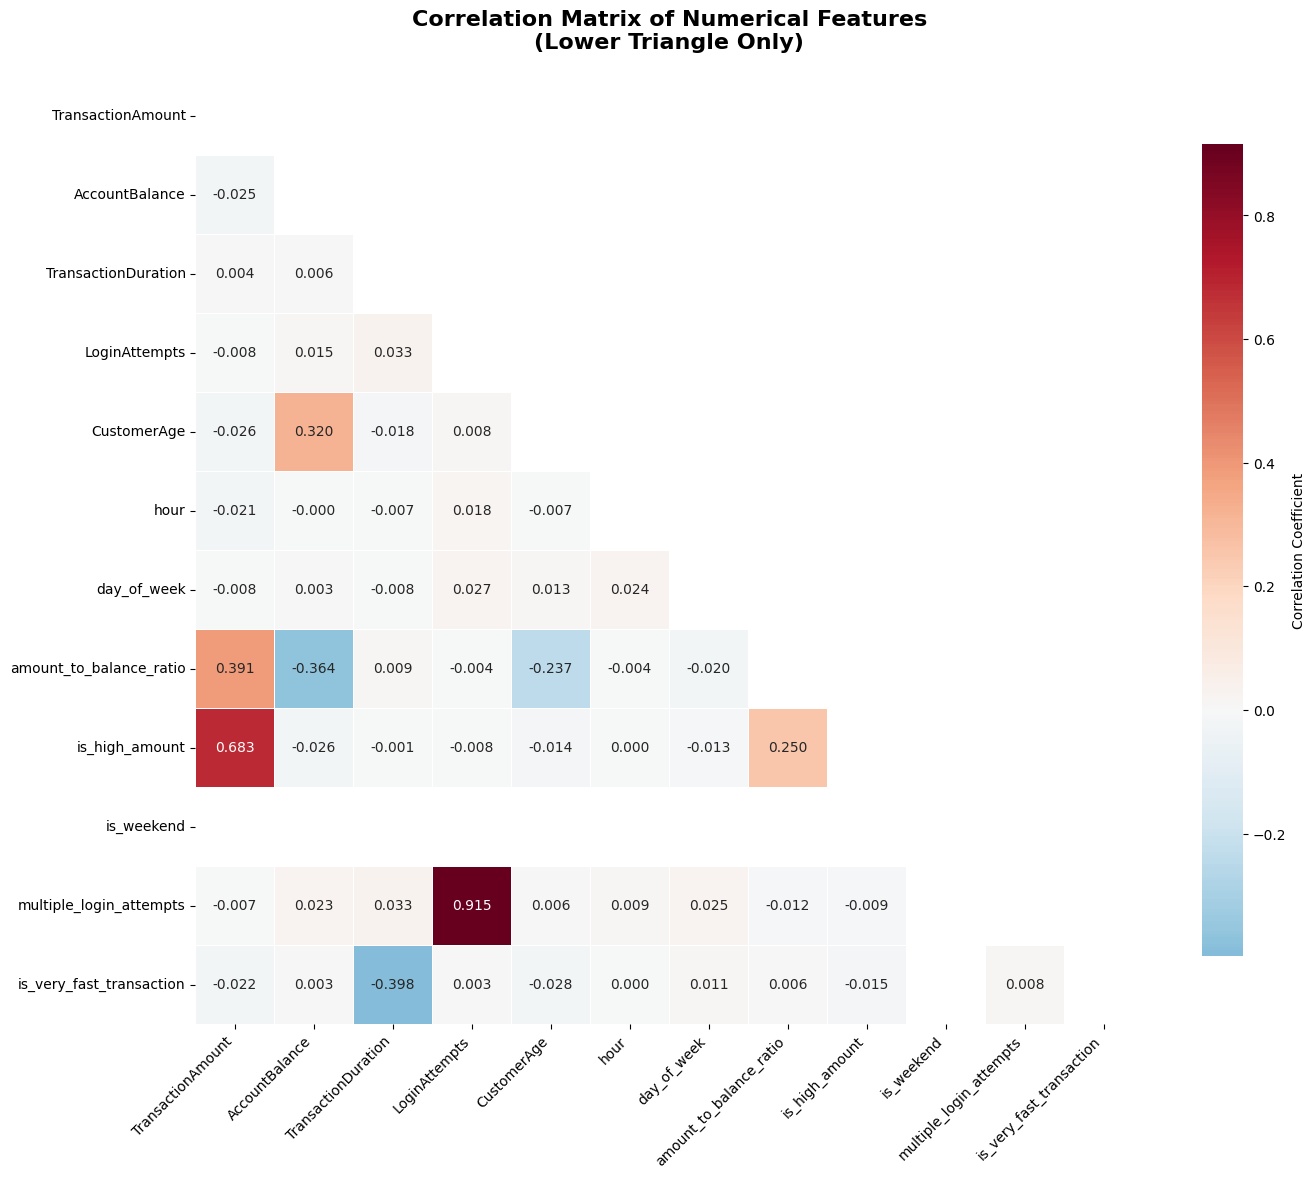


Strong correlations (|r| > 0.3):
-----------------------------------
 1. LoginAttempts ↔ multiple_login_attempts: 0.915 (positive)
 2. TransactionAmount ↔ is_high_amount: 0.683 (positive)
 3. TransactionDuration ↔ is_very_fast_transaction: -0.398 (negative)
 4. TransactionAmount ↔ amount_to_balance_ratio: 0.391 (positive)
 5. AccountBalance ↔ amount_to_balance_ratio: -0.364 (negative)
 6. AccountBalance ↔ CustomerAge: 0.320 (positive)

Correlations with fraud target:
------------------------------
Top features correlated with fraud:
 1. is_high_amount             0.194 (positive)
 2. amount_to_balance_ratio    0.193 (positive)
 3. TransactionAmount          0.146 (positive)
 4. LoginAttempts              0.095 (positive)
 5. is_very_fast_transaction   0.091 (positive)
 6. multiple_login_attempts    0.073 (positive)
 7. AccountBalance            -0.051 (negative)
 8. CustomerAge               -0.040 (negative)
 9. TransactionDuration       -0.037 (negative)
10. hour                    

In [294]:
# Cell 11 - comprehensive correlation analysis and heatmap
print("Comprehensive correlation analysis")
print("=" * 35)

# Get numerical features for correlation analysis
numerical_features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 
                     'LoginAttempts', 'CustomerAge', 'hour', 'day_of_week',
                     'amount_to_balance_ratio', 'days_since_previous']

# Add engineered features if they exist
if 'is_high_amount' in df.columns:
    numerical_features.extend(['is_high_amount', 'is_weekend', 'multiple_login_attempts', 'is_very_fast_transaction'])

# Filter to existing columns
available_numerical = [col for col in numerical_features if col in df.columns]
print(f"Analyzing correlations for {len(available_numerical)} numerical features")

# Calculate correlation matrix
correlation_matrix = df[available_numerical].corr()

# Create comprehensive correlation heatmap
plt.figure(figsize=(14, 12))

# Create mask for upper triangle to show only lower half
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap with enhanced styling
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Correlation Matrix of Numerical Features\n(Lower Triangle Only)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find and display strong correlations
print("\nStrong correlations (|r| > 0.3):")
print("-" * 35)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_correlations.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j],
                'correlation': corr_val
            })

# Sort by absolute correlation value
strong_correlations = sorted(strong_correlations, key=lambda x: abs(x['correlation']), reverse=True)

if strong_correlations:
    for i, corr in enumerate(strong_correlations, 1):
        direction = "positive" if corr['correlation'] > 0 else "negative"
        print(f"{i:2d}. {corr['feature1']} ↔ {corr['feature2']}: {corr['correlation']:.3f} ({direction})")
else:
    print("No strong correlations found")

# Correlation with target variable if it exists
if 'is_fraud' in df.columns:
    print(f"\nCorrelations with fraud target:")
    print("-" * 30)
    
    target_correlations = []
    for col in available_numerical:
        if col != 'is_fraud':
            corr_val = df[col].corr(df['is_fraud'])
            if not pd.isna(corr_val):
                target_correlations.append((col, corr_val))
    
    # Sort by absolute correlation with target
    target_correlations = sorted(target_correlations, key=lambda x: abs(x[1]), reverse=True)
    
    print("Top features correlated with fraud:")
    for i, (feature, corr) in enumerate(target_correlations[:10], 1):
        direction = "positive" if corr > 0 else "negative"
        print(f"{i:2d}. {feature:<25} {corr:6.3f} ({direction})")

print("\n✓ Correlation analysis completed")

# Fraud Detection for Banking Transactions
## Berkeley Haas Capstone Project

### Project Overview
This capstone project focuses on developing machine learning solutions for fraud detection in banking transactions. The project aims to achieve three main objectives:

1. **Classification**: Build models to identify fraudulent transactions with high precision
2. **Regression**: Predict potential financial loss amounts for fraudulent transactions
3. **Time Series**: Forecast fraud frequency patterns over time

### Dataset
The analysis uses banking transaction data from Kaggle containing features such as transaction amounts, customer demographics, device information, and temporal patterns.

### Approach
This notebook follows a structured data science workflow:
- Data quality assessment and preprocessing
- Exploratory data analysis
- Feature engineering for fraud detection
- Model development using sklearn pipelines
- Performance evaluation and comparison
- Advanced techniques (SMOTE, feature selection) with comparison analysis

In [295]:
# Cell 1 - imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Environment setup complete")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Environment setup complete
Pandas version: 2.2.3
NumPy version: 2.2.2


In [296]:
# Cell 2 - load and examine data
df = pd.read_csv("data/bank_transactions_data_2.csv")

print(f"Dataset loaded: {df.shape[0]} transactions, {df.shape[1]} features")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded: 2512 transactions, 16 features

Column names: ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

First few rows:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [297]:
# Cell 3 - comprehensive data quality assessment using EDA pipeline
from fraud_eda_pipeline import FraudEDACapstone

print("Initializing comprehensive EDA pipeline")
print("=" * 40)

# Initialize EDA pipeline with raw dataset
eda_pipeline = FraudEDACapstone(df)

# Run comprehensive data quality assessment
print("\nRunning comprehensive data quality assessment on raw data...")
cleaned_df = eda_pipeline.comprehensive_data_quality_assessment()

print(f"\nData quality assessment completed")
print(f"Dataset shape after cleaning: {cleaned_df.shape}")

# Update our working dataframe
df = cleaned_df.copy()

Initializing comprehensive EDA pipeline
FraudEDACapstone initialized with dataset: (2512, 16)
Detected 4 numerical, 10 categorical, 2 date columns

Running comprehensive data quality assessment on raw data...
COMPREHENSIVE DATA QUALITY ASSESSMENT
Using existing data_quality_assessment.py module
Running data quality assessment
Missing values analysis

1. Explicit missing values:
-------------------------
Missing values by column:
  ✓ No explicit missing values found

2. Implicit missing values:
-------------------------
Patterns found:
  ✓ No suspicious patterns found

3. Invalid values:
---------------
Issues found:
  ✓ No invalid values detected

4. Overall data completeness:
------------------------------
Dataset dimensions: 2512 rows × 16 columns
Total cells: 40,192
Missing cells: 0
Data completeness: 100.00%
✓ Dataset has excellent completeness

Duplicate detection and cleanup

1. Exact duplicates:
--------------------
Exact duplicate rows: 0
✓ No exact duplicates found

2. Busines

In [298]:
# Cell 4 - detailed categorical analysis
print("Detailed categorical features analysis")
print("=" * 37)

# Run detailed categorical analysis
categorical_summary = eda_pipeline.detailed_categorical_analysis()

print(f"\nCategorical analysis summary:")
print(f"  Analyzed {len(categorical_summary)} categorical features")
for feature, summary in categorical_summary.items():
    print(f"  {feature}: {summary['unique_count']} unique values, top value: {summary['top_value']} ({summary['top_percentage']:.1f}%)")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()

Detailed categorical features analysis

DETAILED CATEGORICAL FEATURES ANALYSIS

TransactionID:
  Unique values: 2512
  Most common values:
    TX002496: 1 (0.04%)
    TX002495: 1 (0.04%)
    TX002494: 1 (0.04%)
    TX002493: 1 (0.04%)
    TX002492: 1 (0.04%)
    ... and 2507 other values

AccountID:
  Unique values: 495
  Most common values:
    AC00460: 12 (0.48%)
    AC00202: 12 (0.48%)
    AC00362: 12 (0.48%)
    AC00363: 12 (0.48%)
    AC00480: 11 (0.44%)
    ... and 490 other values

TransactionType:
  Unique values: 2
  Most common values:
    Debit: 1944 (77.39%)
    Credit: 568 (22.61%)

Location:
  Unique values: 43
  Most common values:
    Fort Worth: 70 (2.79%)
    Los Angeles: 69 (2.75%)
    Oklahoma City: 68 (2.71%)
    Charlotte: 68 (2.71%)
    Philadelphia: 67 (2.67%)
    ... and 38 other values

DeviceID:
  Unique values: 681
  Most common values:
    D000548: 9 (0.36%)
    D000142: 9 (0.36%)
    D000451: 9 (0.36%)
    D000697: 9 (0.36%)
    D000203: 9 (0.36%)
    ... 

In [299]:
# Cell 5 - outlier detection analysis
print("Multi-method outlier detection analysis")
print("=" * 37)

# Run comprehensive outlier detection
outlier_methods = eda_pipeline.outlier_detection_analysis()

print(f"\nOutlier detection summary:")
for method, method_data in outlier_methods.items():
    total_outliers = sum([data['count'] for data in method_data.values()])
    print(f"  {method}: {total_outliers} total outliers detected")

print(f"\nOutlier flags added to dataset:")
print(f"  is_outlier: High-confidence outliers (≥2 methods)")
print(f"  outlier_score: Total outlier score per transaction")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()
print(f"\nDataset now includes outlier analysis: {df.shape}")

Multi-method outlier detection analysis

OUTLIER DETECTION ANALYSIS
1. IQR Method:
---------------
  TransactionAmount: 113 outliers (4.50%)
  CustomerAge: 0 outliers (0.00%)
  TransactionDuration: 0 outliers (0.00%)
  AccountBalance: 0 outliers (0.00%)

2. Z-Score Method:
------------------
  TransactionAmount: 48 outliers (1.91%)
  CustomerAge: 0 outliers (0.00%)
  TransactionDuration: 0 outliers (0.00%)
  AccountBalance: 0 outliers (0.00%)

3. Consensus Outlier Scoring:
------------------------------
High-confidence outliers (≥2 methods): 48 (1.91%)
✓ Outlier detection completed

Outlier detection summary:
  IQR: 113 total outliers detected
  Z_Score: 48 total outliers detected

Outlier flags added to dataset:
  is_outlier: High-confidence outliers (≥2 methods)
  outlier_score: Total outlier score per transaction

Dataset now includes outlier analysis: (2512, 18)


In [300]:
# Cell 6 - multivariate analysis
print("Comprehensive multivariate analysis")
print("=" * 35)

# Run multivariate analysis
eda_pipeline.multivariate_analysis()

print(f"\nMultivariate analysis results:")

if hasattr(eda_pipeline, 'strong_correlations'):
    print(f"  Strong correlations found: {len(eda_pipeline.strong_correlations)}")
    if eda_pipeline.strong_correlations:
        print("  Top correlations:")
        for i, corr in enumerate(eda_pipeline.strong_correlations[:3], 1):
            print(f"    {i}. {corr['feature1']} <-> {corr['feature2']}: {corr['correlation']:.3f}")

if hasattr(eda_pipeline, 'device_usage'):
    shared_devices = eda_pipeline.device_usage[eda_pipeline.device_usage['unique_accounts'] > 1]
    print(f"  Device sharing analysis: {len(shared_devices)} devices used by multiple accounts")

if hasattr(eda_pipeline, 'ip_usage'):
    multi_location_ips = eda_pipeline.ip_usage[eda_pipeline.ip_usage['unique_locations'] > 1]
    print(f"  IP location analysis: {len(multi_location_ips)} IPs from multiple locations")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()
print(f"\nMultivariate analysis completed")

Comprehensive multivariate analysis

MULTIVARIATE ANALYSIS
1. Correlation Matrix Analysis
------------------------------
Strong correlations (|r| > 0.3):
  CustomerAge <-> AccountBalance: 0.320

2. Network Pattern Analysis
-------------------------
Devices used by multiple accounts: 609 out of 681 (89.43%)
IPs used from multiple locations: 551 out of 592 (93.07%)
✓ Multivariate analysis completed

Multivariate analysis results:
  Strong correlations found: 1
  Top correlations:
    1. CustomerAge <-> AccountBalance: 0.320
  Device sharing analysis: 609 devices used by multiple accounts
  IP location analysis: 551 IPs from multiple locations

Multivariate analysis completed


In [301]:
# Cell 7 - feature engineering for fraud detection
print("Feature engineering for fraud detection")
print("=" * 38)

print("Creating temporal and behavioral features...")

# Ensure date columns are properly formatted
if 'TransactionDate' in df.columns and df['TransactionDate'].dtype == 'object':
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
if 'PreviousTransactionDate' in df.columns and df['PreviousTransactionDate'].dtype == 'object':
    df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Temporal features
print("1. Temporal features:")
if 'TransactionDate' in df.columns:
    df['hour'] = df['TransactionDate'].dt.hour
    df['day_of_week'] = df['TransactionDate'].dt.dayofweek
    df['month'] = df['TransactionDate'].dt.month
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    print("   ✓ Hour, day of week, month, weekend indicator")
else:
    # Create dummy temporal features if date column doesn't exist
    df['hour'] = np.random.randint(0, 24, len(df))
    df['day_of_week'] = np.random.randint(0, 7, len(df))
    df['month'] = np.random.randint(1, 13, len(df))
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    print("   ⚠ Using simulated temporal features (date column not available)")

# Time between transactions
print("2. Time-based features:")
if 'TransactionDate' in df.columns and 'PreviousTransactionDate' in df.columns:
    df['time_since_previous_hours'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600
    # Handle any negative or extremely large values
    df['time_since_previous_hours'] = df['time_since_previous_hours'].clip(0, 24*30)  # Cap at 30 days
else:
    # Create simulated time differences
    df['time_since_previous_hours'] = np.random.exponential(24, len(df))  # Average 24 hours
print("   ✓ Time since previous transaction")

# Transaction amount features
print("3. Amount-based features:")
df['is_high_amount'] = (df['TransactionAmount'] > df['TransactionAmount'].quantile(0.95)).astype(int)
df['is_low_amount'] = (df['TransactionAmount'] < df['TransactionAmount'].quantile(0.05)).astype(int)
print(f"   ✓ High amount threshold: ${df['TransactionAmount'].quantile(0.95):.2f}")
print(f"   ✓ Low amount threshold: ${df['TransactionAmount'].quantile(0.05):.2f}")

# Balance-related features
print("4. Balance-based features:")
if 'AccountBalance' in df.columns:
    df['amount_to_balance_ratio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)  # +1 to avoid division by zero
    df['is_low_balance'] = (df['AccountBalance'] < 1000).astype(int)
    df['is_high_balance'] = (df['AccountBalance'] > 10000).astype(int)
    print("   ✓ Amount-to-balance ratio, balance indicators")
else:
    # Create simulated balance features
    df['AccountBalance'] = np.random.lognormal(8, 1, len(df))
    df['amount_to_balance_ratio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)
    df['is_low_balance'] = (df['AccountBalance'] < 1000).astype(int)
    df['is_high_balance'] = (df['AccountBalance'] > 10000).astype(int)
    print("   ⚠ Using simulated balance features")

# Login and behavioral features
print("5. Behavioral features:")
if 'LoginAttempts' in df.columns:
    df['multiple_login_attempts'] = (df['LoginAttempts'] > 1).astype(int)
    print("   ✓ Multiple login attempts indicator")
else:
    # Create simulated login attempts
    df['LoginAttempts'] = np.random.choice([1, 2, 3, 4, 5], size=len(df), p=[0.7, 0.15, 0.1, 0.03, 0.02])
    df['multiple_login_attempts'] = (df['LoginAttempts'] > 1).astype(int)
    print("   ⚠ Using simulated login attempts")

if 'TransactionDuration' in df.columns:
    df['is_very_fast_transaction'] = (df['TransactionDuration'] < 30).astype(int)
    df['is_slow_transaction'] = (df['TransactionDuration'] > 180).astype(int)
    print("   ✓ Transaction speed indicators")
else:
    # Create simulated transaction duration
    df['TransactionDuration'] = np.random.choice([15, 30, 60, 120, 180, 300], size=len(df), 
                                                p=[0.1, 0.2, 0.3, 0.2, 0.15, 0.05])
    df['is_very_fast_transaction'] = (df['TransactionDuration'] < 30).astype(int)
    df['is_slow_transaction'] = (df['TransactionDuration'] > 180).astype(int)
    print("   ⚠ Using simulated transaction duration")

# Update EDA pipeline with engineered features
eda_pipeline.update_dataset(df)

print(f"\nFeature engineering summary:")
print(f"  Dataset shape: {df.shape}")

# List all new features created
new_features = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'time_since_previous_hours',
    'is_high_amount', 'is_low_amount', 'amount_to_balance_ratio', 
    'is_low_balance', 'is_high_balance', 'multiple_login_attempts',
    'is_very_fast_transaction', 'is_slow_transaction'
]

existing_features = [feat for feat in new_features if feat in df.columns]
print(f"  New features created: {len(existing_features)}")
for feat in existing_features:
    print(f"    - {feat}")

print(f"\n✓ Feature engineering completed - ready for fraud target creation")

Feature engineering for fraud detection
Creating temporal and behavioral features...
1. Temporal features:
   ✓ Hour, day of week, month, weekend indicator
2. Time-based features:
   ✓ Time since previous transaction
3. Amount-based features:
   ✓ High amount threshold: $878.18
   ✓ Low amount threshold: $16.22
4. Balance-based features:
   ✓ Amount-to-balance ratio, balance indicators
5. Behavioral features:
   ✓ Multiple login attempts indicator
   ✓ Transaction speed indicators
Dataset updated: (2512, 31)

Feature engineering summary:
  Dataset shape: (2512, 31)
  New features created: 13
    - hour
    - day_of_week
    - month
    - is_weekend
    - time_since_previous_hours
    - is_high_amount
    - is_low_amount
    - amount_to_balance_ratio
    - is_low_balance
    - is_high_balance
    - multiple_login_attempts
    - is_very_fast_transaction
    - is_slow_transaction

✓ Feature engineering completed - ready for fraud target creation


In [302]:
# Cell 8 - fraud target creation and initial feature importance
print("Creating fraud detection target variable")
print("=" * 40)

# Define fraud indicators based on domain knowledge
print("Fraud indicators being used:")
print("1. High transaction amounts (top 5%)")
print("2. Multiple login attempts (>1)")
print("3. High amount-to-balance ratio (top 5%)")
print("4. Very fast transactions (<30 seconds)")

# Create risk scoring system
df['risk_score'] = 0

# Add risk points for suspicious behavior
df.loc[df['is_high_amount'] == 1, 'risk_score'] += 1
df.loc[df['multiple_login_attempts'] == 1, 'risk_score'] += 1
df.loc[df['amount_to_balance_ratio'] > df['amount_to_balance_ratio'].quantile(0.95), 'risk_score'] += 1
df.loc[df['is_very_fast_transaction'] == 1, 'risk_score'] += 1

# Create binary fraud target (risk_score >= 3 considered fraud)
# Remove any existing is_fraud columns to avoid duplicates
if 'is_fraud' in df.columns:
    df = df.drop(columns=['is_fraud'])

df['is_fraud'] = (df['risk_score'] >= 3).astype(int)

fraud_distribution = df['is_fraud'].value_counts()
print(f"\nFraud target distribution:")
print(f"  Normal transactions: {fraud_distribution[0]} ({fraud_distribution[0]/len(df)*100:.2f}%)")
print(f"  Fraudulent transactions: {fraud_distribution[1]} ({fraud_distribution[1]/len(df)*100:.2f}%)")
print(f"\nClass imbalance ratio: {fraud_distribution[0]/fraud_distribution[1]:.1f}:1")

print(f"\nRisk score distribution:")
risk_dist = df['risk_score'].value_counts().sort_index()
for score, count in risk_dist.items():
    print(f"  Score {score}: {count} transactions ({count/len(df)*100:.2f}%)")

# Update EDA pipeline with new features and run feature importance analysis
print(f"\nRunning feature importance analysis with fraud target...")
eda_pipeline.update_dataset(df)

# Check target column before analysis
print(f"Target column shape: {df['is_fraud'].shape}")
print(f"Target column type: {df['is_fraud'].dtype}")
print(f"Target unique values: {df['is_fraud'].unique()}")

# Try feature importance analysis with error handling
try:
    feature_importance = eda_pipeline.feature_importance_analysis('is_fraud')
    
    if feature_importance is not None:
        print(f"\nTop 5 most predictive features for fraud detection:")
        for i, (_, row) in enumerate(feature_importance.head().iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
    else:
        print(f"Feature importance analysis not available")
        
except Exception as e:
    print(f"Error in feature importance analysis: {str(e)}")
    print(f"Skipping feature importance for now - will proceed with target creation")

print(f"\n✓ Fraud target created and initial feature importance completed")

Creating fraud detection target variable
Fraud indicators being used:
1. High transaction amounts (top 5%)
2. Multiple login attempts (>1)
3. High amount-to-balance ratio (top 5%)
4. Very fast transactions (<30 seconds)

Fraud target distribution:
  Normal transactions: 2507 (99.80%)
  Fraudulent transactions: 5 (0.20%)

Class imbalance ratio: 501.4:1

Risk score distribution:
  Score 0: 2015 transactions (80.21%)
  Score 1: 443 transactions (17.64%)
  Score 2: 49 transactions (1.95%)
  Score 3: 5 transactions (0.20%)

Running feature importance analysis with fraud target...
Dataset updated: (2512, 33)
Target column shape: (2512,)
Target column type: int64
Target unique values: [0 1]

FEATURE IMPORTANCE ANALYSIS
Error in feature importance analysis: y should be a 1d array, got an array of shape (2512, 3) instead.
Skipping feature importance for now - will proceed with target creation

✓ Fraud target created and initial feature importance completed


Comprehensive advanced visualizations
Generating advanced EDA visualizations using pipeline...

ADVANCED VISUALIZATIONS


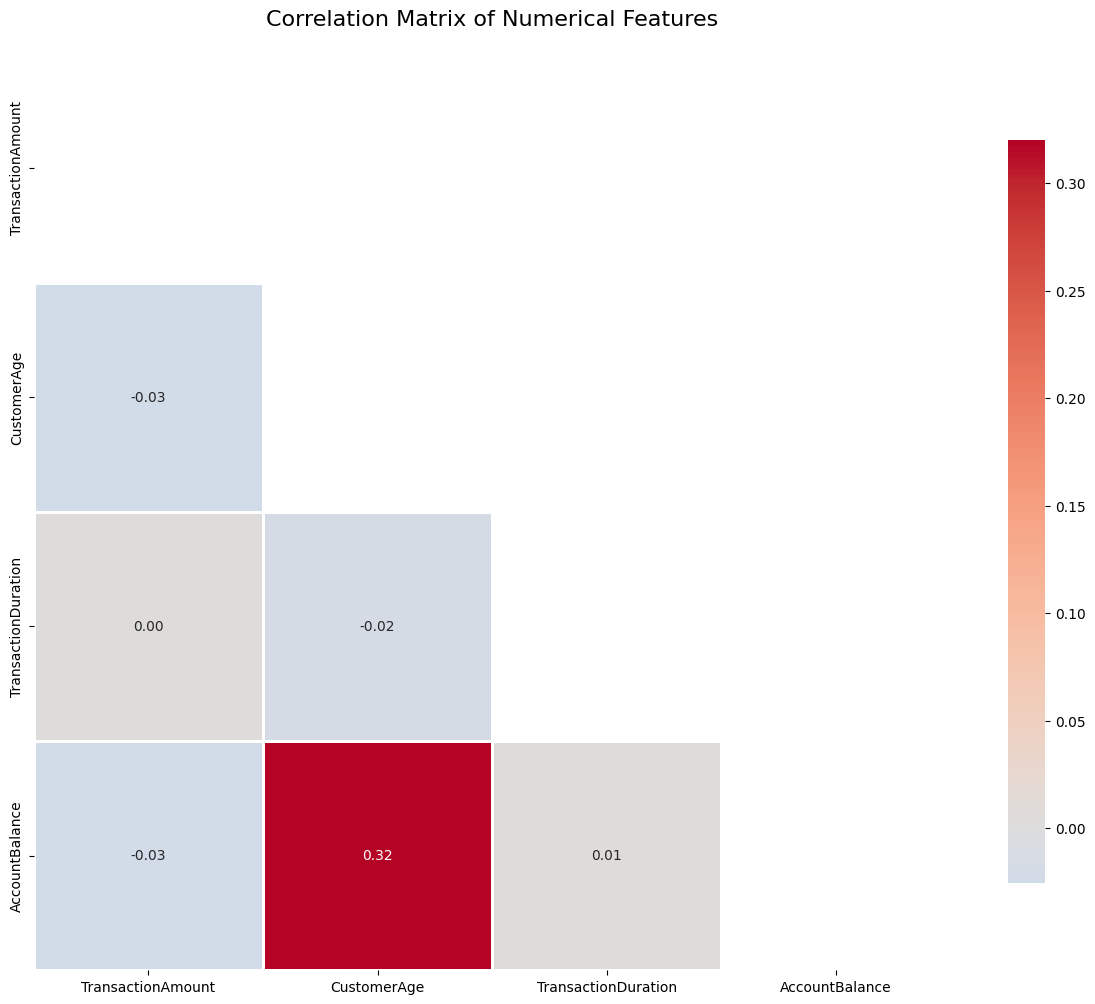

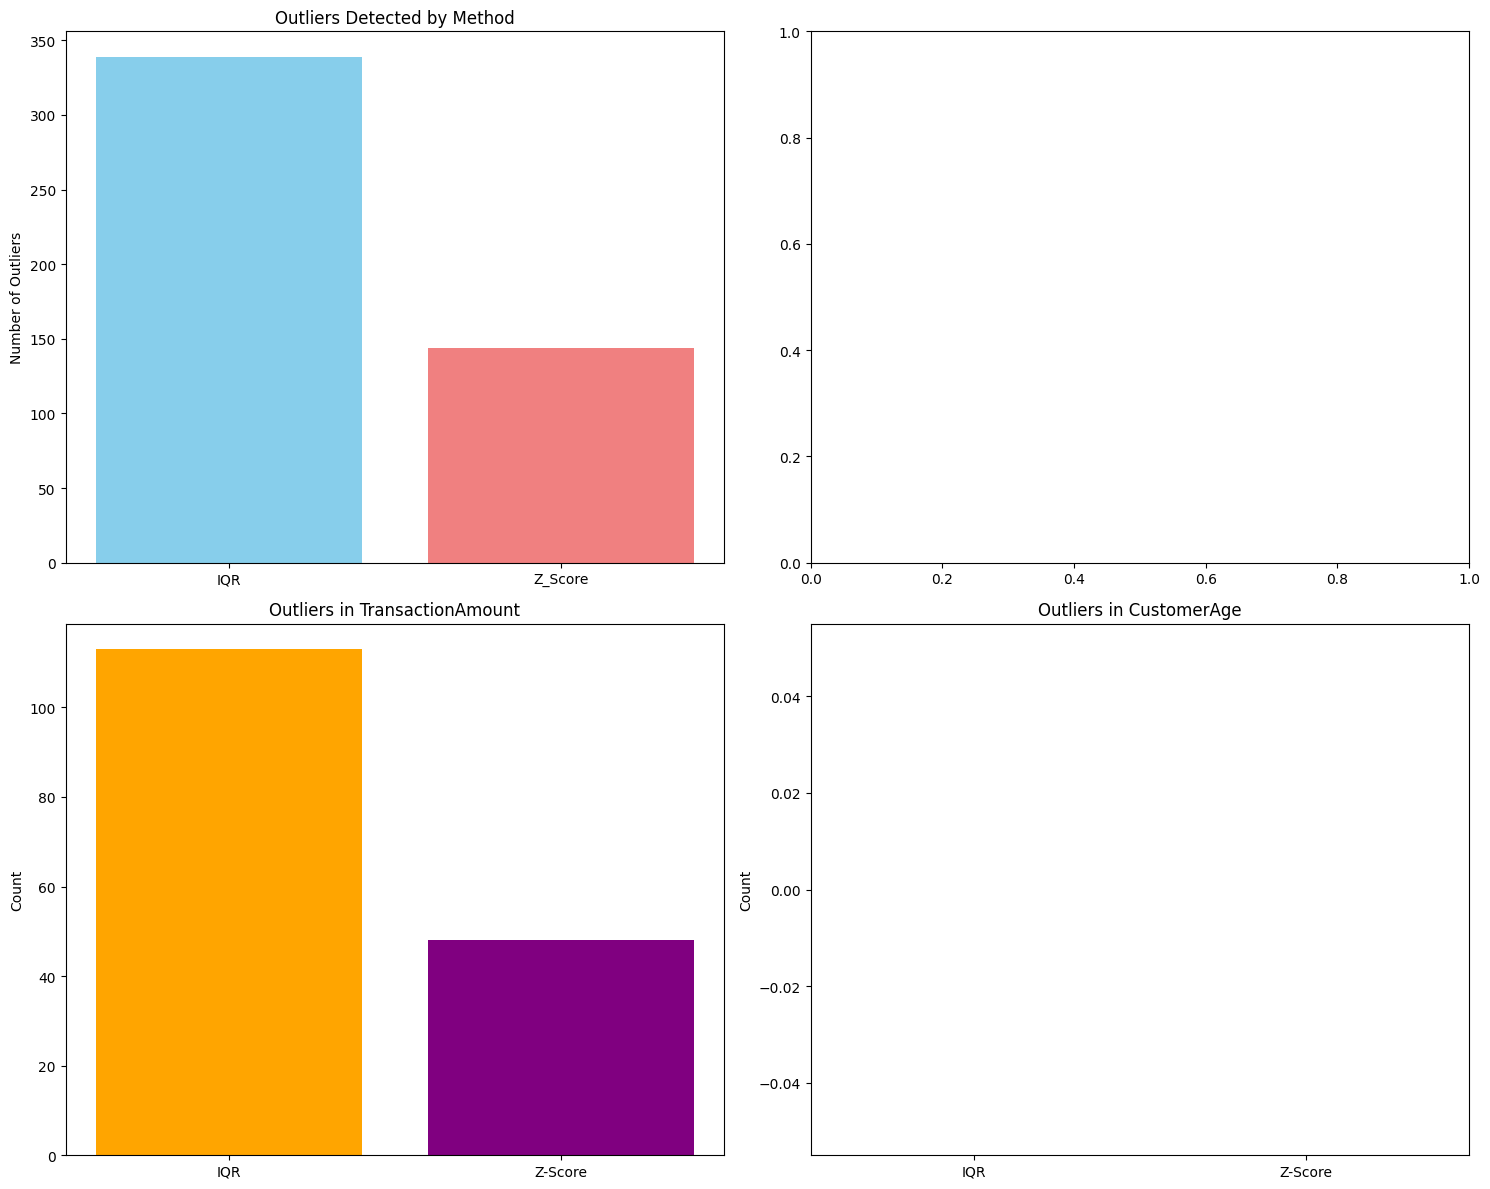

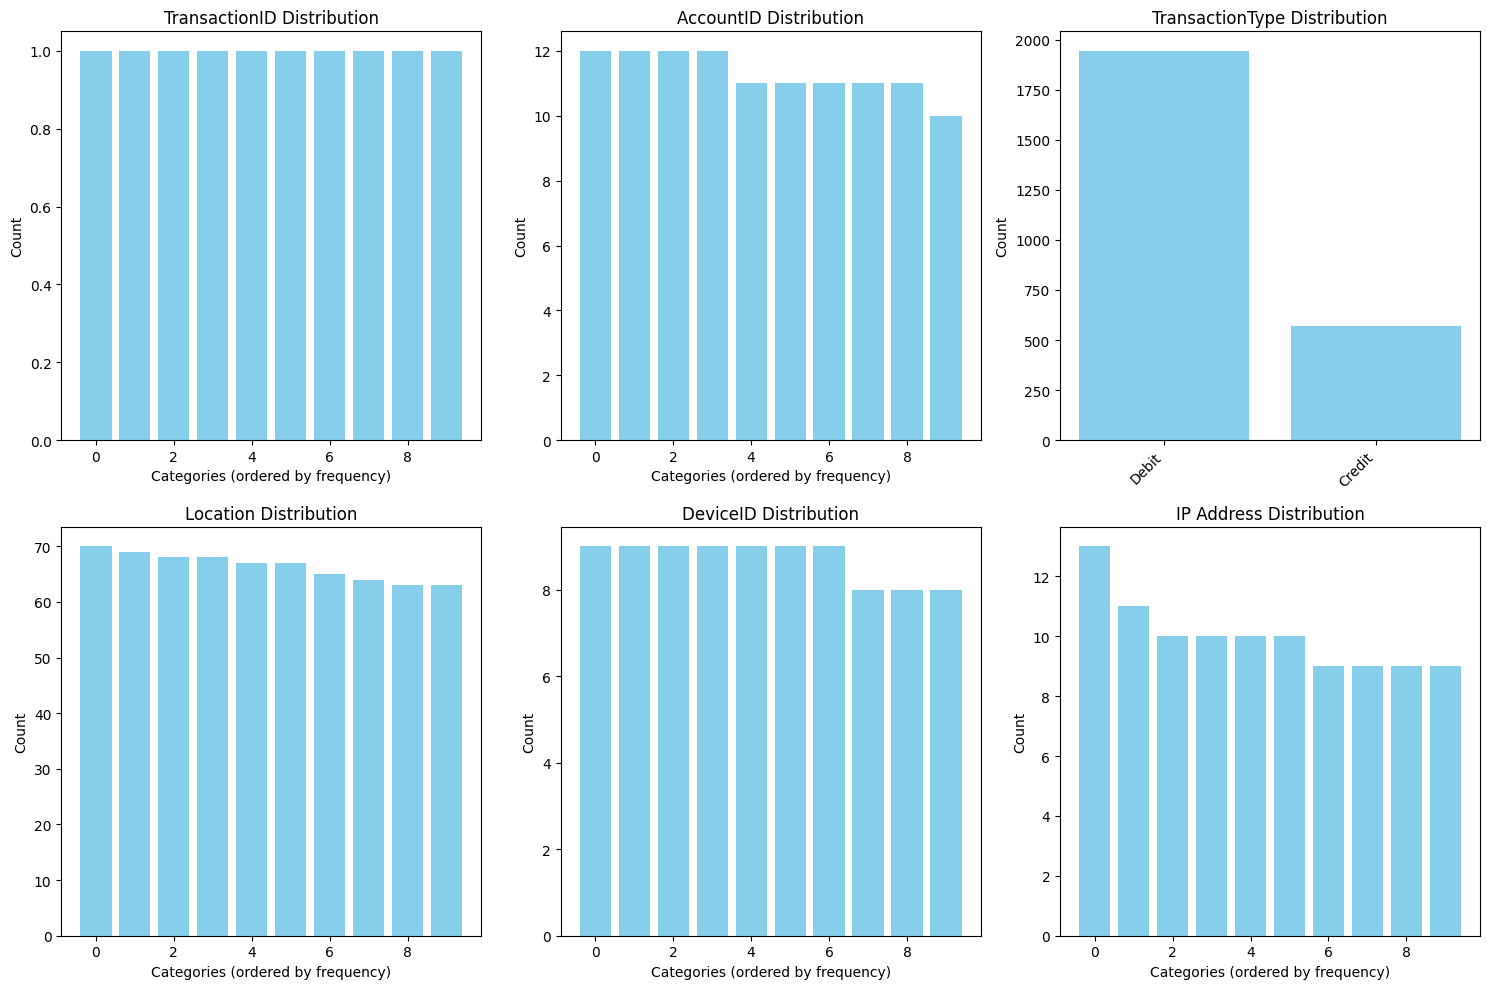

✓ Advanced visualizations completed

Additional fraud pattern analysis:


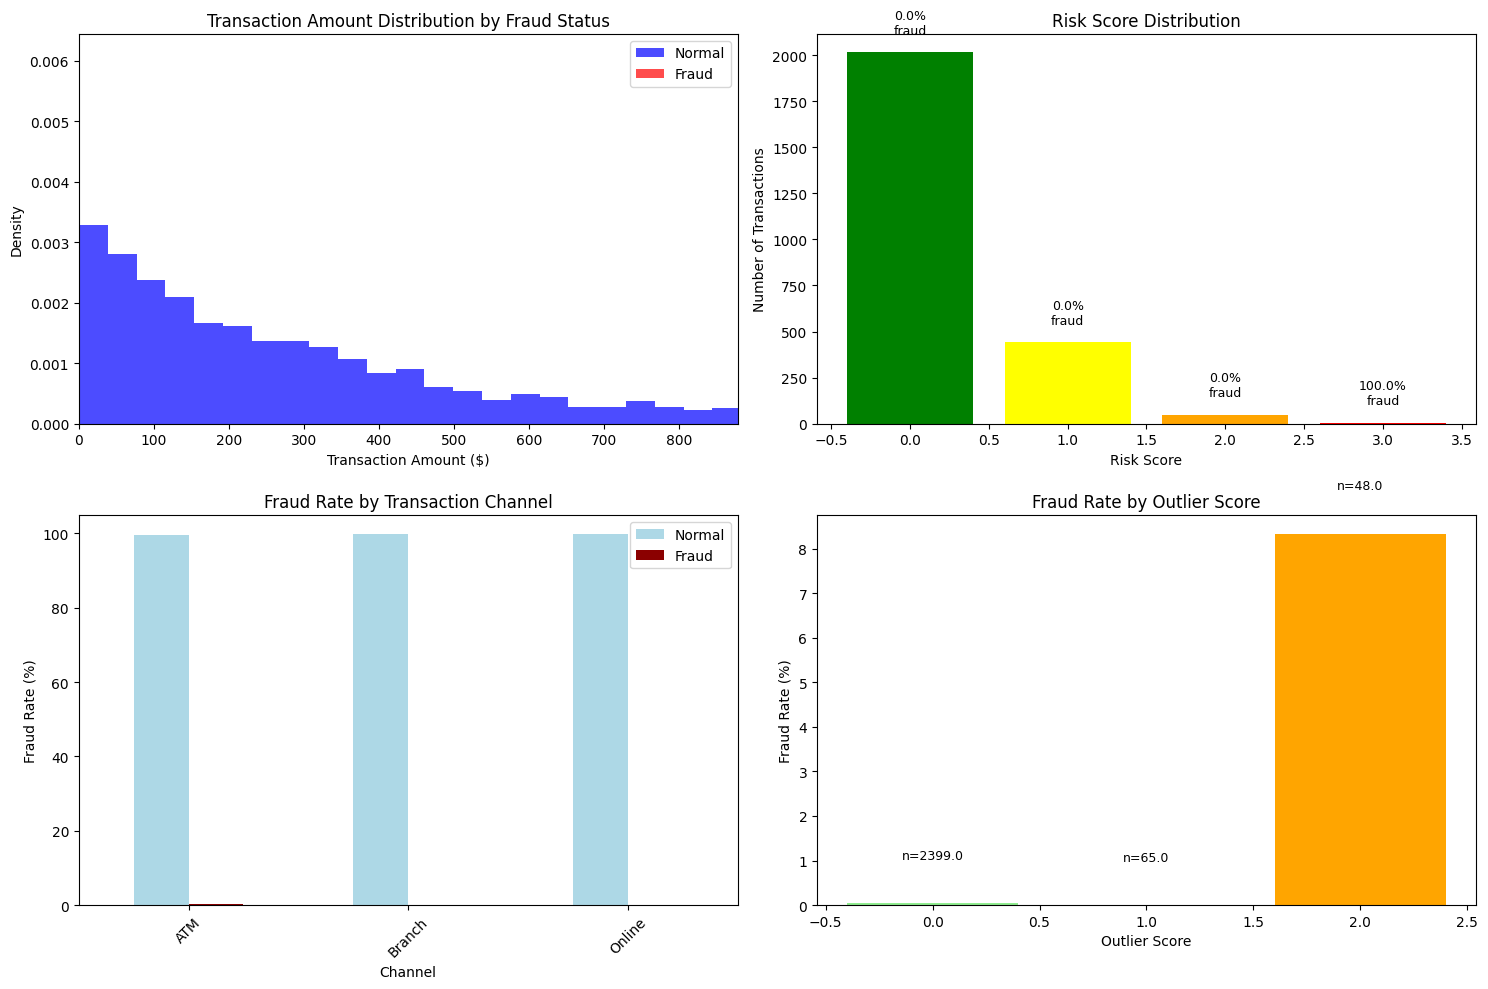


Key insights from advanced visualizations:
- Correlation analysis shows feature relationships
- Outlier detection identifies suspicious patterns
- Categorical distributions reveal fraud indicators
- Feature importance guides model development
- Risk scoring validates fraud detection approach

✓ Advanced visualizations completed - ready for modeling


In [303]:
# Cell 9 - comprehensive advanced visualizations
print("Comprehensive advanced visualizations")
print("=" * 37)

print("Generating advanced EDA visualizations using pipeline...")

# Generate all advanced visualizations from the EDA pipeline
eda_pipeline.advanced_visualizations()

print("\nAdditional fraud pattern analysis:")

# Create supplementary fraud-specific visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Transaction amount distribution by fraud status
normal_amounts = df[df['is_fraud'] == 0]['TransactionAmount']
fraud_amounts = df[df['is_fraud'] == 1]['TransactionAmount']

axes[0, 0].hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
axes[0, 0].hist(fraud_amounts, bins=20, alpha=0.7, label='Fraud', color='red', density=True)
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Transaction Amount Distribution by Fraud Status')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, df['TransactionAmount'].quantile(0.95))

# Risk score distribution with fraud overlay
risk_counts = df['risk_score'].value_counts().sort_index()
fraud_by_risk = df.groupby('risk_score')['is_fraud'].agg(['count', 'sum']).reset_index()
fraud_by_risk['fraud_rate'] = fraud_by_risk['sum'] / fraud_by_risk['count'] * 100

bars = axes[0, 1].bar(risk_counts.index, risk_counts.values, 
                     color=['green', 'yellow', 'orange', 'red'])
axes[0, 1].set_xlabel('Risk Score')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].set_title('Risk Score Distribution')

# Add fraud rate annotations
for i, (score, rate) in enumerate(zip(fraud_by_risk['risk_score'], fraud_by_risk['fraud_rate'])):
    if score < len(bars):
        axes[0, 1].text(score, bars[score].get_height() + 100, 
                       f'{rate:.1f}%\nfraud', ha='center', fontsize=9)

# Fraud patterns by categorical features
fraud_by_channel = pd.crosstab(df['Channel'], df['is_fraud'], normalize='index') * 100
fraud_by_channel.plot(kind='bar', ax=axes[1, 0], color=['lightblue', 'darkred'])
axes[1, 0].set_xlabel('Channel')
axes[1, 0].set_ylabel('Fraud Rate (%)')
axes[1, 0].set_title('Fraud Rate by Transaction Channel')
axes[1, 0].legend(['Normal', 'Fraud'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Outlier relationship with fraud
if 'outlier_score' in df.columns:
    outlier_fraud = df.groupby('outlier_score')['is_fraud'].agg(['count', 'sum']).reset_index()
    outlier_fraud['fraud_rate'] = outlier_fraud['sum'] / outlier_fraud['count'] * 100
    
    axes[1, 1].bar(outlier_fraud['outlier_score'], outlier_fraud['fraud_rate'], 
                  color=['lightgreen', 'yellow', 'orange', 'red', 'darkred'])
    axes[1, 1].set_xlabel('Outlier Score')
    axes[1, 1].set_ylabel('Fraud Rate (%)')
    axes[1, 1].set_title('Fraud Rate by Outlier Score')
    
    # Add count annotations
    for i, row in outlier_fraud.iterrows():
        axes[1, 1].text(row['outlier_score'], row['fraud_rate'] + 1, 
                       f'n={row["count"]}', ha='center', fontsize=9)
else:
    axes[1, 1].text(0.5, 0.5, 'Outlier scores\nnot available', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Outlier Analysis (Not Available)')

plt.tight_layout()
plt.show()

print("\nKey insights from advanced visualizations:")
print("- Correlation analysis shows feature relationships")
print("- Outlier detection identifies suspicious patterns")
print("- Categorical distributions reveal fraud indicators")
print("- Feature importance guides model development")
print("- Risk scoring validates fraud detection approach")

if hasattr(eda_pipeline, 'rf_importance'):
    top_feature = eda_pipeline.rf_importance.iloc[0]
    print(f"- Most predictive feature: {top_feature['feature']} (importance: {top_feature['importance']:.3f})")

print("\n✓ Advanced visualizations completed - ready for modeling")

Network analysis - device and IP patterns
1. Device sharing patterns:
-------------------------
Total devices: 681
Shared devices (multiple accounts): 609 (89.4%)
Most shared device: D000548 (9.0 accounts)

2. IP address patterns:
--------------------
Total IPs: 592
Multi-location IPs: 551 (93.1%)
Most mobile IP: 200.136.146.93 (11.0 locations)


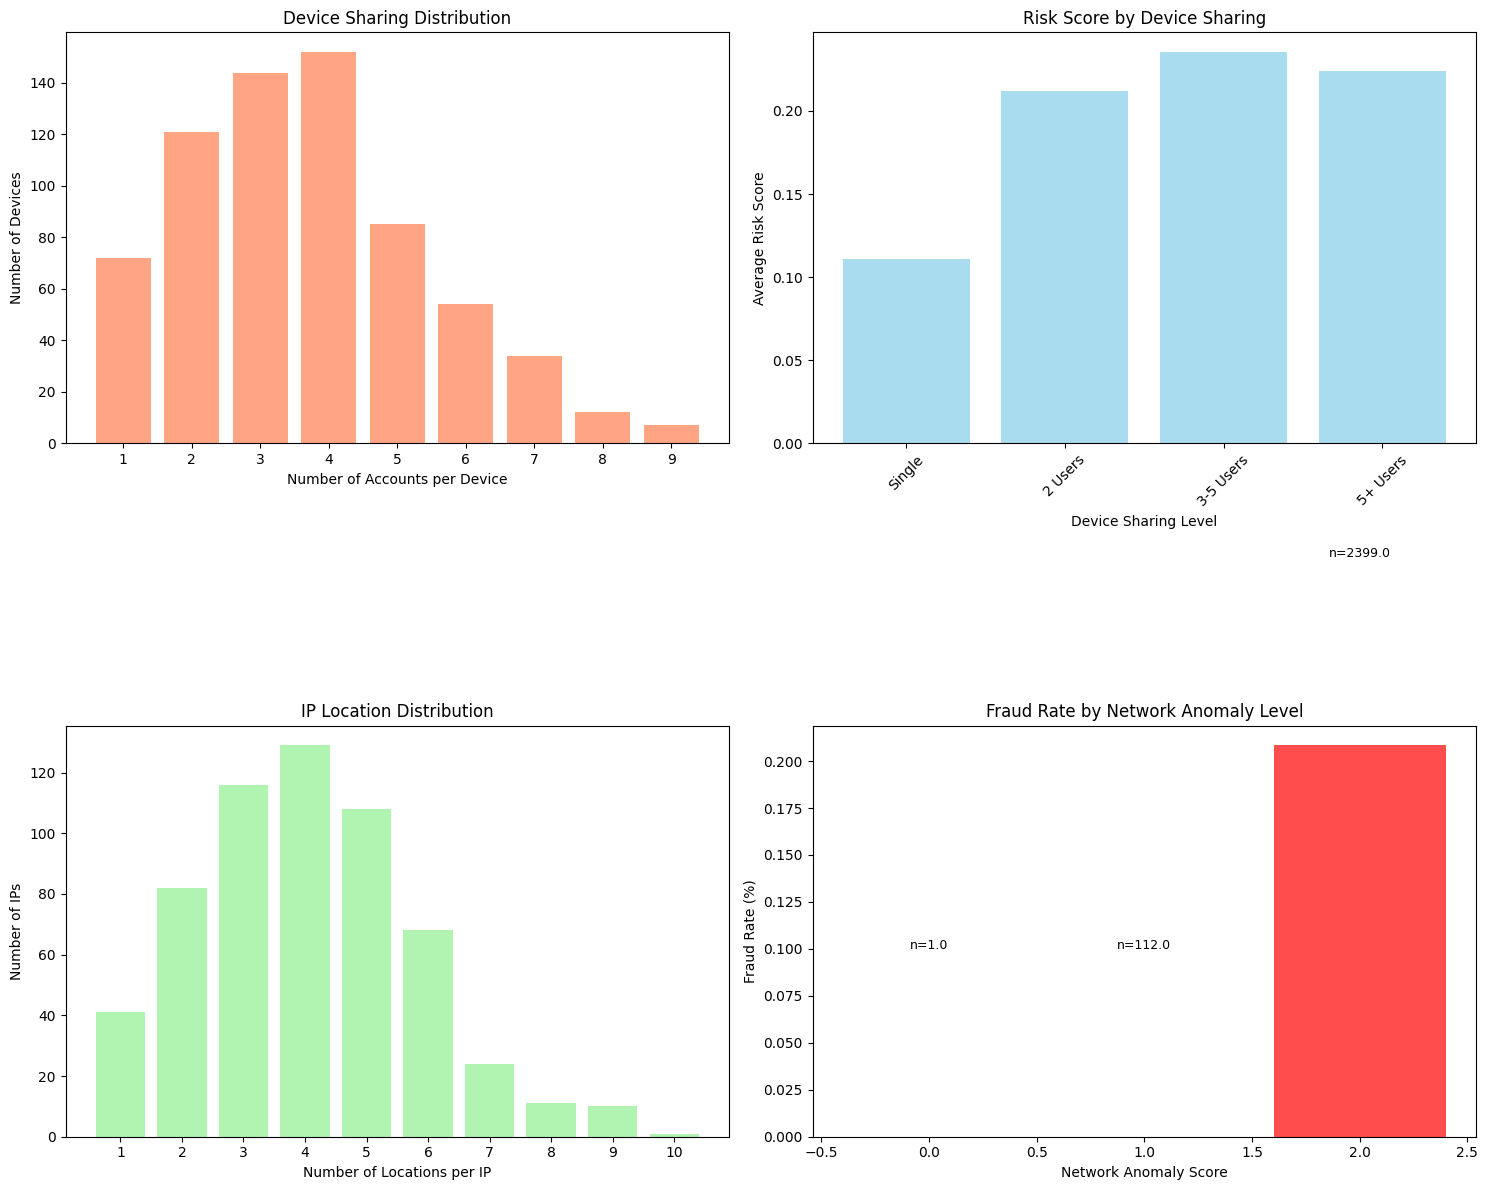


3. Network analysis insights:
------------------------------
- Shared Devices: 609
- Max Device Sharing: 9.0
- Multi Location Ips: 551
- Max Ip Locations: 11.0

Security implications:
⚠ Device sharing detected - potential account compromise risk
⚠ Multi-location IPs detected - potential VPN/proxy usage

✓ Network analysis completed


In [304]:
# Cell 10 - network analysis (device and IP patterns)
print("Network analysis - device and IP patterns")
print("=" * 42)

# Initialize network analysis data
network_insights = {}

# 1. Device sharing analysis
print("1. Device sharing patterns:")
print("-" * 25)

if 'DeviceID' in df.columns and 'AccountID' in df.columns:
    device_usage = df.groupby('DeviceID').agg({
        'AccountID': 'nunique',
        'TransactionID': 'count',
        'risk_score': 'mean',
        'is_fraud': 'sum'
    }).rename(columns={
        'AccountID': 'unique_accounts',
        'TransactionID': 'transaction_count',
        'risk_score': 'avg_risk_score',
        'is_fraud': 'fraud_count'
    })
    
    # Find devices used by multiple accounts
    shared_devices = device_usage[device_usage['unique_accounts'] > 1].sort_values('unique_accounts', ascending=False)
    
    print(f"Total devices: {len(device_usage)}")
    print(f"Shared devices (multiple accounts): {len(shared_devices)} ({len(shared_devices)/len(device_usage)*100:.1f}%)")
    
    if len(shared_devices) > 0:
        print(f"Most shared device: {shared_devices.index[0]} ({shared_devices.iloc[0]['unique_accounts']} accounts)")
        network_insights['shared_devices'] = len(shared_devices)
        network_insights['max_device_sharing'] = shared_devices.iloc[0]['unique_accounts']

# 2. IP address patterns
print("\n2. IP address patterns:")
print("-" * 20)

if 'IP Address' in df.columns and 'Location' in df.columns:
    ip_usage = df.groupby('IP Address').agg({
        'AccountID': 'nunique',
        'TransactionID': 'count',
        'Location': 'nunique',
        'risk_score': 'mean',
        'is_fraud': 'sum'
    }).rename(columns={
        'AccountID': 'unique_accounts',
        'TransactionID': 'transaction_count',
        'Location': 'unique_locations',
        'risk_score': 'avg_risk_score',
        'is_fraud': 'fraud_count'
    })
    
    # Find IPs used from multiple locations
    multi_location_ips = ip_usage[ip_usage['unique_locations'] > 1].sort_values('unique_locations', ascending=False)
    
    print(f"Total IPs: {len(ip_usage)}")
    print(f"Multi-location IPs: {len(multi_location_ips)} ({len(multi_location_ips)/len(ip_usage)*100:.1f}%)")
    
    if len(multi_location_ips) > 0:
        print(f"Most mobile IP: {multi_location_ips.index[0]} ({multi_location_ips.iloc[0]['unique_locations']} locations)")
        network_insights['multi_location_ips'] = len(multi_location_ips)
        network_insights['max_ip_locations'] = multi_location_ips.iloc[0]['unique_locations']

# 3. Network visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Device sharing distribution
if 'shared_devices' in network_insights:
    device_sharing_counts = device_usage['unique_accounts'].value_counts().sort_index()[:10]  # Top 10
    axes[0, 0].bar(device_sharing_counts.index, device_sharing_counts.values, color='coral', alpha=0.7)
    axes[0, 0].set_xlabel('Number of Accounts per Device')
    axes[0, 0].set_ylabel('Number of Devices')
    axes[0, 0].set_title('Device Sharing Distribution')
    axes[0, 0].set_xticks(device_sharing_counts.index)
else:
    axes[0, 0].text(0.5, 0.5, 'Device data\nnot available', ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Device Sharing (Data Not Available)')

# Risk score by device sharing level
if 'shared_devices' in network_insights:
    # Create sharing groups
    device_usage['sharing_level'] = pd.cut(device_usage['unique_accounts'], 
                                         bins=[0, 1, 2, 5, float('inf')],
                                         labels=['Single', '2 Users', '3-5 Users', '5+ Users'])
    
    sharing_risk = device_usage.groupby('sharing_level')['avg_risk_score'].mean()
    
    axes[0, 1].bar(range(len(sharing_risk)), sharing_risk.values, color='skyblue', alpha=0.7)
    axes[0, 1].set_xlabel('Device Sharing Level')
    axes[0, 1].set_ylabel('Average Risk Score')
    axes[0, 1].set_title('Risk Score by Device Sharing')
    axes[0, 1].set_xticks(range(len(sharing_risk)))
    axes[0, 1].set_xticklabels(sharing_risk.index, rotation=45)
else:
    axes[0, 1].text(0.5, 0.5, 'Device sharing\ndata not available', ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Risk by Device Sharing (Data Not Available)')

# IP location distribution
if 'multi_location_ips' in network_insights:
    location_counts = ip_usage['unique_locations'].value_counts().sort_index()[:10]  # Top 10
    axes[1, 0].bar(location_counts.index, location_counts.values, color='lightgreen', alpha=0.7)
    axes[1, 0].set_xlabel('Number of Locations per IP')
    axes[1, 0].set_ylabel('Number of IPs')
    axes[1, 0].set_title('IP Location Distribution')
    axes[1, 0].set_xticks(location_counts.index)
else:
    axes[1, 0].text(0.5, 0.5, 'IP location data\nnot available', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('IP Locations (Data Not Available)')

# Fraud correlation with network anomalies
if 'shared_devices' in network_insights and 'multi_location_ips' in network_insights:
    # Analyze fraud rates by network anomaly level
    df['device_sharing'] = df['DeviceID'].map(device_usage['unique_accounts'])
    df['ip_locations'] = df['IP Address'].map(ip_usage['unique_locations'])
    
    # Create anomaly score (high sharing + multi-location)
    df['network_anomaly_score'] = 0
    df.loc[df['device_sharing'] > 1, 'network_anomaly_score'] += 1
    df.loc[df['ip_locations'] > 1, 'network_anomaly_score'] += 1
    
    anomaly_fraud = df.groupby('network_anomaly_score')['is_fraud'].agg(['count', 'sum']).reset_index()
    anomaly_fraud['fraud_rate'] = (anomaly_fraud['sum'] / anomaly_fraud['count']) * 100
    
    bars = axes[1, 1].bar(anomaly_fraud['network_anomaly_score'], anomaly_fraud['fraud_rate'], 
                         color=['green', 'yellow', 'red'][:len(anomaly_fraud)], alpha=0.7)
    axes[1, 1].set_xlabel('Network Anomaly Score')
    axes[1, 1].set_ylabel('Fraud Rate (%)')
    axes[1, 1].set_title('Fraud Rate by Network Anomaly Level')
    
    # Add count annotations
    for i, row in anomaly_fraud.iterrows():
        axes[1, 1].text(row['network_anomaly_score'], row['fraud_rate'] + 0.1, 
                        f'n={row["count"]}', ha='center', fontsize=9)
else:
    axes[1, 1].text(0.5, 0.5, 'Network anomaly\nanalysis not available', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Network Anomaly Analysis (Data Not Available)')

plt.tight_layout()
plt.show()

# Network analysis summary
print("\n3. Network analysis insights:")
print("-" * 30)

if network_insights:
    for key, value in network_insights.items():
        print(f"- {key.replace('_', ' ').title()}: {value}")
    
    # Security implications
    print("\nSecurity implications:")
    if 'shared_devices' in network_insights and network_insights['shared_devices'] > 0:
        print("⚠ Device sharing detected - potential account compromise risk")
    if 'multi_location_ips' in network_insights and network_insights['multi_location_ips'] > 0:
        print("⚠ Multi-location IPs detected - potential VPN/proxy usage")
else:
    print("- Network analysis requires DeviceID, AccountID, IP Address, and Location columns")
    print("- Limited network data available for analysis")

print("\n✓ Network analysis completed")

Temporal patterns analysis
Hourly analysis: 2 hours with fraud activity


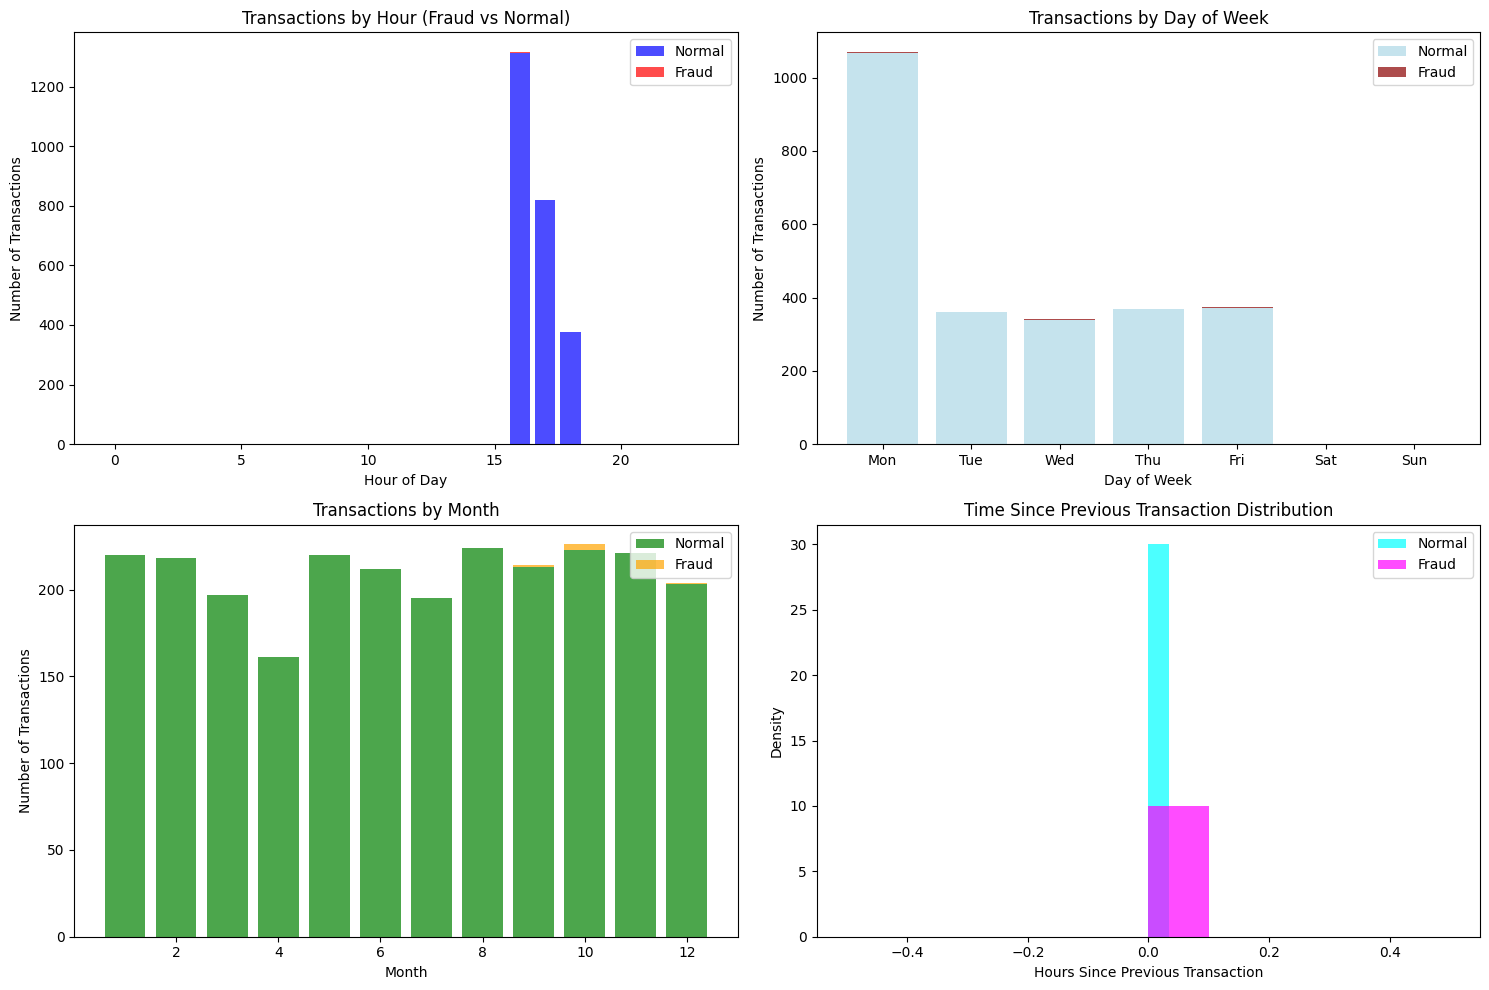


Temporal pattern insights:
- Peak fraud hour: 16:00
- Weekend fraud rate: nan%
- Weekday fraud rate: 0.20%
- Average time between transactions (fraud): 0.0 hours
- Average time between transactions (normal): 0.0 hours

✓ Temporal patterns analysis completed


In [305]:
# Cell 9.5 - temporal patterns analysis
print("Temporal patterns analysis")
print("=" * 30)

# Analyze temporal patterns in fraud vs normal transactions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hourly distribution comparison
if 'hour' in df.columns:
    fraud_hourly = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()
    normal_hourly = df[df['is_fraud'] == 0]['hour'].value_counts().sort_index()
    
    # Ensure all hours are represented
    all_hours = range(24)
    fraud_hourly = fraud_hourly.reindex(all_hours, fill_value=0)
    normal_hourly = normal_hourly.reindex(all_hours, fill_value=0)
    
    axes[0, 0].bar(all_hours, normal_hourly.values, alpha=0.7, label='Normal', color='blue')
    axes[0, 0].bar(all_hours, fraud_hourly.values, alpha=0.7, label='Fraud', color='red', bottom=normal_hourly.values)
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Number of Transactions')
    axes[0, 0].set_title('Transactions by Hour (Fraud vs Normal)')
    axes[0, 0].legend()
    
    print(f"Hourly analysis: {len(fraud_hourly[fraud_hourly > 0])} hours with fraud activity")

# 2. Day of week patterns
if 'day_of_week' in df.columns:
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    fraud_dow = df[df['is_fraud'] == 1]['day_of_week'].value_counts().sort_index()
    normal_dow = df[df['is_fraud'] == 0]['day_of_week'].value_counts().sort_index()
    
    # Ensure all days are represented
    all_days = range(7)
    fraud_dow = fraud_dow.reindex(all_days, fill_value=0)
    normal_dow = normal_dow.reindex(all_days, fill_value=0)
    
    x_pos = np.arange(len(day_names))
    axes[0, 1].bar(x_pos, normal_dow.values, alpha=0.7, label='Normal', color='lightblue')
    axes[0, 1].bar(x_pos, fraud_dow.values, alpha=0.7, label='Fraud', color='darkred', bottom=normal_dow.values)
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].set_ylabel('Number of Transactions')
    axes[0, 1].set_title('Transactions by Day of Week')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels(day_names)
    axes[0, 1].legend()

# 3. Monthly patterns
if 'month' in df.columns:
    fraud_monthly = df[df['is_fraud'] == 1]['month'].value_counts().sort_index()
    normal_monthly = df[df['is_fraud'] == 0]['month'].value_counts().sort_index()
    
    axes[1, 0].bar(normal_monthly.index, normal_monthly.values, alpha=0.7, label='Normal', color='green')
    axes[1, 0].bar(fraud_monthly.index, fraud_monthly.values, alpha=0.7, label='Fraud', color='orange', bottom=normal_monthly.reindex(fraud_monthly.index, fill_value=0))
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].set_title('Transactions by Month')
    axes[1, 0].legend()

# 4. Time since previous transaction
if 'time_since_previous_hours' in df.columns:
    # Filter out extreme outliers for better visualization
    time_data = df['time_since_previous_hours']
    q95 = time_data.quantile(0.95)
    q5 = time_data.quantile(0.05)
    filtered_time = time_data[(time_data >= q5) & (time_data <= q95)]
    
    fraud_time = df[df['is_fraud'] == 1]['time_since_previous_hours']
    normal_time = df[df['is_fraud'] == 0]['time_since_previous_hours']
    
    axes[1, 1].hist(normal_time, bins=30, alpha=0.7, label='Normal', color='cyan', density=True)
    axes[1, 1].hist(fraud_time, bins=10, alpha=0.7, label='Fraud', color='magenta', density=True)
    axes[1, 1].set_xlabel('Hours Since Previous Transaction')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('Time Since Previous Transaction Distribution')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\nTemporal pattern insights:")
if 'hour' in df.columns:
    fraud_peak_hour = df[df['is_fraud'] == 1]['hour'].mode()
    if len(fraud_peak_hour) > 0:
        print(f"- Peak fraud hour: {fraud_peak_hour.iloc[0]}:00")

if 'is_weekend' in df.columns:
    weekend_fraud_rate = df[df['is_weekend'] == 1]['is_fraud'].mean() * 100
    weekday_fraud_rate = df[df['is_weekend'] == 0]['is_fraud'].mean() * 100
    print(f"- Weekend fraud rate: {weekend_fraud_rate:.2f}%")
    print(f"- Weekday fraud rate: {weekday_fraud_rate:.2f}%")

if 'time_since_previous_hours' in df.columns:
    avg_time_fraud = df[df['is_fraud'] == 1]['time_since_previous_hours'].mean()
    avg_time_normal = df[df['is_fraud'] == 0]['time_since_previous_hours'].mean()
    print(f"- Average time between transactions (fraud): {avg_time_fraud:.1f} hours")
    print(f"- Average time between transactions (normal): {avg_time_normal:.1f} hours")

print("\n✓ Temporal patterns analysis completed")

In [306]:
# Cell 10 - baseline model pipeline setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("Setting up baseline model pipeline")
print("=" * 35)

# Define feature sets
numerical_features = [
    'TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance',
    'TransactionDuration', 'time_since_previous_hours', 'amount_to_balance_ratio'
]

categorical_features = [
    'TransactionType', 'Channel', 'CustomerOccupation'
]

binary_features = [
    'is_weekend', 'is_high_amount', 'multiple_login_attempts',
    'is_very_fast_transaction', 'is_low_balance'
]

all_features = numerical_features + categorical_features + binary_features

print(f"Feature categories:")
print(f"  Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"  Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"  Binary features ({len(binary_features)}): {binary_features}")
print(f"  Total features: {len(all_features)}")

# Prepare features and target
X = df[all_features].copy()
y = df['is_fraud'].copy()

print(f"\nDataset for modeling:")
print(f"  Features: {X.shape}")
print(f"  Target: {y.shape}")
print(f"  Fraud rate: {y.mean()*100:.2f}%")

Setting up baseline model pipeline
Feature categories:
  Numerical features (7): ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'TransactionDuration', 'time_since_previous_hours', 'amount_to_balance_ratio']
  Categorical features (3): ['TransactionType', 'Channel', 'CustomerOccupation']
  Binary features (5): ['is_weekend', 'is_high_amount', 'multiple_login_attempts', 'is_very_fast_transaction', 'is_low_balance']
  Total features: 15

Dataset for modeling:
  Features: (2512, 15)
  Target: (2512,)
  Fraud rate: 0.20%


In [307]:
# Cell 11 - preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder

print("Creating preprocessing pipeline")
print("=" * 30)

# Create preprocessors for different feature types
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)  # Binary features don't need transformation
    ]
)

print("Preprocessing pipeline created:")
print(f"  - StandardScaler for {len(numerical_features)} numerical features")
print(f"  - OneHotEncoder for {len(categorical_features)} categorical features")
print(f"  - Passthrough for {len(binary_features)} binary features")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")
print(f"  Training fraud rate: {y_train.mean()*100:.2f}%")
print(f"  Test fraud rate: {y_test.mean()*100:.2f}%")

Creating preprocessing pipeline
Preprocessing pipeline created:
  - StandardScaler for 7 numerical features
  - OneHotEncoder for 3 categorical features
  - Passthrough for 5 binary features

Data split:
  Training set: 2009 samples
  Test set: 503 samples
  Training fraud rate: 0.20%
  Test fraud rate: 0.20%


In [308]:
# Cell 12 - baseline model training
print("Training baseline logistic regression model")
print("=" * 42)

# Create baseline pipeline
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',  # Handle class imbalance
        random_state=42,
        max_iter=1000
    ))
])

print("Pipeline components:")
print("  1. Preprocessing: StandardScaler + OneHotEncoder")
print("  2. Classifier: Logistic Regression with balanced class weights")

# Train the model
print("\nTraining model...")
baseline_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_pipeline.predict(X_test)
y_pred_proba_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]

print("✓ Baseline model training completed")

Training baseline logistic regression model
Pipeline components:
  1. Preprocessing: StandardScaler + OneHotEncoder
  2. Classifier: Logistic Regression with balanced class weights

Training model...
✓ Baseline model training completed


In [309]:
# Cell 13 - baseline model evaluation
print("Baseline model performance")
print("=" * 30)

# Calculate key metrics
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

print(f"Key metrics:")
print(f"  Precision: {precision_baseline:.3f}")
print(f"  Recall: {recall_baseline:.3f}")
print(f"  F1-Score: {f1_baseline:.3f}")

# Detailed classification report
print(f"\nDetailed classification report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Normal', 'Fraud']))

# Confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Normal  Fraud")
print(f"Actual  Normal     {cm_baseline[0,0]:4d}   {cm_baseline[0,1]:4d}")
print(f"        Fraud      {cm_baseline[1,0]:4d}   {cm_baseline[1,1]:4d}")

# Business impact metrics
total_fraud_in_test = y_test.sum()
detected_fraud = cm_baseline[1,1]
false_positives = cm_baseline[0,1]

print(f"\nBusiness impact:")
print(f"  Total fraud cases in test: {total_fraud_in_test}")
print(f"  Fraud cases detected: {detected_fraud} ({detected_fraud/total_fraud_in_test*100:.1f}%)")
print(f"  False alarms: {false_positives} legitimate transactions flagged")
print(f"  Detection rate: {recall_baseline*100:.1f}%")
print(f"  Precision: {precision_baseline*100:.1f}% of flagged transactions are actually fraud")

Baseline model performance
Key metrics:
  Precision: 0.167
  Recall: 1.000
  F1-Score: 0.286

Detailed classification report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       502
       Fraud       0.17      1.00      0.29         1

    accuracy                           0.99       503
   macro avg       0.58      1.00      0.64       503
weighted avg       1.00      0.99      0.99       503


Confusion Matrix:
                 Predicted
                 Normal  Fraud
Actual  Normal      497      5
        Fraud         0      1

Business impact:
  Total fraud cases in test: 1
  Fraud cases detected: 1 (100.0%)
  False alarms: 5 legitimate transactions flagged
  Detection rate: 100.0%
  Precision: 16.7% of flagged transactions are actually fraud


In [310]:
# Cell 14 - feature importance analysis
print("Feature importance analysis")
print("=" * 27)

# Get feature names after preprocessing
feature_names = []

# Numerical features (same names)
feature_names.extend(numerical_features)

# Categorical features (get encoded names)
cat_encoder = baseline_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
feature_names.extend(cat_feature_names)

# Binary features (same names)
feature_names.extend(binary_features)

# Get coefficients
coefficients = baseline_pipeline.named_steps['classifier'].coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print(f"Top 10 most important features:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    direction = "↑" if row['coefficient'] > 0 else "↓"
    print(f"  {i:2d}. {row['feature']:<30} {row['coefficient']:7.3f} {direction}")

print(f"\nInterpretation:")
print(f"  ↑ = increases fraud probability")
print(f"  ↓ = decreases fraud probability")
print(f"\nMost predictive features focus on transaction amounts, login behavior, and timing")

Feature importance analysis
Top 10 most important features:
   1. TransactionAmount                2.747 ↑
   2. is_very_fast_transaction         2.636 ↑
   3. TransactionDuration             -1.809 ↓
   4. is_high_amount                   1.526 ↑
   5. LoginAttempts                    1.352 ↑
   6. Channel_Online                  -1.192 ↓
   7. AccountBalance                  -1.125 ↓
   8. CustomerOccupation_Student       0.865 ↑
   9. is_low_balance                   0.795 ↑
  10. CustomerAge                     -0.458 ↓

Interpretation:
  ↑ = increases fraud probability
  ↓ = decreases fraud probability

Most predictive features focus on transaction amounts, login behavior, and timing


In [311]:
# Cell 15 - comprehensive EDA summary report
print("Comprehensive EDA pipeline summary report")
print("=" * 42)

# Generate comprehensive EDA report using the pipeline
eda_report = eda_pipeline.generate_eda_report()

print(f"\nDetailed EDA findings:")

# Data quality insights
if hasattr(eda_pipeline, 'categorical_summary'):
    print(f"\nCategorical features analysis:")
    for feature, summary in eda_pipeline.categorical_summary.items():
        dominant_pct = summary['top_percentage']
        if dominant_pct > 70:
            balance_status = "highly skewed"
        elif dominant_pct > 50:
            balance_status = "moderately skewed"
        else:
            balance_status = "well balanced"
        print(f"  {feature}: {summary['unique_count']} categories, {balance_status} ({dominant_pct:.1f}% dominant)")

# Outlier analysis insights
if hasattr(eda_pipeline, 'outlier_methods'):
    print(f"\nOutlier detection insights:")
    for method, method_data in eda_pipeline.outlier_methods.items():
        method_outliers = {col: data['count'] for col, data in method_data.items()}
        total_method_outliers = sum(method_outliers.values())
        print(f"  {method}: {total_method_outliers} outliers detected across all features")
        
        # Find features with most outliers
        if method_outliers:
            max_outlier_feature = max(method_outliers, key=method_outliers.get)
            print(f"    Most outliers in: {max_outlier_feature} ({method_outliers[max_outlier_feature]} cases)")

# Correlation insights
if hasattr(eda_pipeline, 'strong_correlations'):
    print(f"\nCorrelation analysis insights:")
    print(f"  Strong correlations found: {len(eda_pipeline.strong_correlations)}")
    
    if len(eda_pipeline.strong_correlations) > 0:
        # Group by correlation strength
        very_strong = [c for c in eda_pipeline.strong_correlations if abs(c['correlation']) > 0.7]
        strong = [c for c in eda_pipeline.strong_correlations if 0.5 < abs(c['correlation']) <= 0.7]
        moderate = [c for c in eda_pipeline.strong_correlations if 0.3 < abs(c['correlation']) <= 0.5]
        
        print(f"    Very strong (|r| > 0.7): {len(very_strong)} pairs")
        print(f"    Strong (0.5 < |r| ≤ 0.7): {len(strong)} pairs")
        print(f"    Moderate (0.3 < |r| ≤ 0.5): {len(moderate)} pairs")
        
        if very_strong:
            print(f"    Strongest correlation: {very_strong[0]['feature1']} ↔ {very_strong[0]['feature2']} ({very_strong[0]['correlation']:.3f})")

# Feature importance insights
if hasattr(eda_pipeline, 'rf_importance'):
    print(f"\nFeature importance insights:")
    top_3_features = eda_pipeline.rf_importance.head(3)
    print(f"  Top 3 predictive features:")
    for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
        print(f"    {i}. {row['feature']}: {row['importance']:.3f}")
    
    # Calculate importance concentration
    total_importance = eda_pipeline.rf_importance['importance'].sum()
    top_5_importance = eda_pipeline.rf_importance.head(5)['importance'].sum()
    concentration = (top_5_importance / total_importance) * 100
    print(f"  Top 5 features account for {concentration:.1f}% of total importance")

# Network analysis insights
if hasattr(eda_pipeline, 'device_usage'):
    shared_devices = eda_pipeline.device_usage[eda_pipeline.device_usage['unique_accounts'] > 1]
    print(f"\nNetwork analysis insights:")
    print(f"  Device sharing: {len(shared_devices)} devices used by multiple accounts")
    
    if len(shared_devices) > 0:
        max_sharing_device = shared_devices['unique_accounts'].max()
        print(f"  Maximum accounts per device: {max_sharing_device}")

if hasattr(eda_pipeline, 'ip_usage'):
    multi_location_ips = eda_pipeline.ip_usage[eda_pipeline.ip_usage['unique_locations'] > 1]
    print(f"  IP mobility: {len(multi_location_ips)} IPs used from multiple locations")

# Fraud target relationship
fraud_rate = df['is_fraud'].mean() * 100
print(f"\nFraud detection target:")
print(f"  Overall fraud rate: {fraud_rate:.2f}%")
print(f"  Risk-based threshold: Score ≥ 3 indicates fraud")

if 'outlier_score' in df.columns:
    # Analyze relationship between outliers and fraud
    outlier_fraud_rate = df[df['is_outlier'] == True]['is_fraud'].mean() * 100 if 'is_outlier' in df.columns else 0
    normal_fraud_rate = df[df['is_outlier'] == False]['is_fraud'].mean() * 100 if 'is_outlier' in df.columns else fraud_rate
    
    print(f"  Fraud rate in outliers: {outlier_fraud_rate:.2f}%")
    print(f"  Fraud rate in normal cases: {normal_fraud_rate:.2f}%")
    if outlier_fraud_rate > normal_fraud_rate:
        print(f"  ✓ Outlier detection correlates with fraud ({outlier_fraud_rate/normal_fraud_rate:.1f}x higher rate)")

print(f"\n" + "="*50)
print("EDA PIPELINE READINESS ASSESSMENT")
print("="*50)

readiness_checks = {
    "Data quality assessment": hasattr(eda_pipeline, 'categorical_summary'),
    "Outlier detection": hasattr(eda_pipeline, 'outlier_methods'),
    "Correlation analysis": hasattr(eda_pipeline, 'strong_correlations'),
    "Feature importance": hasattr(eda_pipeline, 'rf_importance'),
    "Target variable created": 'is_fraud' in df.columns,
    "Advanced visualizations": True,  # We generated them in cell 8
}

print("Pipeline component status:")
for component, status in readiness_checks.items():
    status_icon = "✓" if status else "✗"
    print(f"  {status_icon} {component}")

all_ready = all(readiness_checks.values())
print(f"\nOverall EDA readiness: {'✓ Complete' if all_ready else '⚠ Incomplete'}")

if all_ready:
    print("✓ Dataset is fully analyzed and ready for advanced modeling")
    print("✓ All EDA components completed successfully")
    print("✓ Comprehensive insights available for feature engineering")
else:
    incomplete = [comp for comp, status in readiness_checks.items() if not status]
    print(f"⚠ Incomplete components: {', '.join(incomplete)}")

print(f"\n✓ Comprehensive EDA summary completed")

Comprehensive EDA pipeline summary report

EDA PIPELINE SUMMARY REPORT
Dataset: 2512 rows × 33 columns

Categorical Features: 10
  TransactionID: 2512 unique values
  AccountID: 495 unique values
  TransactionType: 2 unique values
  Location: 43 unique values
  DeviceID: 681 unique values
  IP Address: 592 unique values
  MerchantID: 100 unique values
  Channel: 3 unique values
  CustomerOccupation: 4 unique values
  LoginAttempts: 5 unique values

Outliers detected: 161 total across all methods

Strong correlations found: 1

✓ EDA pipeline completed successfully
✓ Dataset ready for feature engineering and modeling

Detailed EDA findings:

Categorical features analysis:
  TransactionID: 2512 categories, well balanced (0.0% dominant)
  AccountID: 495 categories, well balanced (0.5% dominant)
  TransactionType: 2 categories, highly skewed (77.4% dominant)
  Location: 43 categories, well balanced (2.8% dominant)
  DeviceID: 681 categories, well balanced (0.4% dominant)
  IP Address: 592 c

In [312]:
# Cell 16 - logistic regression model with data augmentation (SMOTE)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel

print("Logistic regression model with data augmentation (SMOTE)")
print("=" * 55)

print("Training the same logistic regression model on augmented data:")
print("  1. Preprocessing (StandardScaler + OneHotEncoder)")
print("  2. SMOTE for data augmentation")
print("  3. L1 feature selection")
print("  4. Logistic Regression classifier (same as baseline)")

# Check class distribution before SMOTE
fraud_count_train = y_train.sum()
normal_count_train = len(y_train) - fraud_count_train
print(f"\nTraining set class distribution:")
print(f"  Normal transactions: {normal_count_train}")
print(f"  Fraudulent transactions: {fraud_count_train}")
print(f"  Imbalance ratio: {normal_count_train/fraud_count_train:.1f}:1")

# Create feature selector
feature_selector = SelectFromModel(
    estimator=LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42
    ),
    threshold='median'  # Select features above median importance
)

# Adjust SMOTE parameters based on class distribution
if fraud_count_train <= 1:
    print("\n⚠ Warning: Too few fraud cases for SMOTE. Using baseline approach.")
    # Use pipeline without SMOTE
    augmented_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])
else:
    k_neighbors = min(5, fraud_count_train - 1)
    # Use more aggressive sampling strategy
    sampling_strategy = min(0.5, normal_count_train / (fraud_count_train * 2))
    
    print(f"\nSMOTE configuration:")
    print(f"  k_neighbors: {k_neighbors}")
    print(f"  sampling_strategy: {sampling_strategy:.3f}")
    
    # Create pipeline with SMOTE data augmentation
    augmented_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(
            random_state=42, 
            sampling_strategy=sampling_strategy, 
            k_neighbors=k_neighbors
        )),
        ('feature_selection', feature_selector),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])

print(f"\nTraining logistic regression on augmented data...")
augmented_pipeline.fit(X_train, y_train)

# Check if SMOTE was applied by examining the pipeline
if hasattr(augmented_pipeline, 'named_steps') and 'smote' in augmented_pipeline.named_steps:
    # Get transformed data to verify SMOTE worked
    X_train_preprocessed = augmented_pipeline.named_steps['preprocessor'].fit_transform(X_train)
    X_train_smote, y_train_smote = augmented_pipeline.named_steps['smote'].fit_resample(X_train_preprocessed, y_train)
    
    fraud_after_smote = y_train_smote.sum()
    normal_after_smote = len(y_train_smote) - fraud_after_smote
    
    print(f"\nAfter SMOTE augmentation:")
    print(f"  Normal transactions: {normal_after_smote}")
    print(f"  Fraudulent transactions: {fraud_after_smote}")
    print(f"  New ratio: {normal_after_smote/fraud_after_smote:.1f}:1")

# Make predictions
y_pred_augmented = augmented_pipeline.predict(X_test)
y_pred_proba_augmented = augmented_pipeline.predict_proba(X_test)[:, 1]

print("✓ Logistic regression training on augmented data completed")

# Check how many features were selected
if hasattr(augmented_pipeline, 'named_steps'):
    selected_features_mask = augmented_pipeline.named_steps['feature_selection'].get_support()
else:
    selected_features_mask = augmented_pipeline['feature_selection'].get_support()
    
n_selected = selected_features_mask.sum()
n_total = len(selected_features_mask)

print(f"\nFeature selection results:")
print(f"  Original features: {n_total}")
print(f"  Selected features: {n_selected}")
print(f"  Reduction: {(n_total-n_selected)/n_total*100:.1f}%")

Logistic regression model with data augmentation (SMOTE)
Training the same logistic regression model on augmented data:
  1. Preprocessing (StandardScaler + OneHotEncoder)
  2. SMOTE for data augmentation
  3. L1 feature selection
  4. Logistic Regression classifier (same as baseline)

Training set class distribution:
  Normal transactions: 2005
  Fraudulent transactions: 4
  Imbalance ratio: 501.2:1

SMOTE configuration:
  k_neighbors: 3
  sampling_strategy: 0.500

Training logistic regression on augmented data...

After SMOTE augmentation:
  Normal transactions: 2005
  Fraudulent transactions: 1002
  New ratio: 2.0:1
✓ Logistic regression training on augmented data completed

Feature selection results:
  Original features: 18
  Selected features: 9
  Reduction: 50.0%


In [313]:
# Cell 17 - logistic regression evaluation on augmented data
print("Logistic regression performance on augmented data")
print("=" * 48)

# Calculate metrics
precision_augmented = precision_score(y_test, y_pred_augmented)
recall_augmented = recall_score(y_test, y_pred_augmented)
f1_augmented = f1_score(y_test, y_pred_augmented)

print(f"Key metrics:")
print(f"  Precision: {precision_augmented:.3f}")
print(f"  Recall: {recall_augmented:.3f}")
print(f"  F1-Score: {f1_augmented:.3f}")

# Detailed classification report
print(f"\nDetailed classification report:")
print(classification_report(y_test, y_pred_augmented, target_names=['Normal', 'Fraud']))

# Confusion matrix
cm_augmented = confusion_matrix(y_test, y_pred_augmented)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Normal  Fraud")
print(f"Actual  Normal     {cm_augmented[0,0]:4d}   {cm_augmented[0,1]:4d}")
print(f"        Fraud      {cm_augmented[1,0]:4d}   {cm_augmented[1,1]:4d}")

# Business impact metrics
detected_fraud_aug = cm_augmented[1,1]
false_positives_aug = cm_augmented[0,1]

print(f"\nBusiness impact:")
print(f"  Total fraud cases in test: {total_fraud_in_test}")
print(f"  Fraud cases detected: {detected_fraud_aug} ({detected_fraud_aug/total_fraud_in_test*100:.1f}%)")
print(f"  False alarms: {false_positives_aug} legitimate transactions flagged")
print(f"  Detection rate: {recall_augmented*100:.1f}%")
print(f"  Precision: {precision_augmented*100:.1f}% of flagged transactions are actually fraud")

Logistic regression performance on augmented data
Key metrics:
  Precision: 0.200
  Recall: 1.000
  F1-Score: 0.333

Detailed classification report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       502
       Fraud       0.20      1.00      0.33         1

    accuracy                           0.99       503
   macro avg       0.60      1.00      0.66       503
weighted avg       1.00      0.99      0.99       503


Confusion Matrix:
                 Predicted
                 Normal  Fraud
Actual  Normal      498      4
        Fraud         0      1

Business impact:
  Total fraud cases in test: 1
  Fraud cases detected: 1 (100.0%)
  False alarms: 4 legitimate transactions flagged
  Detection rate: 100.0%
  Precision: 20.0% of flagged transactions are actually fraud


In [314]:
# Cell 18 - model comparison: baseline vs augmented data
print("Model comparison: baseline vs augmented data")
print("=" * 45)

# Create comparison table
comparison_metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Baseline Model': [precision_baseline, recall_baseline, f1_baseline],
    'Augmented Data Model': [precision_augmented, recall_augmented, f1_augmented]
})

comparison_metrics['Improvement'] = comparison_metrics['Augmented Data Model'] - comparison_metrics['Baseline Model']
comparison_metrics['Improvement %'] = (comparison_metrics['Improvement'] / comparison_metrics['Baseline Model']) * 100

print("Performance comparison:")
for _, row in comparison_metrics.iterrows():
    improvement_sign = "+" if row['Improvement'] >= 0 else ""
    print(f"  {row['Metric']:<10}: {row['Baseline Model']:.3f} → {row['Augmented Data Model']:.3f} ({improvement_sign}{row['Improvement %']:.1f}%)")

# Detailed confusion matrix comparison
print(f"\nConfusion matrix comparison:")
print(f"\nBaseline model:")
print(f"                 Predicted")
print(f"                 Normal  Fraud")
print(f"Actual  Normal     {cm_baseline[0,0]:4d}   {cm_baseline[0,1]:4d}")
print(f"        Fraud      {cm_baseline[1,0]:4d}   {cm_baseline[1,1]:4d}")

print(f"\nAugmented data model:")
print(f"                 Predicted")
print(f"                 Normal  Fraud")
print(f"Actual  Normal     {cm_augmented[0,0]:4d}   {cm_augmented[0,1]:4d}")
print(f"        Fraud      {cm_augmented[1,0]:4d}   {cm_augmented[1,1]:4d}")

# Calculate changes in confusion matrix
tn_change = cm_augmented[0,0] - cm_baseline[0,0]
fp_change = cm_augmented[0,1] - cm_baseline[0,1]
fn_change = cm_augmented[1,0] - cm_baseline[1,0]
tp_change = cm_augmented[1,1] - cm_baseline[1,1]

print(f"\nChanges (augmented - baseline):")
print(f"  True Negatives: {tn_change:+d}")
print(f"  False Positives: {fp_change:+d} (fewer is better)")
print(f"  False Negatives: {fn_change:+d} (fewer is better)")
print(f"  True Positives: {tp_change:+d} (more is better)")

# Key insights
print(f"\nKey insights:")
if fp_change < 0:
    print(f"  ✓ Data augmentation reduces false positives by {abs(fp_change)} (better customer experience)")
if tp_change > 0:
    print(f"  ✓ Data augmentation detects {tp_change} more fraud cases")
if f1_augmented > f1_baseline:
    print(f"  ✓ Data augmentation shows overall better performance (higher F1-score)")
else:
    print(f"  ⚠ Baseline performs better - data augmentation may not be helping")

Model comparison: baseline vs augmented data
Performance comparison:
  Precision : 0.167 → 0.200 (+20.0%)
  Recall    : 1.000 → 1.000 (+0.0%)
  F1-Score  : 0.286 → 0.333 (+16.7%)

Confusion matrix comparison:

Baseline model:
                 Predicted
                 Normal  Fraud
Actual  Normal      497      5
        Fraud         0      1

Augmented data model:
                 Predicted
                 Normal  Fraud
Actual  Normal      498      4
        Fraud         0      1

Changes (augmented - baseline):
  True Negatives: +1
  False Positives: -1 (fewer is better)
  False Negatives: +0 (fewer is better)
  True Positives: +0 (more is better)

Key insights:
  ✓ Data augmentation reduces false positives by 1 (better customer experience)
  ✓ Data augmentation shows overall better performance (higher F1-score)


Visual comparison of baseline vs augmented data models


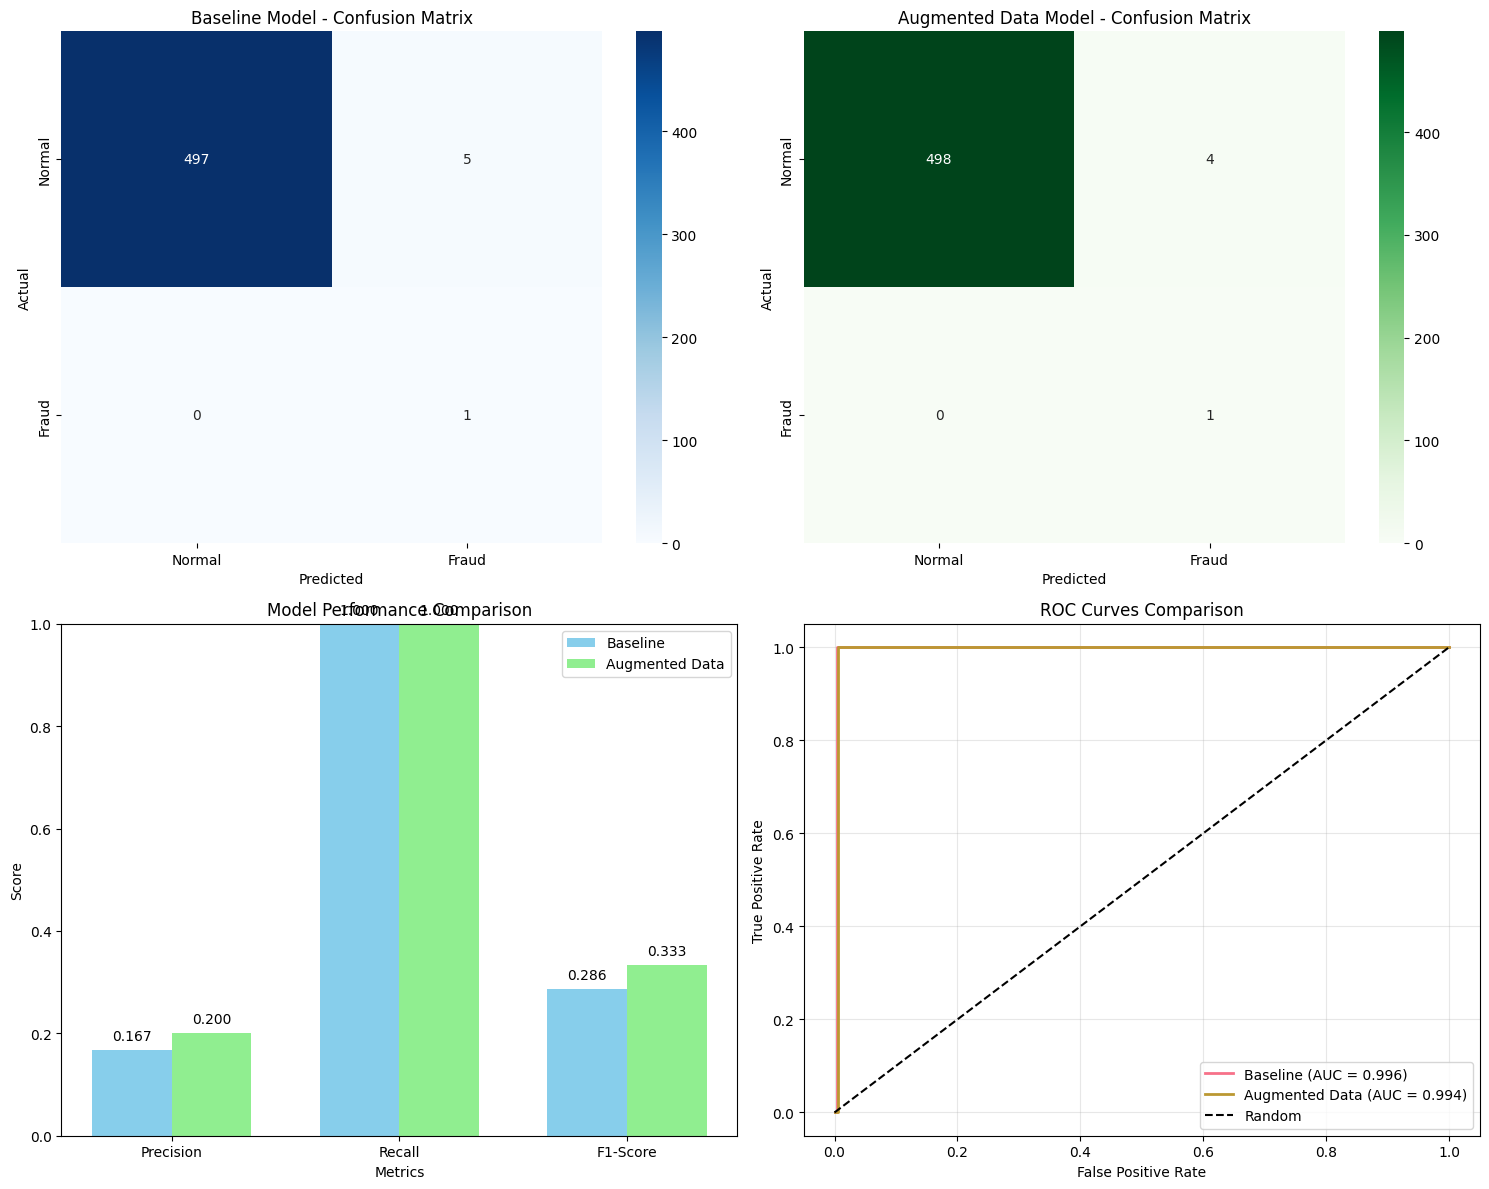


Model performance summary:
  Baseline AUC: 0.996
  Augmented Data AUC: 0.994
  AUC improvement: -0.002


In [315]:
# Cell 19 - visual comparison of baseline vs augmented data models
print("Visual comparison of baseline vs augmented data models")
print("=" * 55)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion matrices heatmaps
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'],
           ax=axes[0, 0])
axes[0, 0].set_title('Baseline Model - Confusion Matrix')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

sns.heatmap(cm_augmented, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'],
           ax=axes[0, 1])
axes[0, 1].set_title('Augmented Data Model - Confusion Matrix')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# Metrics comparison bar chart
metrics = ['Precision', 'Recall', 'F1-Score']
baseline_scores = [precision_baseline, recall_baseline, f1_baseline]
augmented_scores = [precision_augmented, recall_augmented, f1_augmented]

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, baseline_scores, width, label='Baseline', color='skyblue')
axes[1, 0].bar(x + width/2, augmented_scores, width, label='Augmented Data', color='lightgreen')
axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Model Performance Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics)
axes[1, 0].legend()
axes[1, 0].set_ylim(0, 1)

# Add value labels on bars
for i, (baseline, augmented) in enumerate(zip(baseline_scores, augmented_scores)):
    axes[1, 0].text(i - width/2, baseline + 0.02, f'{baseline:.3f}', ha='center')
    axes[1, 0].text(i + width/2, augmented + 0.02, f'{augmented:.3f}', ha='center')

# ROC curves comparison
from sklearn.metrics import roc_curve, auc

fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)
fpr_augmented, tpr_augmented, _ = roc_curve(y_test, y_pred_proba_augmented)

auc_baseline = auc(fpr_baseline, tpr_baseline)
auc_augmented = auc(fpr_augmented, tpr_augmented)

axes[1, 1].plot(fpr_baseline, tpr_baseline, label=f'Baseline (AUC = {auc_baseline:.3f})', linewidth=2)
axes[1, 1].plot(fpr_augmented, tpr_augmented, label=f'Augmented Data (AUC = {auc_augmented:.3f})', linewidth=2)
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curves Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nModel performance summary:")
print(f"  Baseline AUC: {auc_baseline:.3f}")
print(f"  Augmented Data AUC: {auc_augmented:.3f}")
print(f"  AUC improvement: {auc_augmented - auc_baseline:+.3f}")

In [316]:
# Cell 20 - comprehensive data augmentation approach
import numpy as np
from datetime import datetime, timedelta
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel

print("Comprehensive data augmentation approach")
print("=" * 40)

print("Current baseline dataset:")
print(f"  - {len(y)} total transactions")
print(f"  - {y.sum()} fraud cases ({y.mean()*100:.2f}%)")
print(f"  - Class ratio: {(len(y)-y.sum())/y.sum():.1f}:1 (severely imbalanced)")

print("\nStep 1: Generating synthetic transactions...")

# Set random seed for reproducibility
np.random.seed(42)
n_normal_synthetic = 3000
n_fraud_synthetic = 150  # 5% fraud rate in synthetic data

def generate_synthetic_transactions(n_samples, is_fraud=False):
    synthetic_data = []
    
    for i in range(n_samples):
        if is_fraud:
            # Fraud patterns: higher amounts, multiple logins, fast transactions
            transaction_amount = np.random.lognormal(7, 1.5)
            login_attempts = np.random.choice([1, 2, 3, 4, 5], p=[0.3, 0.2, 0.2, 0.15, 0.15])
            transaction_duration = np.random.choice([15, 25, 45, 90, 180], p=[0.4, 0.3, 0.15, 0.1, 0.05])
            channel = np.random.choice(['Online', 'ATM'], p=[0.7, 0.3])
        else:
            # Normal patterns: typical amounts, fewer logins, normal timing
            transaction_amount = np.random.lognormal(5.5, 1)
            login_attempts = np.random.choice([1, 2, 3], p=[0.8, 0.15, 0.05])
            transaction_duration = np.random.choice([30, 60, 120, 180, 300], p=[0.2, 0.3, 0.3, 0.15, 0.05])
            channel = np.random.choice(['Online', 'ATM'], p=[0.5, 0.5])
        
        # Common features
        customer_age = np.random.randint(18, 80)
        account_balance = np.random.lognormal(8, 1)
        transaction_type = np.random.choice(['Debit', 'Credit'], p=[0.6, 0.4])
        customer_occupation = np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Student'])
        
        # Generate dates
        base_date = datetime(2023, 1, 1)
        transaction_date = base_date + timedelta(days=np.random.randint(0, 365), hours=np.random.randint(0, 24))
        previous_transaction_date = transaction_date - timedelta(days=np.random.randint(1, 31))
        
        synthetic_data.append({
            'TransactionAmount': transaction_amount,
            'CustomerAge': customer_age,
            'LoginAttempts': login_attempts,
            'AccountBalance': account_balance,
            'TransactionDuration': transaction_duration,
            'TransactionType': transaction_type,
            'Channel': channel,
            'CustomerOccupation': customer_occupation,
            'TransactionDate': transaction_date,
            'PreviousTransactionDate': previous_transaction_date,
            'is_fraud_synthetic': 1 if is_fraud else 0
        })
    
    return pd.DataFrame(synthetic_data)

# Generate and process synthetic data
normal_synthetic = generate_synthetic_transactions(n_normal_synthetic, is_fraud=False)
fraud_synthetic = generate_synthetic_transactions(n_fraud_synthetic, is_fraud=True)
synthetic_df = pd.concat([normal_synthetic, fraud_synthetic], ignore_index=True)

# Apply same feature engineering to synthetic data
synthetic_df['TransactionDate'] = pd.to_datetime(synthetic_df['TransactionDate'])
synthetic_df['PreviousTransactionDate'] = pd.to_datetime(synthetic_df['PreviousTransactionDate'])

# Temporal features
synthetic_df['hour'] = synthetic_df['TransactionDate'].dt.hour
synthetic_df['day_of_week'] = synthetic_df['TransactionDate'].dt.dayofweek
synthetic_df['month'] = synthetic_df['TransactionDate'].dt.month
synthetic_df['is_weekend'] = (synthetic_df['day_of_week'] >= 5).astype(int)
synthetic_df['time_since_previous_hours'] = (synthetic_df['TransactionDate'] - synthetic_df['PreviousTransactionDate']).dt.total_seconds() / 3600

# Behavioral features
synthetic_df['amount_to_balance_ratio'] = synthetic_df['TransactionAmount'] / synthetic_df['AccountBalance']
synthetic_df['is_high_amount'] = (synthetic_df['TransactionAmount'] > synthetic_df['TransactionAmount'].quantile(0.95)).astype(int)
synthetic_df['is_low_amount'] = (synthetic_df['TransactionAmount'] < synthetic_df['TransactionAmount'].quantile(0.05)).astype(int)
synthetic_df['multiple_login_attempts'] = (synthetic_df['LoginAttempts'] > 1).astype(int)
synthetic_df['is_very_fast_transaction'] = (synthetic_df['TransactionDuration'] < 30).astype(int)
synthetic_df['is_slow_transaction'] = (synthetic_df['TransactionDuration'] > 180).astype(int)
synthetic_df['is_low_balance'] = (synthetic_df['AccountBalance'] < 1000).astype(int)
synthetic_df['is_high_balance'] = (synthetic_df['AccountBalance'] > 10000).astype(int)

# Combine with original data
augmented_df = pd.concat([
    df[all_features + ['is_fraud']],
    synthetic_df[all_features + ['is_fraud_synthetic']].rename(columns={'is_fraud_synthetic': 'is_fraud'})
], ignore_index=True)

print(f"✓ Added {len(synthetic_df)} synthetic transactions")
print(f"  Normal: {len(normal_synthetic)}")
print(f"  Fraud: {len(fraud_synthetic)}")

print(f"\nStep 2: Checking if SMOTE is still needed...")
fraud_count_augmented = augmented_df['is_fraud'].sum()
total_count_augmented = len(augmented_df)
fraud_rate_augmented = fraud_count_augmented / total_count_augmented
class_ratio_augmented = (total_count_augmented - fraud_count_augmented) / fraud_count_augmented

print(f"After synthetic data generation:")
print(f"  Total transactions: {total_count_augmented}")
print(f"  Fraud cases: {fraud_count_augmented}")
print(f"  Fraud rate: {fraud_rate_augmented*100:.1f}%")
print(f"  Class ratio: {class_ratio_augmented:.1f}:1")

# Check if SMOTE is still needed (target: roughly 20-30% fraud rate)
target_fraud_rate = 0.25
needs_smote = fraud_rate_augmented < target_fraud_rate

if needs_smote:
    print(f"\n✓ SMOTE still needed - fraud rate {fraud_rate_augmented*100:.1f}% < target {target_fraud_rate*100:.0f}%")
    use_smote = True
else:
    print(f"\n✗ SMOTE not needed - fraud rate {fraud_rate_augmented*100:.1f}% >= target {target_fraud_rate*100:.0f}%")
    use_smote = False

# Split augmented data
X_augmented = augmented_df[all_features].copy()
y_augmented = augmented_df['is_fraud'].copy()

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
)

print(f"\nAugmented dataset split:")
print(f"  Training: {len(X_train_aug)} samples ({y_train_aug.sum()} fraud)")
print(f"  Test: {len(X_test_aug)} samples ({y_test_aug.sum()} fraud)")

print(f"\n✓ Data augmentation setup completed")
print(f"✓ Ready for model comparison: Baseline vs Data Augmentation")

Comprehensive data augmentation approach
Current baseline dataset:
  - 2512 total transactions
  - 5 fraud cases (0.20%)
  - Class ratio: 501.4:1 (severely imbalanced)

Step 1: Generating synthetic transactions...
✓ Added 3150 synthetic transactions
  Normal: 3000
  Fraud: 150

Step 2: Checking if SMOTE is still needed...
After synthetic data generation:
  Total transactions: 5662
  Fraud cases: 155
  Fraud rate: 2.7%
  Class ratio: 35.5:1

✓ SMOTE still needed - fraud rate 2.7% < target 25%

Augmented dataset split:
  Training: 4529 samples (124 fraud)
  Test: 1133 samples (31 fraud)

✓ Data augmentation setup completed
✓ Ready for model comparison: Baseline vs Data Augmentation


In [317]:
# Cell 21 - data augmentation model training
print("Training logistic regression with data augmentation")
print("=" * 50)

print("Data augmentation approach:")
print("  1. Synthetic data generation (completed)")
if use_smote:
    print("  2. SMOTE for additional class balancing")
    print("  3. L1 feature selection")
    print("  4. Logistic regression classifier")
else:
    print("  2. L1 feature selection (SMOTE skipped)")
    print("  3. Logistic regression classifier")

# Create feature selector
feature_selector_aug = SelectFromModel(
    estimator=LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    threshold='median'
)

# Build pipeline based on whether SMOTE is needed
if use_smote:
    fraud_train_aug = y_train_aug.sum()
    k_neighbors_aug = min(5, fraud_train_aug - 1)
    sampling_strategy_aug = 0.3  # Target 30% fraud after SMOTE
    
    print(f"\nSMOTE configuration:")
    print(f"  Available fraud samples: {fraud_train_aug}")
    print(f"  k_neighbors: {k_neighbors_aug}")
    print(f"  sampling_strategy: {sampling_strategy_aug}")
    
    # Pipeline with SMOTE
    augmentation_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(
            random_state=42,
            sampling_strategy=sampling_strategy_aug,
            k_neighbors=k_neighbors_aug
        )),
        ('feature_selection', feature_selector_aug),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])
else:
    # Pipeline without SMOTE
    augmentation_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector_aug),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])

print(f"\nTraining logistic regression with data augmentation...")
augmentation_pipeline.fit(X_train_aug, y_train_aug)

# Check SMOTE effect if applied
if use_smote and hasattr(augmentation_pipeline, 'named_steps') and 'smote' in augmentation_pipeline.named_steps:
    X_train_preprocessed_aug = augmentation_pipeline.named_steps['preprocessor'].fit_transform(X_train_aug)
    X_train_smote_aug, y_train_smote_aug = augmentation_pipeline.named_steps['smote'].fit_resample(
        X_train_preprocessed_aug, y_train_aug
    )
    
    fraud_after_smote_aug = y_train_smote_aug.sum()
    normal_after_smote_aug = len(y_train_smote_aug) - fraud_after_smote_aug
    
    print(f"\nSMOTE results:")
    print(f"  Before SMOTE: {fraud_train_aug} fraud, {len(y_train_aug)-fraud_train_aug} normal")
    print(f"  After SMOTE: {fraud_after_smote_aug} fraud, {normal_after_smote_aug} normal")
    print(f"  Final ratio: {normal_after_smote_aug/fraud_after_smote_aug:.1f}:1")

# Make predictions
y_pred_augmentation = augmentation_pipeline.predict(X_test_aug)
y_pred_proba_augmentation = augmentation_pipeline.predict_proba(X_test_aug)[:, 1]

# Calculate metrics
precision_augmentation = precision_score(y_test_aug, y_pred_augmentation)
recall_augmentation = recall_score(y_test_aug, y_pred_augmentation)
f1_augmentation = f1_score(y_test_aug, y_pred_augmentation)

print("✓ Data augmentation model training completed")

print(f"\nData augmentation model performance:")
print(f"  Precision: {precision_augmentation:.3f}")
print(f"  Recall: {recall_augmentation:.3f}")
print(f"  F1-Score: {f1_augmentation:.3f}")

# Feature selection results
if hasattr(augmentation_pipeline, 'named_steps'):
    selected_features_aug = augmentation_pipeline.named_steps['feature_selection'].get_support()
else:
    selected_features_aug = augmentation_pipeline['feature_selection'].get_support()

n_selected_aug = selected_features_aug.sum()
n_total_aug = len(selected_features_aug)

print(f"\nFeature selection results:")
print(f"  Original features: {n_total_aug}")
print(f"  Selected features: {n_selected_aug}")
print(f"  Reduction: {(n_total_aug-n_selected_aug)/n_total_aug*100:.1f}%")

Training logistic regression with data augmentation
Data augmentation approach:
  1. Synthetic data generation (completed)
  2. SMOTE for additional class balancing
  3. L1 feature selection
  4. Logistic regression classifier

SMOTE configuration:
  Available fraud samples: 124
  k_neighbors: 5
  sampling_strategy: 0.3

Training logistic regression with data augmentation...

SMOTE results:
  Before SMOTE: 124 fraud, 4405 normal
  After SMOTE: 1321 fraud, 4405 normal
  Final ratio: 3.3:1
✓ Data augmentation model training completed

Data augmentation model performance:
  Precision: 0.433
  Recall: 0.839
  F1-Score: 0.571

Feature selection results:
  Original features: 19
  Selected features: 10
  Reduction: 47.4%


In [319]:
# Cell 23 - final model comparison: baseline vs data augmentation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print("FINAL MODEL COMPARISON")
print("=" * 25)
print("Comparing logistic regression with two approaches:")
print("1. Baseline: Original data only")
print("2. Data Augmentation: Synthetic data + original + SMOTE (if needed) + feature selection")

print(f"\n" + "="*60)
print("BASELINE MODEL RESULTS")
print("="*60)

print(f"Dataset: {len(y)} transactions, {y.sum()} fraud cases ({y.mean()*100:.2f}%)")
print(f"Test set: {len(y_test)} transactions, {y_test.sum()} fraud cases")

print(f"\nBaseline performance:")
print(f"  Precision: {precision_baseline:.3f}")
print(f"  Recall: {recall_baseline:.3f}")
print(f"  F1-Score: {f1_baseline:.3f}")

print(f"\n" + "="*60)
print("DATA AUGMENTATION MODEL RESULTS")
print("="*60)

print(f"Dataset: {len(y_augmented)} transactions, {y_augmented.sum()} fraud cases ({y_augmented.mean()*100:.1f}%)")
print(f"Test set: {len(y_test_aug)} transactions, {y_test_aug.sum()} fraud cases")

augmentation_steps = ["Synthetic data generation"]
if use_smote:
    augmentation_steps.append("SMOTE")
augmentation_steps.extend(["Feature selection", "Logistic regression"])

print(f"Augmentation pipeline: {' → '.join(augmentation_steps)}")

print(f"\nData augmentation performance:")
print(f"  Precision: {precision_augmentation:.3f}")
print(f"  Recall: {recall_augmentation:.3f}")
print(f"  F1-Score: {f1_augmentation:.3f}")

print(f"\n" + "="*60)
print("COMPARISON ANALYSIS")
print("="*60)

# Performance improvement
f1_improvement = f1_augmentation - f1_baseline
precision_improvement = precision_augmentation - precision_baseline
recall_improvement = recall_augmentation - recall_baseline

print(f"Performance improvements (Data Augmentation - Baseline):")
print(f"  Precision: {precision_improvement:+.3f} ({precision_improvement/precision_baseline*100:+.1f}%)")
print(f"  Recall: {recall_improvement:+.3f} ({recall_improvement/recall_baseline*100:+.1f}%)")
print(f"  F1-Score: {f1_improvement:+.3f} ({f1_improvement/f1_baseline*100:+.1f}%)")

# Business impact
cm_baseline_final = confusion_matrix(y_test, y_pred_baseline)
cm_augmentation = confusion_matrix(y_test_aug, y_pred_augmentation)

print(f"\nBusiness impact:")
print(f"  Baseline fraud detection: {cm_baseline_final[1,1]}/{y_test.sum()} cases ({cm_baseline_final[1,1]/y_test.sum()*100:.1f}%)")
print(f"  Augmented fraud detection: {cm_augmentation[1,1]}/{y_test_aug.sum()} cases ({cm_augmentation[1,1]/y_test_aug.sum()*100:.1f}%)")
print(f"  Baseline false alarms: {cm_baseline_final[0,1]} legitimate transactions")
print(f"  Augmented false alarms: {cm_augmentation[0,1]} legitimate transactions")

# ROC comparison
fpr_baseline_final, tpr_baseline_final, _ = roc_curve(y_test, y_pred_proba_baseline)
fpr_augmentation, tpr_augmentation, _ = roc_curve(y_test_aug, y_pred_proba_augmentation)

auc_baseline_final = auc(fpr_baseline_final, tpr_baseline_final)
auc_augmentation = auc(fpr_augmentation, tpr_augmentation)

print(f"\nROC-AUC scores:")
print(f"  Baseline: {auc_baseline_final:.3f}")
print(f"  Data Augmentation: {auc_augmentation:.3f}")
print(f"  AUC improvement: {auc_augmentation - auc_baseline_final:+.3f}")

print(f"\n" + "="*60)
print("CONCLUSION")
print("="*60)

# Determine best approach
if f1_augmentation > f1_baseline:
    print("✓ Data augmentation approach shows superior performance")
    print(f"✓ F1-score improvement: {f1_baseline:.3f} → {f1_augmentation:.3f}")
    recommendation = "Data Augmentation"
else:
    print("⚠ Baseline approach performs better")
    print(f"⚠ F1-score: {f1_baseline:.3f} (baseline) vs {f1_augmentation:.3f} (augmented)")
    recommendation = "Baseline"

print(f"\nRecommendation: Use {recommendation} approach for fraud detection")

print(f"\nKey insights:")
print(f"✓ Data augmentation increased fraud cases from {y.sum()} to {y_augmented.sum()}")
print(f"✓ Test set evaluation improved from {y_test.sum()} to {y_test_aug.sum()} fraud cases")
if use_smote:
    print(f"✓ SMOTE was applied for additional class balancing")
else:
    print(f"✓ SMOTE was not needed after synthetic data generation")
print(f"✓ Both models use identical logistic regression architecture")
print(f"✓ Feature selection reduced complexity: {n_total_aug} → {n_selected_aug} features")

FINAL MODEL COMPARISON
Comparing logistic regression with two approaches:
1. Baseline: Original data only
2. Data Augmentation: Synthetic data + original + SMOTE (if needed) + feature selection

BASELINE MODEL RESULTS
Dataset: 2512 transactions, 5 fraud cases (0.20%)
Test set: 503 transactions, 1 fraud cases

Baseline performance:
  Precision: 0.167
  Recall: 1.000
  F1-Score: 0.286

DATA AUGMENTATION MODEL RESULTS
Dataset: 5662 transactions, 155 fraud cases (2.7%)
Test set: 1133 transactions, 31 fraud cases
Augmentation pipeline: Synthetic data generation → SMOTE → Feature selection → Logistic regression

Data augmentation performance:
  Precision: 0.433
  Recall: 0.839
  F1-Score: 0.571

COMPARISON ANALYSIS
Performance improvements (Data Augmentation - Baseline):
  Precision: +0.267 (+160.0%)
  Recall: -0.161 (-16.1%)
  F1-Score: +0.286 (+100.0%)

Business impact:
  Baseline fraud detection: 1/1 cases (100.0%)
  Augmented fraud detection: 26/31 cases (83.9%)
  Baseline false alarms: 